## Init libary

In [79]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot



# read data
df = pd.read_csv('filtered_data.csv')

# Data description

In [3]:
list_variable = ['Hospital Mortality','Max Lactate', 'Min Lactate',
                 'Mean Lactate', 'Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
                 'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
                 'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
                 'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
                 'Mean Hemoglobin', 'Ventilation Duration (h)']


# Get data type, mode, count of mode (percentage of mode of total), missing value, percentage of missing value

def data_info(df):
    data_info = pd.DataFrame(columns=['Variable', 'Description'])
    for i in list_variable:
        description = f'Data type: Numerical - continous, Mode: {df[i].mode()[0]}, Frequency of Mode: {df[i].value_counts().max()} ({df[i].value_counts().max()/df[i].count():.2%}), Missing Values: {df[i].isnull().sum()} ({df[i].isnull().sum()/df[i].count():.2%})'
        data_info.loc[len(data_info)] = [i, description]
    #export to csv
    data_info.to_csv('data_info.csv', index=False)
    return data_info


data_info(df)

Variable  \
0         Hospital Mortality   
1                Max Lactate   
2                Min Lactate   
3               Mean Lactate   
4                     Max pH   
5                     Min pH   
6                    Mean pH   
7                Max Glucose   
8                Min Glucose   
9               Mean Glucose   
10                   Max WBC   
11                   Min WBC   
12                  Mean WBC   
13                   Max BUN   
14                   Min BUN   
15                  Mean BUN   
16            Max Creatinine   
17            Min Creatinine   
18           Mean Creatinine   
19            Max Hemoglobin   
20            Min Hemoglobin   
21           Mean Hemoglobin   
22  Ventilation Duration (h)   

                                          Description  
0   Data type: Numerical - continous, Mode: 0, Fre...  
1   Data type: Numerical - continous, Mode: 1.8, F...  
2   Data type: Numerical - continous, Mode: 1.0, F...  
3   Data type: Numerical - continous, Mode: 1.4, F...  
4   Data type: Numerical - continous, Mode: 7.44, ...  
5   Data type: Numerical - continous, Mode: 7.32, ...  
6   Data type: Numerical - continous, Mode: 7.38, ...  
7   Data type: Numerical - continous, Mode: 165.0,...  
8   Data type: Numerical - continous, Mode: 99.0, ...  
9   Data type: Numerical - continous, Mode: 130.0,...  
10  Data type: Numerical - continous, Mode: 12.3, ...  
11  Data type: Numerical - continous, Mode: 10.2, ...  
12  Data type: Numerical - continous, Mode: 9.7, F...  
13  Data type: Numerical - continous, Mode: 15.0, ...  
14  Data type: Numerical - continous, Mode: 13.0, ...  
15  Data type: Numerical - continous, Mode: 14.0, ...  
16  Data type: Numerical - continous, Mode: 0.8, F...  
17  Data type: Numerical - continous, Mode: 0.7, F...  
18  Data type: Numerical - continous, Mode: 0.8, F...  
19  Data type: Numerical - continous, Mode: 12.7, ...  
20  Data type: Numerical - continous, Mode: 9.4, F...  
21  Data type: Numerical - continous, Mode: 9.7, F...  
22  Data type: Numerical - continous, Mode: 4.0, F...

In [4]:
# Get statistics of the data
def data_statistics(df):
    data_statistics = pd.DataFrame(columns=['Variable', 'Description'])
    for i in list_variable:
        description = f'Mean: {df[i].mean():.2f}, Std: {df[i].std():.2f}, Min: {df[i].min():.2f}, Median: {df[i].median():.2f}, Max: {df[i].max():.2f}, Shape: '
        data_statistics.loc[len(data_statistics)] = [i, description]
    #export to csv
    data_statistics.to_csv('data_statistics.csv', index=False)
    return data_statistics

data_statistics(df)

Variable  \
0         Hospital Mortality   
1                Max Lactate   
2                Min Lactate   
3               Mean Lactate   
4                     Max pH   
5                     Min pH   
6                    Mean pH   
7                Max Glucose   
8                Min Glucose   
9               Mean Glucose   
10                   Max WBC   
11                   Min WBC   
12                  Mean WBC   
13                   Max BUN   
14                   Min BUN   
15                  Mean BUN   
16            Max Creatinine   
17            Min Creatinine   
18           Mean Creatinine   
19            Max Hemoglobin   
20            Min Hemoglobin   
21           Mean Hemoglobin   
22  Ventilation Duration (h)   

                                          Description  
0   Mean: 0.16, Std: 0.37, Min: 0.00, Median: 0.00...  
1   Mean: 3.41, Std: 2.87, Min: 0.40, Median: 2.50...  
2   Mean: 1.83, Std: 1.46, Min: 0.20, Median: 1.40...  
3   Mean: 2.57, Std: 1.95, Min: 0.38, Median: 2.00...  
4   Mean: 7.44, Std: 0.07, Min: 6.72, Median: 7.44...  
5   Mean: 7.30, Std: 0.10, Min: 6.37, Median: 7.31...  
6   Mean: 7.37, Std: 0.07, Min: 6.72, Median: 7.38...  
7   Mean: 189.33, Std: 86.83, Min: 38.00, Median: ...  
8   Mean: 109.18, Std: 37.48, Min: 1.15, Median: 1...  
9   Mean: 145.98, Std: 46.27, Min: 21.33, Median: ...  
10  Mean: 15.06, Std: 10.26, Min: 0.10, Median: 13...  
11  Mean: 10.95, Std: 7.46, Min: 0.10, Median: 10....  
12  Mean: 12.95, Std: 8.55, Min: 0.10, Median: 11....  
13  Mean: 24.75, Std: 19.45, Min: 2.00, Median: 18...  
14  Mean: 20.76, Std: 16.87, Min: 1.00, Median: 16...  
15  Mean: 22.71, Std: 17.99, Min: 1.60, Median: 17...  
16  Mean: 1.36, Std: 1.33, Min: 0.10, Median: 1.00...  
17  Mean: 1.12, Std: 1.09, Min: 0.10, Median: 0.80...  
18  Mean: 1.24, Std: 1.20, Min: 0.10, Median: 0.90...  
19  Mean: 12.40, Std: 1.93, Min: 4.60, Median: 12....  
20  Mean: 9.76, Std: 2.22, Min: 1.20, Median: 9.60...  
21  Mean: 10.95, Std: 1.85, Min: 4.00, Median: 10....  
22  Mean: 81.16, Std: 154.86, Min: 0.02, Median: 1...

## Correlation Matrix to check the relevant between variables


In [5]:
# Convert M, F from gender to 0, 1
df['Gender'].replace({'F': 0, 'M': 1}, inplace=True)

In [6]:
df.head()

Hospital Mortality  Age  Gender  Uncomplicated Hypertension  \
0                   0   77       1                           0   
1                   1   42       1                           1   
2                   1   72       1                           1   
3                   0   40       0                           1   
4                   0   47       0                           0   

   Complicated Hypertension  Uncomplicated Diabetes  Complicated Diabetes  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       1                     0   
4                         0                       0                     0   

   Malignancy  Hematologic Disease  Metastasis  ...  Min BUN  Mean BUN  \
0           0                    0           0  ...     41.0     44.75   
1           0                    0           0  ...     16.0     16.50   
2           0                    0           0  ...     28.0     33.50   
3           0                    0           0  ...     13.0     15.33   
4           0                    0           0  ...     10.0     10.50   

   Max Creatinine  Min Creatinine  Mean Creatinine  Max Hemoglobin  \
0             3.2             2.4             2.65            12.8   
1             1.4             1.2             1.30            15.4   
2             1.7             1.3             1.50            13.3   
3             0.8             0.5             0.63            12.3   
4             0.8             0.7             0.75            13.7   

   Min Hemoglobin  Mean Hemoglobin  Ventilation Duration (h)  RRT  
0             7.8            10.04                 83.733333    0  
1            12.9            14.10                118.333333    0  
2             7.8            10.23                 82.666667    0  
3             7.9            10.88                  6.816667    0  
4             9.1            10.77                  0.833333    0  

[5 rows x 70 columns]

In [51]:
# Correlation matrix
# heatmap = sns.heatmap(df.corr(), annot=True)

#export to csv
correlation = df.corr()
correlation.to_csv('correlation.csv')

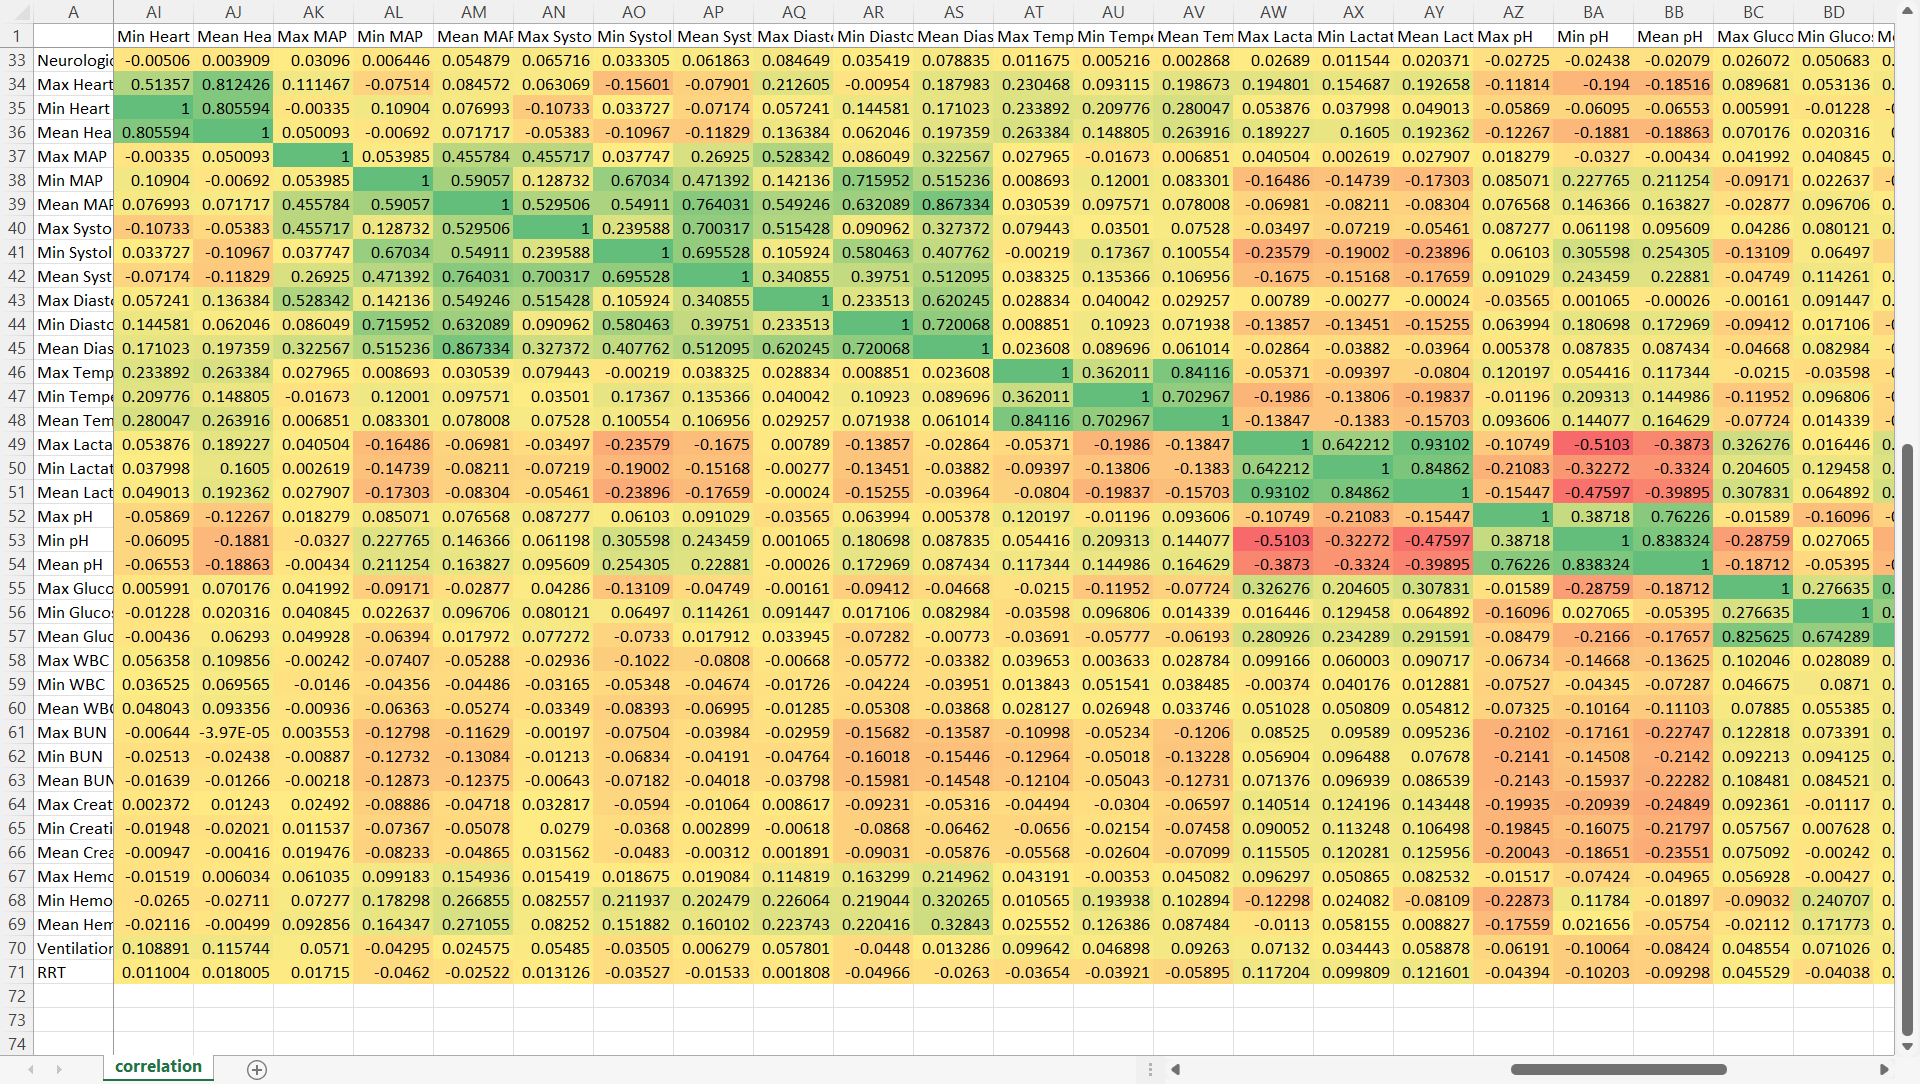

There are not much correlation between variables, the high correlation between mean-max-min of each laboratory should be ignored, some with high correlation is:  

- Max, Min, Mean of Creatine - Severe Renal Failure: 0.67
- Hematologic Dysfunction - Hematologic Disease: 0.82
- Metastasis - Malignancy: 0.62
- OASIS - SAPS II: 0.67
- SOFA - SAPS II: 0.68
- Max, Min, Mean of Creatine - Max, Min, Mean BUN: 0.67

## Missing value - Laboratory result

There are missing values in all Laboratory variables, however, we see that missing value happen to a whole test, for example number of missing value of Max Lactate = Min Lactate = Mean Lactate.  
We can assume that different patient will have different tests, and some test is not required for patient.   
Note that, there are **50 patients** without any laboratory result, we will remove those patients if the laboratory result important to predict the mortality of the patient.  
There are some way to impute the missing value:  
- Set 0 to missing values (as A deep learning solution to recommend laboratory reduction strategies in ICU https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10777357/#:~:text=The%20laboratory%20results%20for%20each,the%20missing%20values%20as%20zeros.)
- Using single regression imputation (SRI), multiple imputation (MI), and inverse probability weighted (IPW) method to fill the missing value (Dealing with missing data in laboratory test results used as a baseline covariate: results of multi-hospital cohort studies utilizing a database system contributing to MID-NET® in Japan https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-023-02345-7)
- XGBoost Regression to predict missing values (Predicting Missing Values in Medical Data Via XGBoost Regression https://europepmc.org/article/pmc/7709926)
- Using mean, mode to impute missing values. We assume this approach is not suitable because the laboratory result depend on each individual such as age, gender, medical history,... On this paper, they also mentioned that using mean to impute data could poorly affect to predict (The impact of imputation quality on machine learning classifiers for datasets with missing values https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10558448/)

In [7]:
# Count and percentage of missing values
data_statistics = pd.DataFrame(columns=['Variable', 'Missing Values', 'Percentage of Missing Values'])

for i in list_variable:
    missing_values = df[i].isnull().sum()
    percentage_missing_values = f'{df[i].isnull().sum()/df[i].count():.2%}'
    data_statistics.loc[len(data_statistics)] = [i, missing_values, percentage_missing_values]

print(data_statistics)

                    Variable  Missing Values Percentage of Missing Values
0         Hospital Mortality               0                        0.00%
1                Max Lactate            5101                       37.01%
2                Min Lactate            5101                       37.01%
3               Mean Lactate            5101                       37.01%
4                     Max pH            1173                        6.62%
5                     Min pH            1173                        6.62%
6                    Mean pH            1173                        6.62%
7                Max Glucose              75                        0.40%
8                Min Glucose              75                        0.40%
9               Mean Glucose              75                        0.40%
10                   Max WBC             229                        1.23%
11                   Min WBC             229                        1.23%
12                  Mean WBC          

In [8]:
# Check if there is any whole row with no laboratory results
lab_results = ['Max Lactate', 'Min Lactate',
                 'Mean Lactate', 'Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
                 'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
                 'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
                 'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
                 'Mean Hemoglobin']
df['No Lab Results'] = df[lab_results].isnull().all(axis=1)
print(df['No Lab Results'].value_counts())

No Lab Results
False    18833
True        50
Name: count, dtype: int64


In [80]:
# Drop lactate columns because they have more than 30% missing values
df = df.drop(columns=['Max Lactate', 'Min Lactate', 'Mean Lactate'])
# Drop rows with missing values
df = df.dropna()

## Outliers - Laboratory result


In [10]:
# Boxplot and histogram for data
def draw_box_hist(data):
    fig, ax =plt.subplots(1,2)
    fig.set_figwidth(15)
    sns.boxplot(x=data, ax=ax[0])
    sns.histplot(data, kde=True, ax=ax[1])
    plt.show()


# Extract outliers
def extract_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    return data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]

Variable: Max pH
Count: 447
Min: 6.88
Max: 7.89


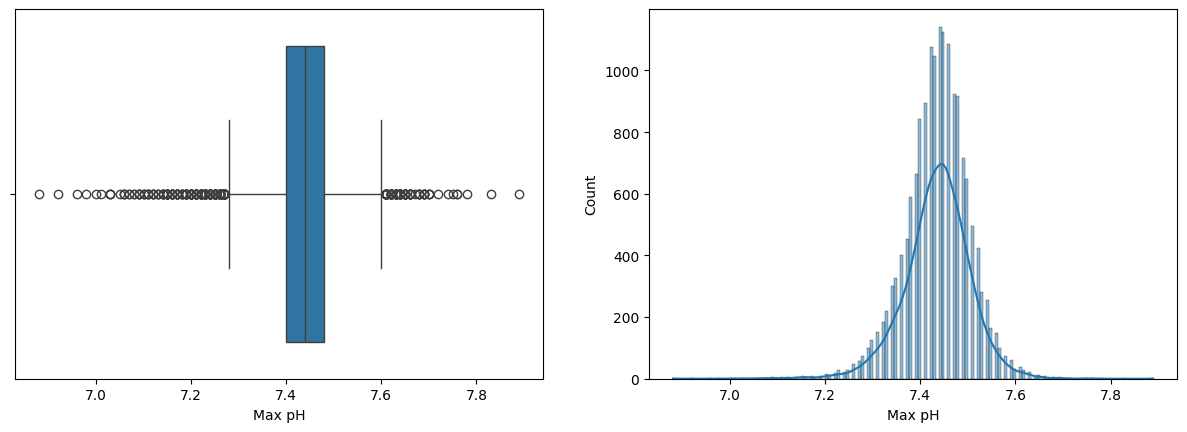

Variable: Min pH
Count: 882
Min: 6.37
Max: 7.63


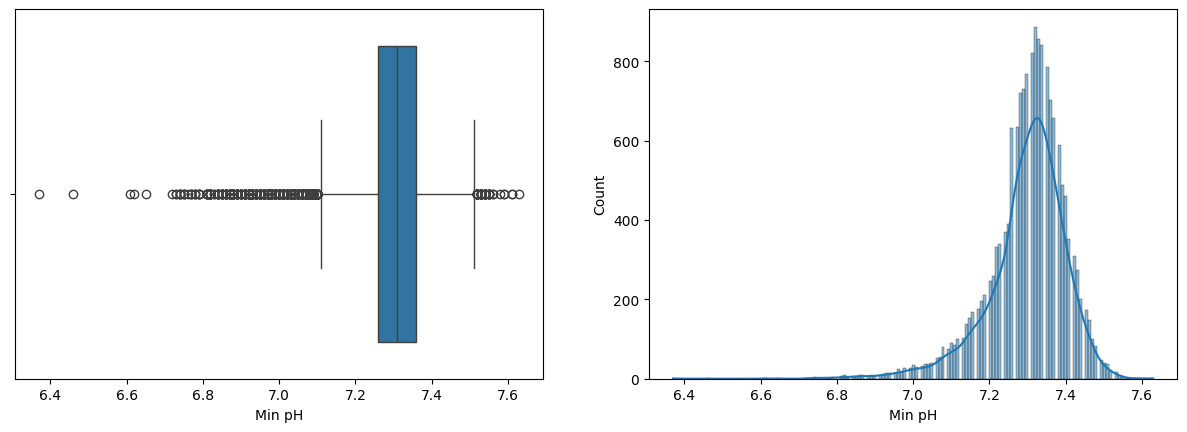

Variable: Mean pH
Count: 736
Min: 6.84
Max: 7.63


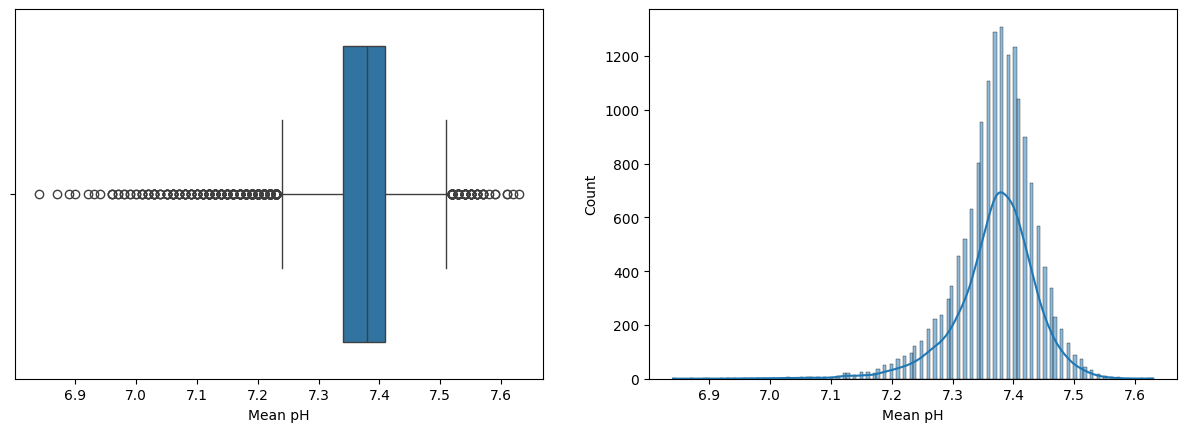

Variable: Max Glucose
Count: 949
Min: 320.0
Max: 2275.0


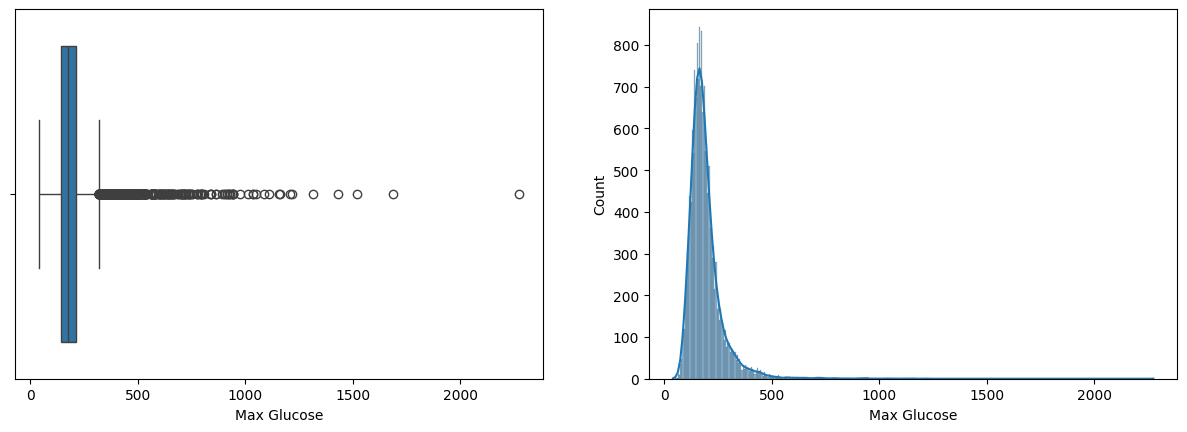

Variable: Min Glucose
Count: 777
Min: 1.15
Max: 571.0


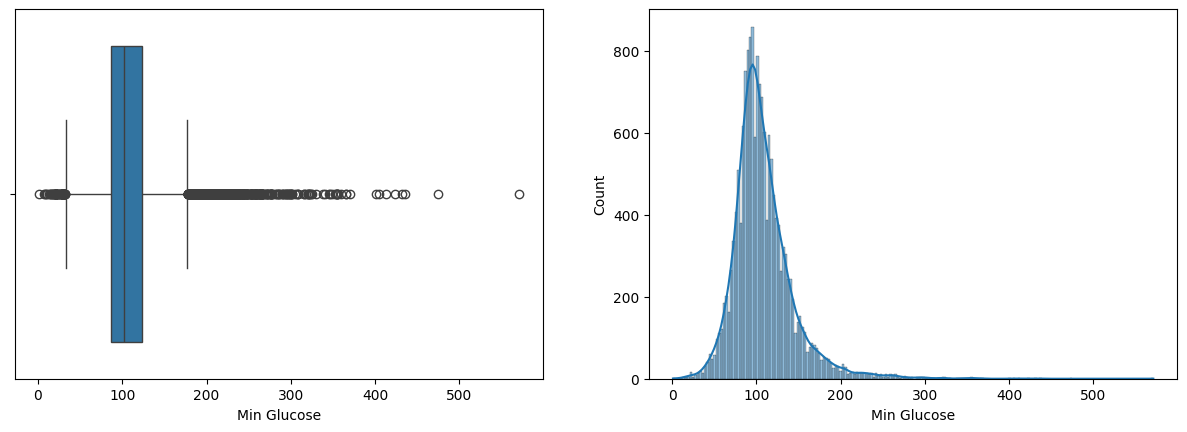

Variable: Mean Glucose
Count: 1031
Min: 39.5
Max: 745.09


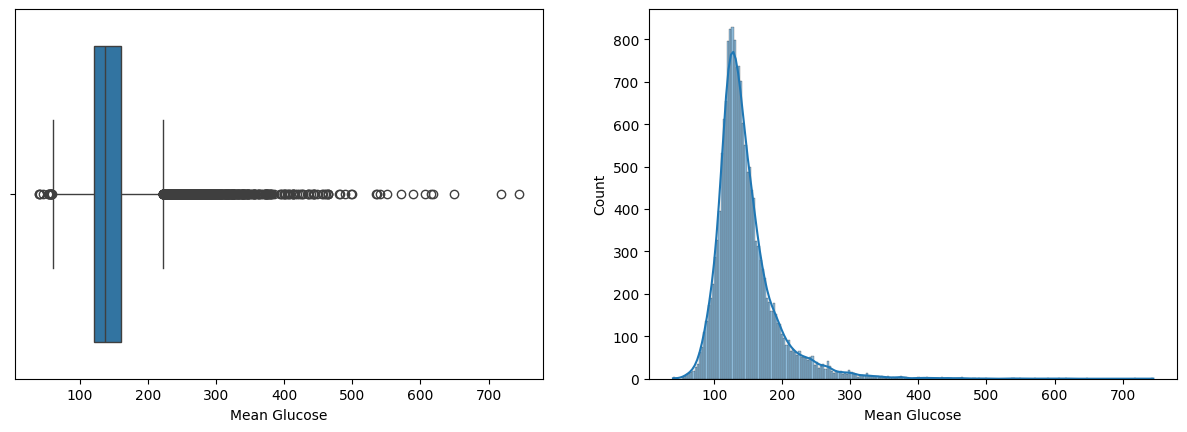

Variable: Max WBC
Count: 614
Min: 29.7
Max: 600.2


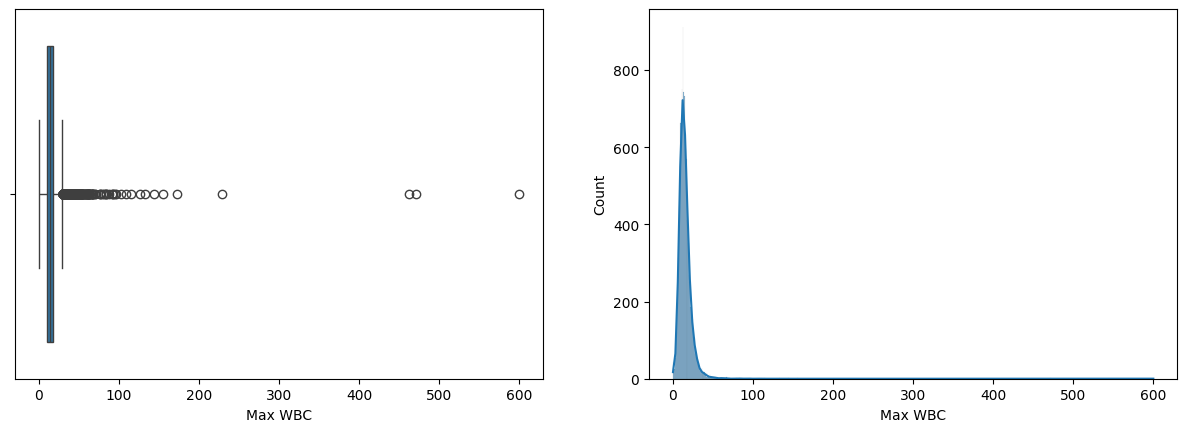

Variable: Min WBC
Count: 525
Min: 22.5
Max: 442.7


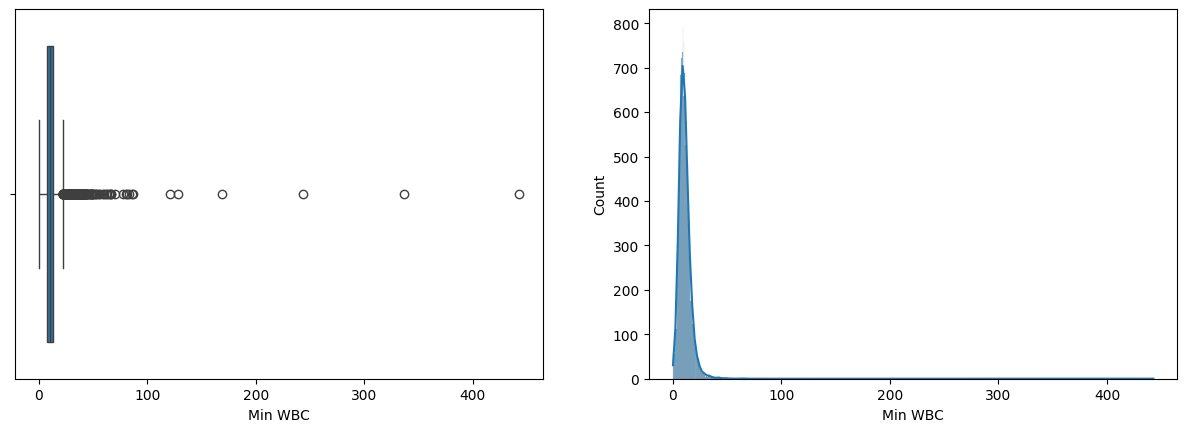

Variable: Mean WBC
Count: 554
Min: 25.1
Max: 521.45


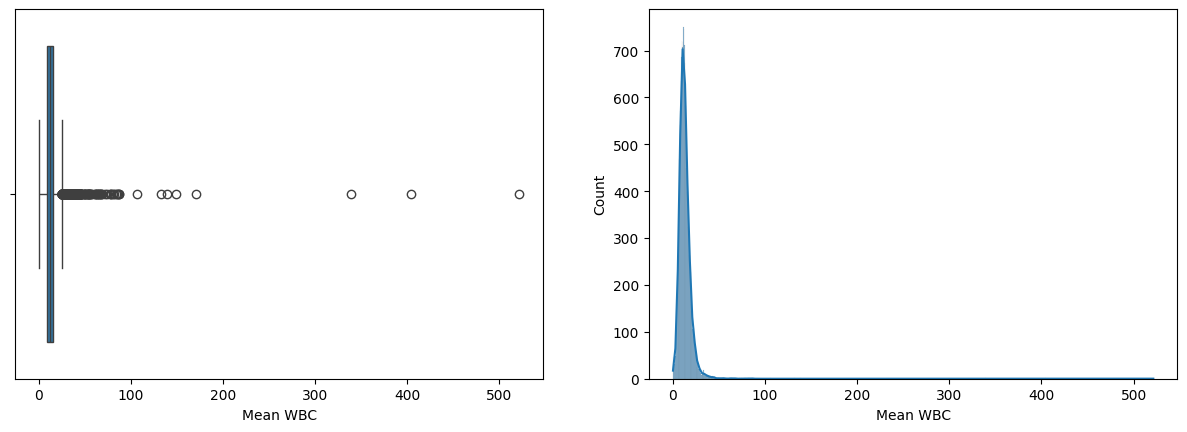

Variable: Max BUN
Count: 1480
Min: 50.0
Max: 251.0


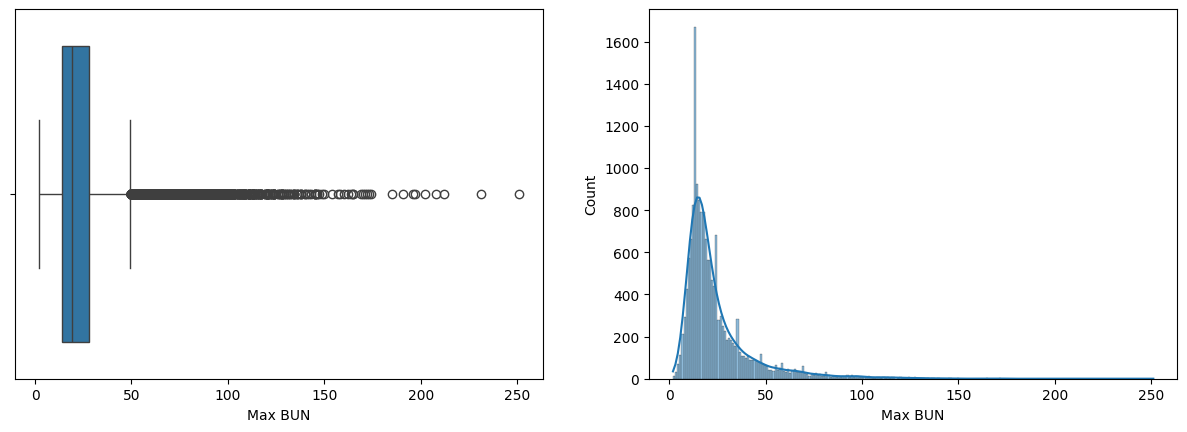

Variable: Min BUN
Count: 1498
Min: 42.0
Max: 196.0


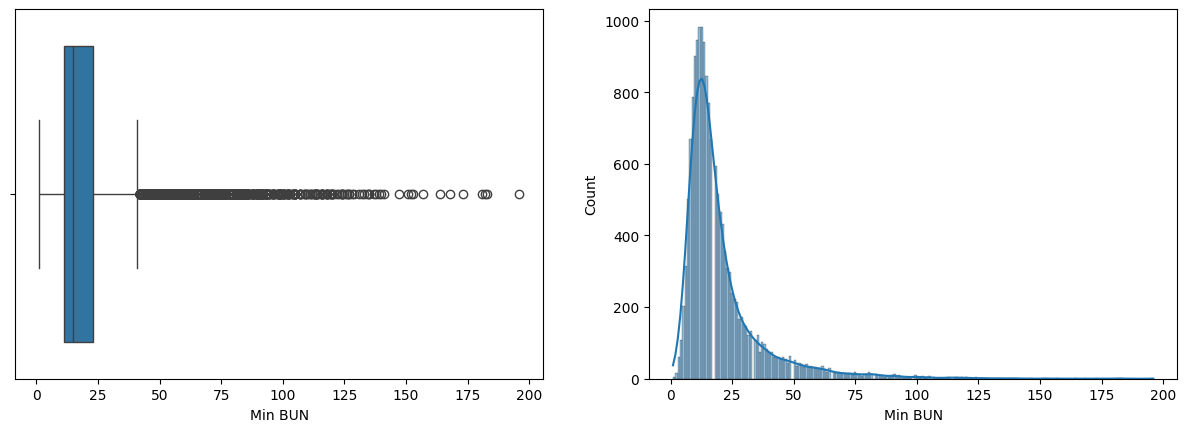

Variable: Mean BUN
Count: 1466
Min: 45.8
Max: 218.71


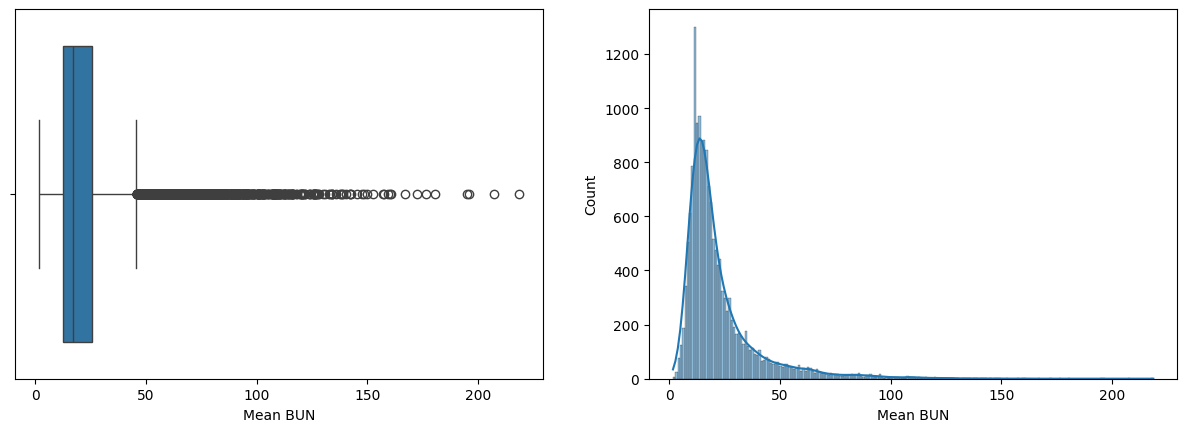

Variable: Max Creatinine
Count: 1663
Min: 2.4
Max: 23.5


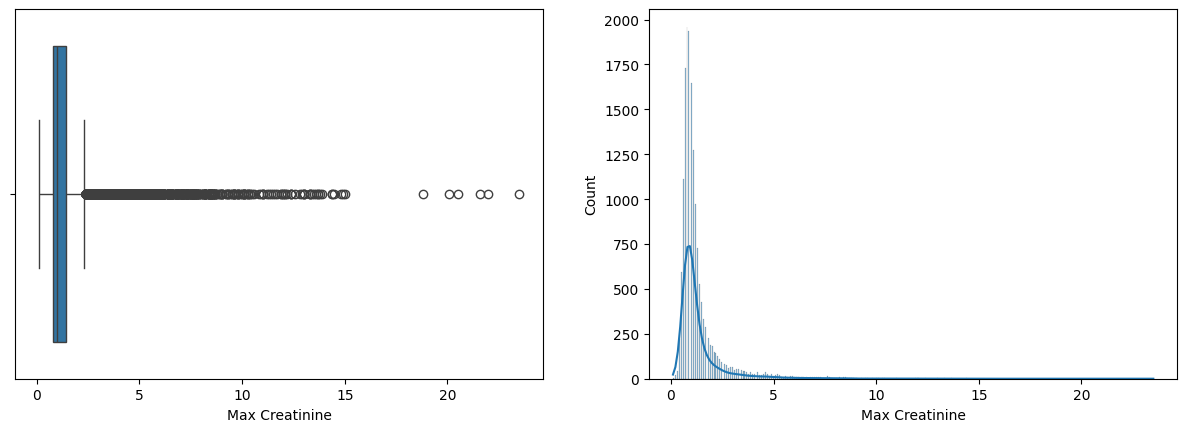

Variable: Min Creatinine
Count: 1796
Min: 1.8
Max: 21.9


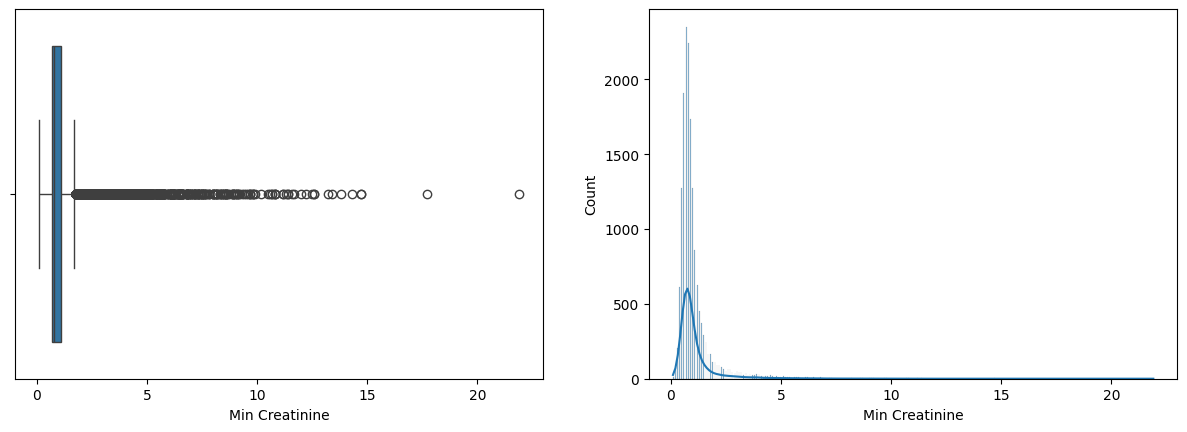

Variable: Mean Creatinine
Count: 1646
Min: 2.08
Max: 22.7


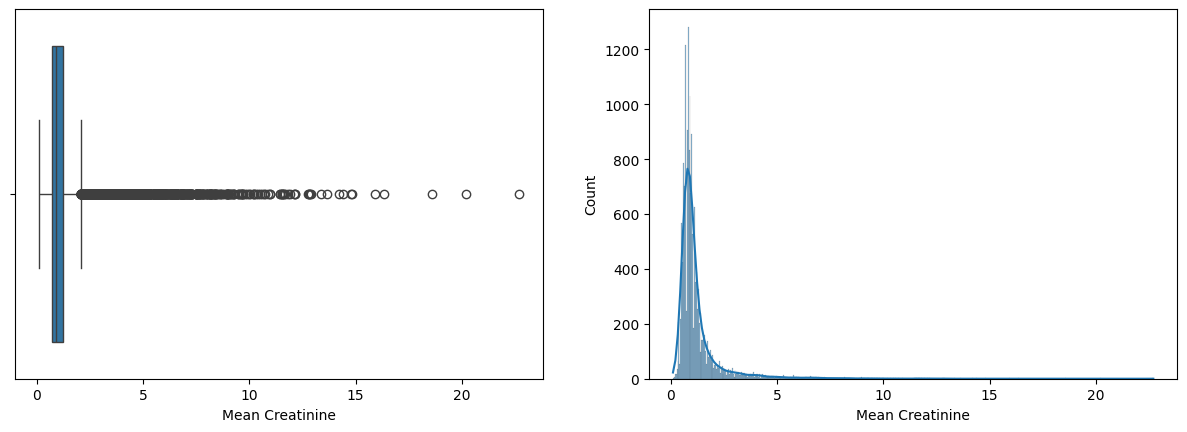

Variable: Max Hemoglobin
Count: 122
Min: 4.6
Max: 21.0


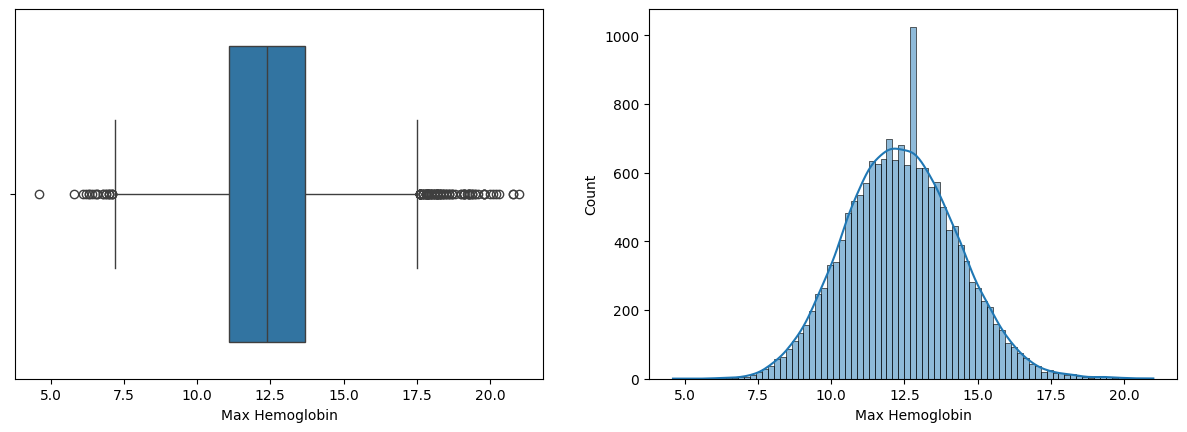

Variable: Min Hemoglobin
Count: 127
Min: 1.2
Max: 19.4


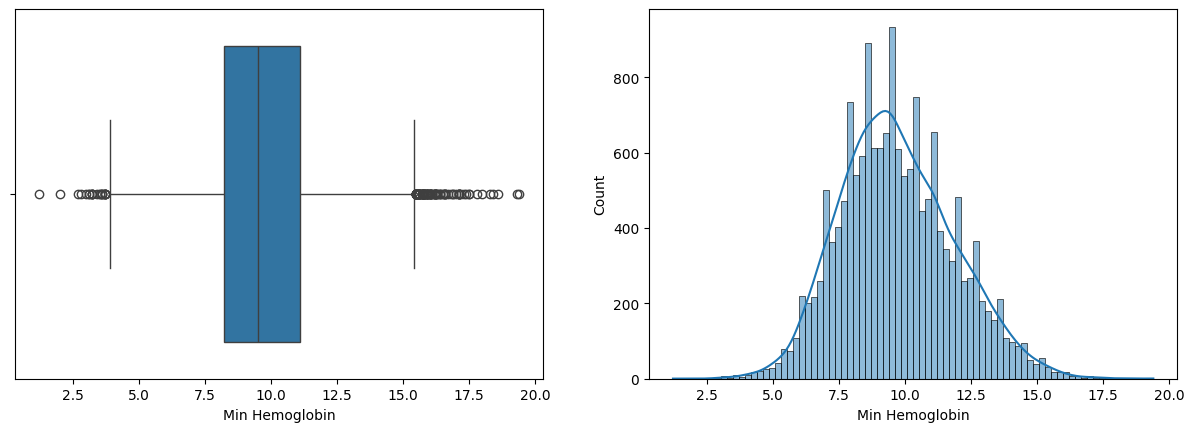

Variable: Mean Hemoglobin
Count: 175
Min: 4.0
Max: 19.6


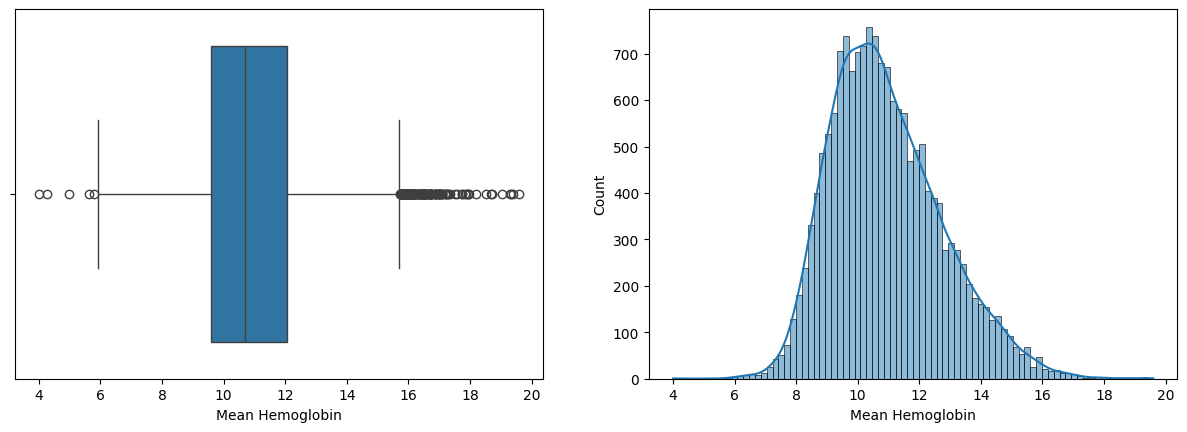

In [14]:
# Boxplot and scatter plot for each variable
lab_results_remove = ['Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
                 'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
                 'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
                 'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
                 'Mean Hemoglobin']

for i in lab_results_remove:
    outliers = extract_outliers(df[i])
    print(f'Variable: {i}')
    print(f'Count: {len(outliers)}')
    print(f'Min: {min(outliers)}')
    print(f'Max: {max(outliers)}')
    draw_box_hist(df[i])

Using boxplot to determine the outliers, we can see that all resuls have outliers in the Laboratory results.  
But there are some rare situation that we could consider to remove from the data set to avoid affect to the prediction:
  
We will consider any record with 5 times higher and 5 lower than normal condition is the outliers and remove it from the dataset (we compare the max, mean, min).  
  
| Variable            | Normal value         | Remove condition | Reference                                                                                                                |
|---------------------|----------------------|------------------|--------------------------------------------------------------------------------------------------------------------------|
| Lactate             | 0 -> 2 (mmol/L)      | > 10 (mmol/L)    | https://www.ncbi.nlm.nih.gov/books/NBK470202/#:~:text=Normal%20lactate%20levels%20are%20less,4%20mmol%2FL%20or%20higher. |
| pH                  | 7.35 -> 7.45         | 6.615 -> 8.195   | https://www.medicalnewstoday.com/articles/ph-of-blood#symptoms-of-changes                                                |
| Glucose             | 50->99 (mg/dL)       | > 500 (mg/dL)   | https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test                                               |
| White Blood Cell    | 4.5 -> 11.0 (10^9/L) | > 55 (10^9/L)   | https://www.mountsinai.org/health-library/tests/wbc-count                                                                |
| Blood Urea Nitrogen | 5   -> 20 (mg/dL)    | > 100 (mg/dL)    | https://www.ncbi.nlm.nih.gov/books/NBK305                                                                                |
| Creatinine          | 0.7 -> 1.3 (mg/dL)  | > 6.5 (mg/dL)                | https://www.mountsinai.org/health-library/tests/creatinine-blood-test#:~:text=Normal%20Results,person's%20size%20and%20muscle%20mass. |
| Hemoglobin          | Variety on invidual  | -                |                                                                                                                          |

In [82]:
# Remove outliers

# Remove records with lactate > 20
# df = df[df['Max Lactate'] <= 20]
# df = df[df['Min Lactate'] <= 20]
# df = df[df['Mean Lactate'] <= 20]

# Remove records with pH < 6.615 and pH > 8.195
df = df[df['Max pH'] >= 6.615]
df = df[df['Max pH'] <= 8.195]
df = df[df['Min pH'] >= 6.615]
df = df[df['Min pH'] <= 8.195]
df = df[df['Mean pH'] >= 6.615]
df = df[df['Mean pH'] <= 8.195]

# Remove records with glucose > 1000
df = df[df['Max Glucose'] <= 500]
df = df[df['Min Glucose'] <= 500]
df = df[df['Mean Glucose'] <= 500]

# Remove records with WBC > 110
df = df[df['Max WBC'] <= 110]
df = df[df['Min WBC'] <= 110]
df = df[df['Mean WBC'] <= 110]

# Remove records with BUN > 200
df = df[df['Max BUN'] <= 200]
df = df[df['Min BUN'] <= 200]
df = df[df['Mean BUN'] <= 200]

# Remove records with Creatinine > 6.5
df = df[df['Max Creatinine'] <= 6.5]
df = df[df['Min Creatinine'] <= 6.5]
df = df[df['Mean Creatinine'] <= 6.5]

df.shape

(16083, 67)

With that condition, we removed 5488 records

## Univariate data distribution

Because we have a large dataset more than 15,000 records. Using the Normality Tests might sensitive to sample size -> Therefore, we using Q-Q plot and histogram to assess the normalize the data.


In [51]:
# Draw boxplot and histogram for each variable with 3 group (Survive, Non-survive, total)  after removing outliers
def draw_box_hist_group(data):
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(15)
    # Boxplot
    sns.boxplot(data=df, y=data, color="grey", ax=ax[0])
    sns.boxplot(data=df, x="Hospital Mortality", y=data, hue="Hospital Mortality", ax=ax[0])

    # Histogram
    sns.histplot(df, x=data, kde=True, color="grey", label="Total", ax=ax[1])
    sns.histplot(df, x=data, kde=True, hue="Hospital Mortality", ax=ax[1])

    # Add the patches to the legend
    ax[0].legend(title='Hospital Mortality', title_fontsize='13', labels=['Total', '0', '1'], fontsize='12', loc='upper right')
    ax[1].legend(title='Hospital Mortality', title_fontsize='13', labels=['Total', '0', '1'], fontsize='12')
    
    fig.suptitle(data.name)

    plt.show()

# Histogram and QQ plot for data
def draw_QQ_hist(data):
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(15)
    sns.histplot(data, kde=True, ax=ax[0])
    ax[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(data.mean(), color='b', linestyle='dashed', linewidth=2)
    ax[0].axvline(data.mode()[0], color='g', linestyle='dashed', linewidth=2)


    qqplot(data, line='s', ax=ax[1])
    ax[1].set_title('QQ plot')
    fig.suptitle(f'Check Normality {data.name}')

    plt.show()

### Level Glucose in blood

The level of Glucose in blood is **no normal distribution** based on histogram, QQ plot and the Ktest.  
We can see that the Mean of Glucose of patient is higher than 100 mg/dL, we can see that patients who take ICU admission tend to have **higher level of Glucose than normal people**. In other way, they are pre diabetes

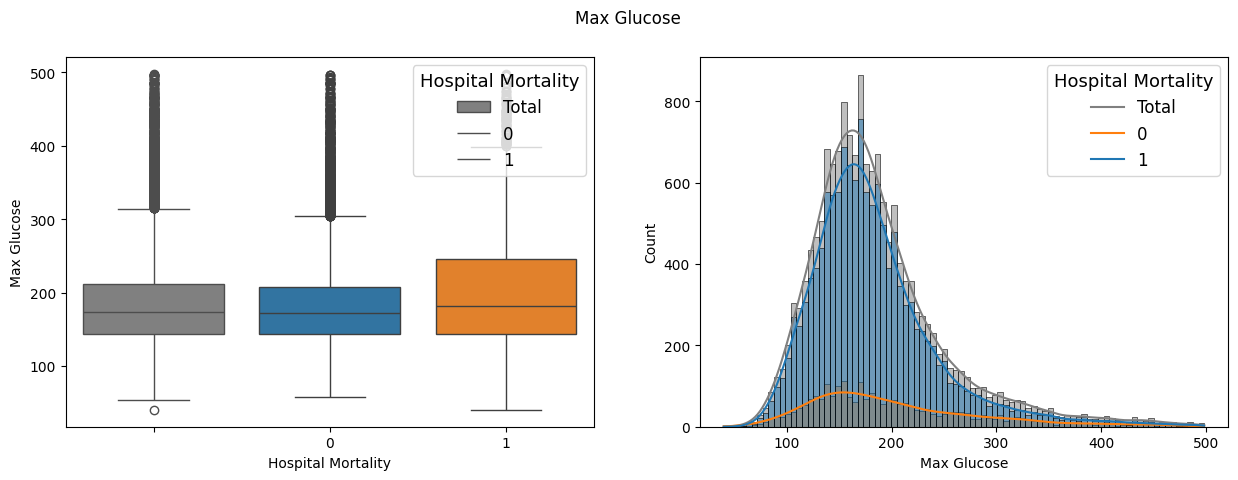

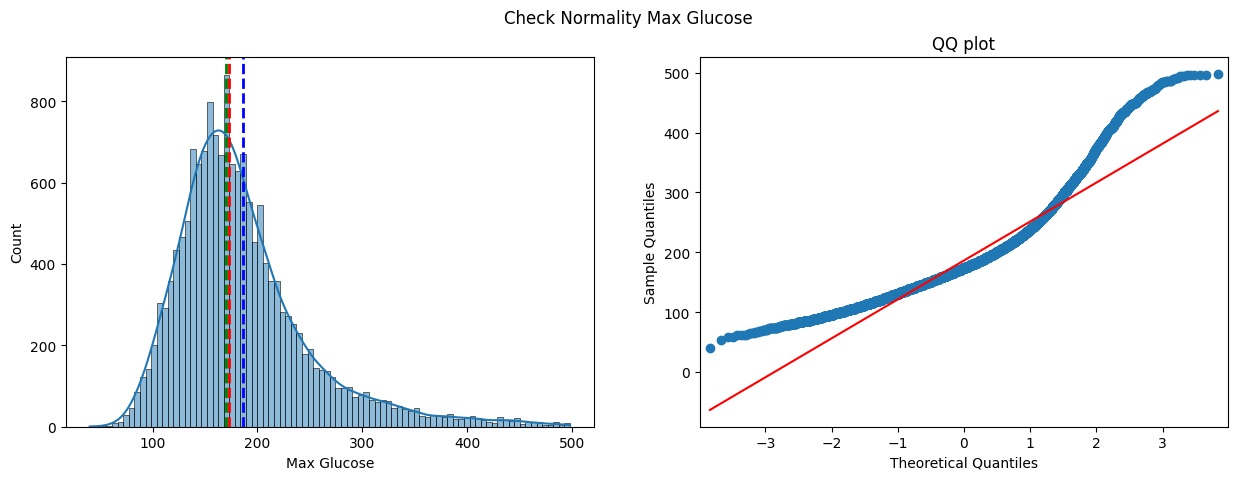

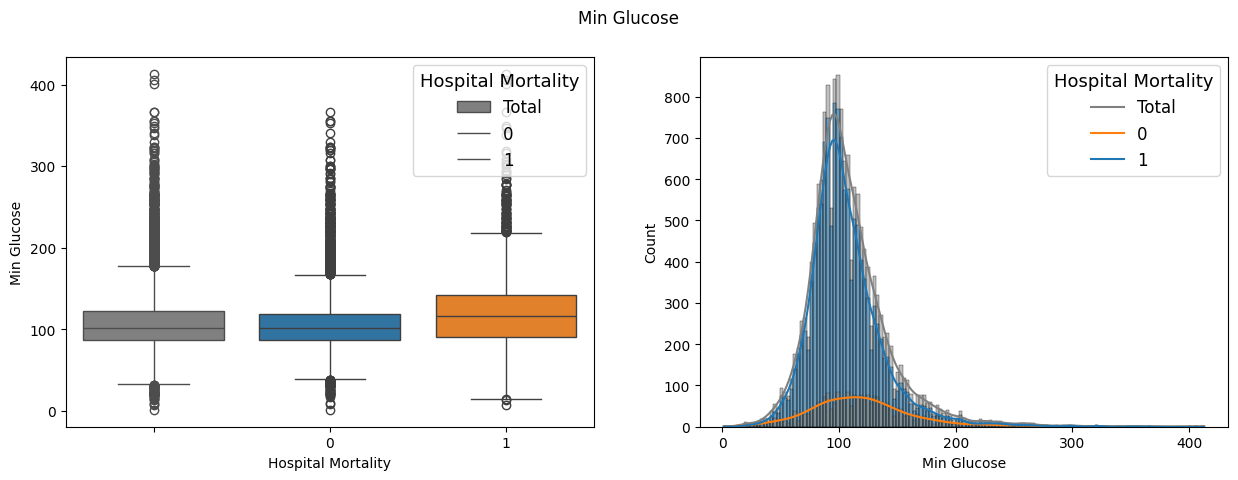

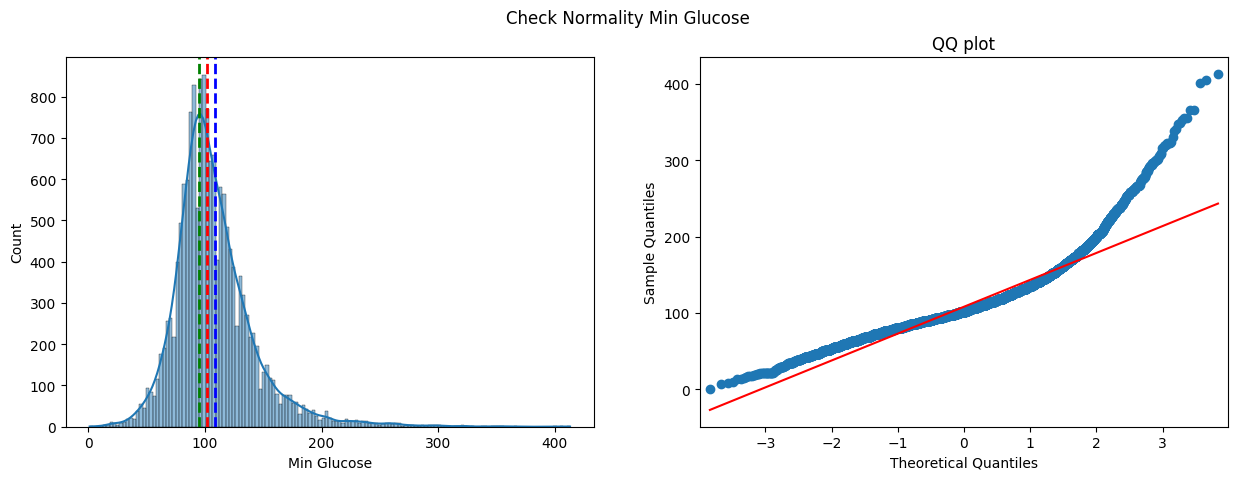

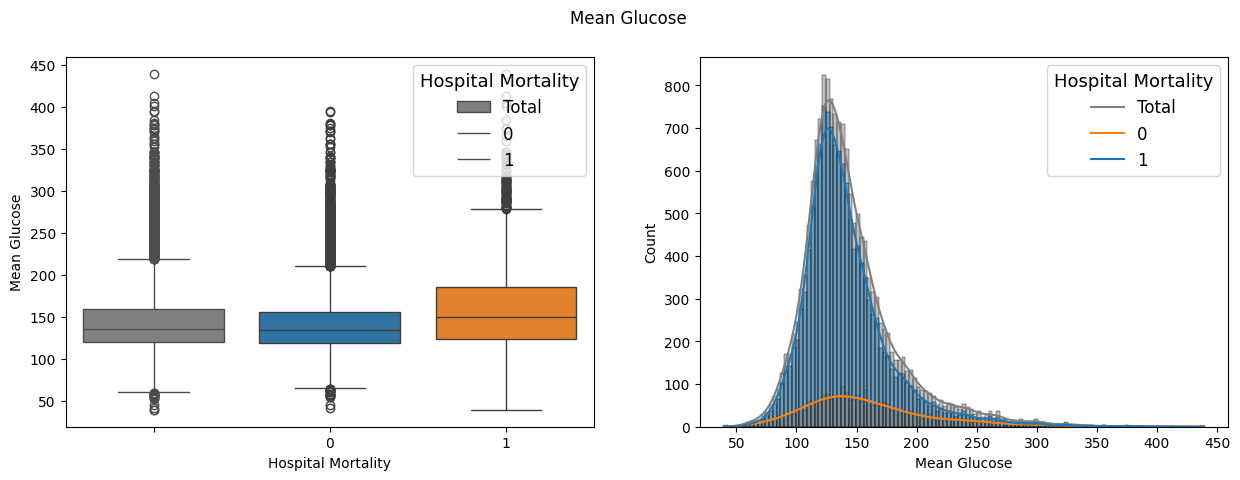

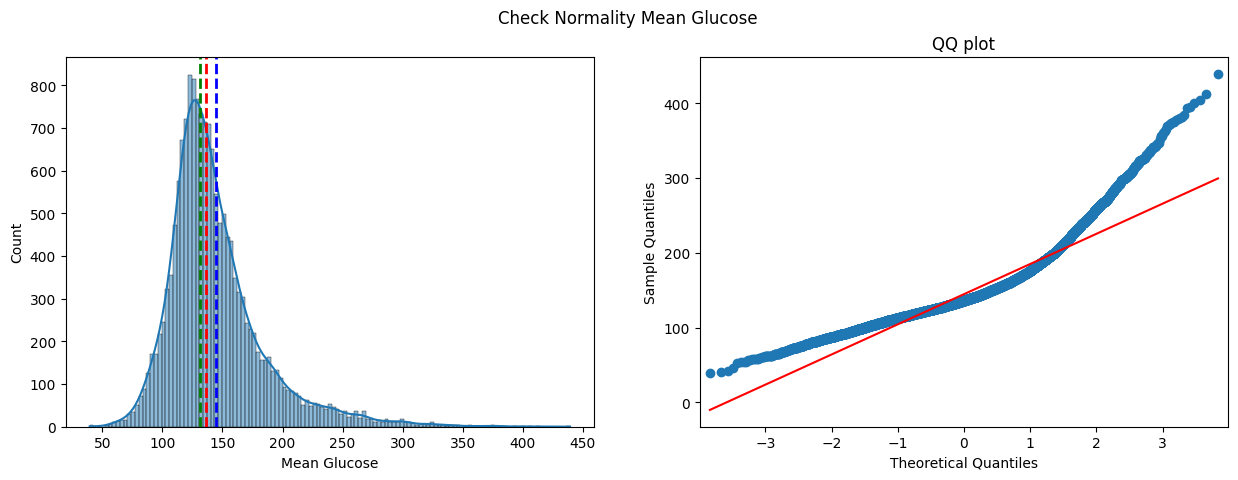

In [83]:
glucose = df['Max Glucose'], df['Min Glucose'], df['Mean Glucose']
for i in glucose:
    draw_box_hist_group(i)
    draw_QQ_hist(i)

### pH

Based on the graphs and test, there are **no normal distribution** in the pH result.  
We also found that the mean of pH test of patient which is 7.30 is **lower end of the normal range** (between 7.35 -> 7.45)

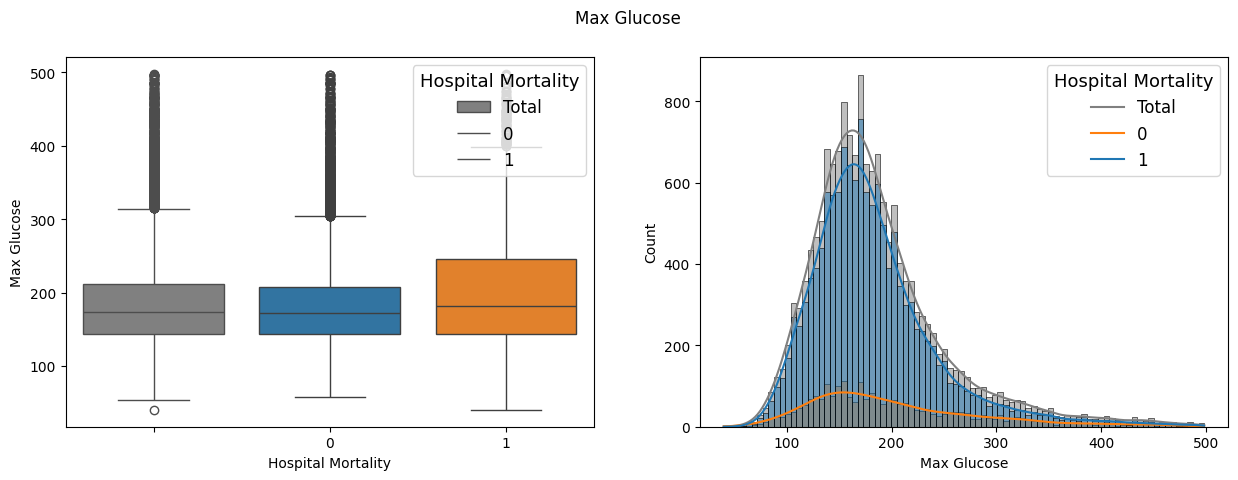

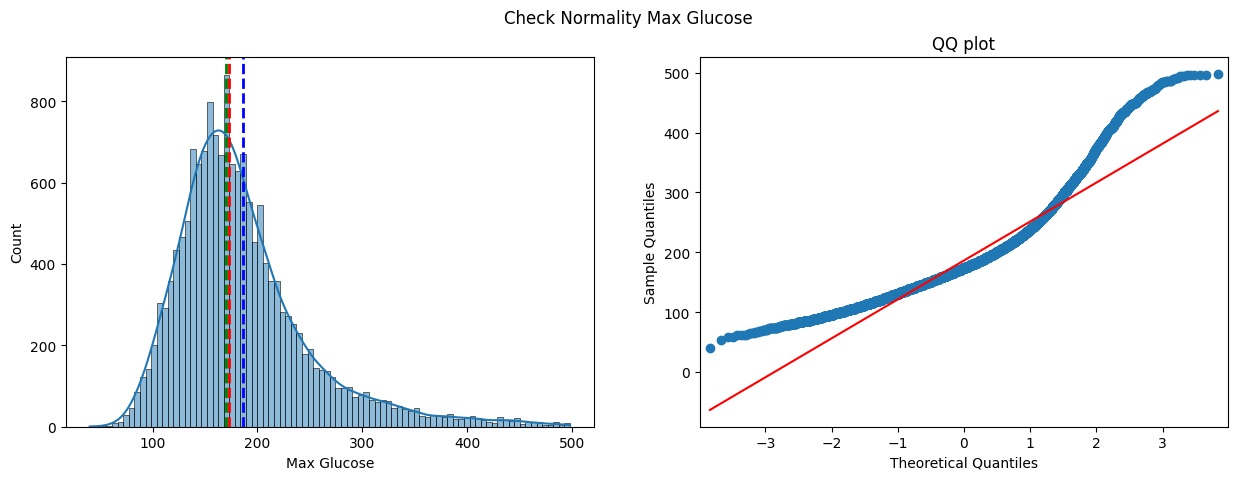

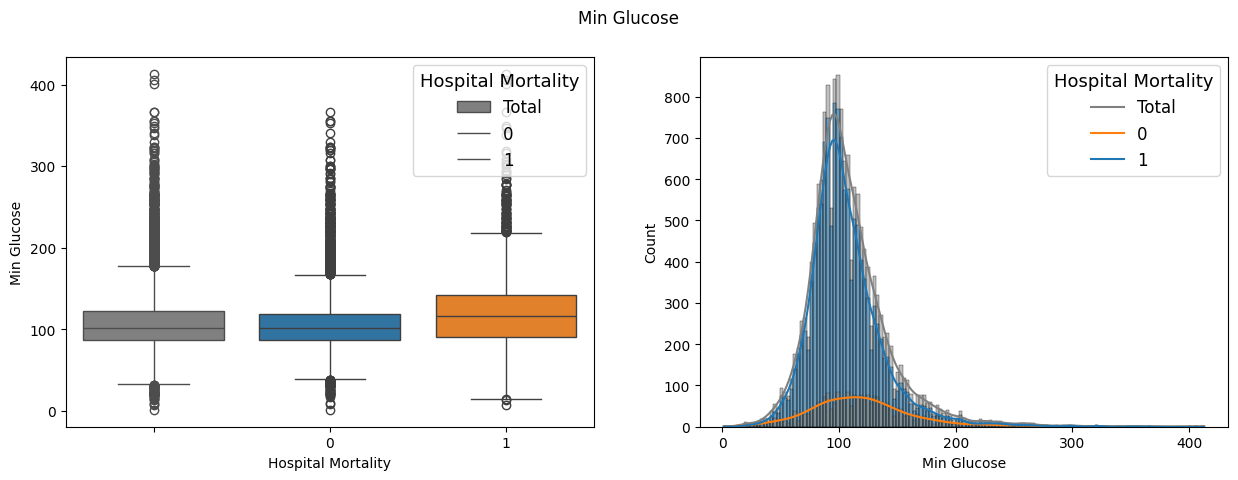

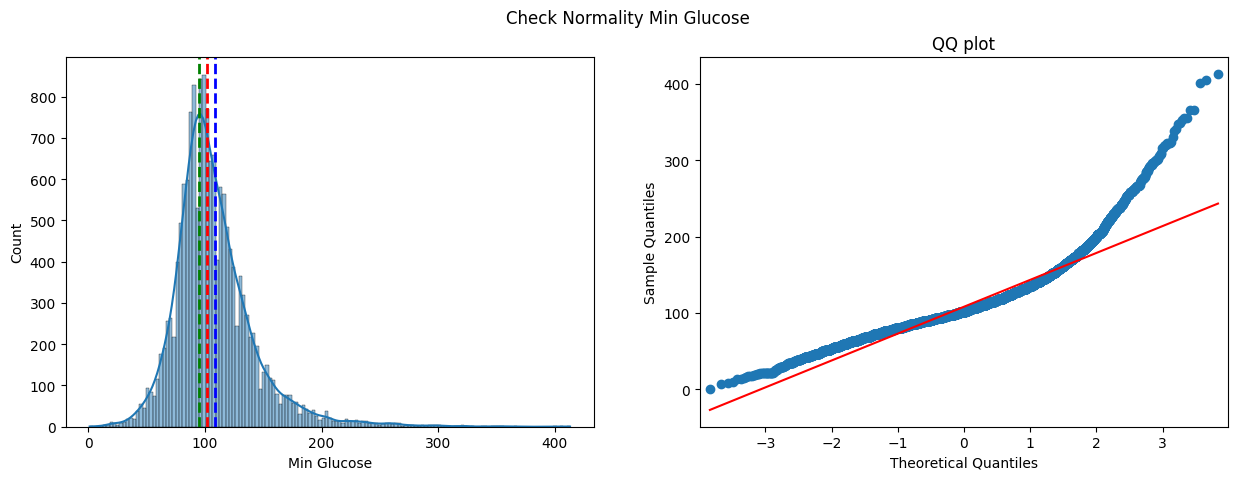

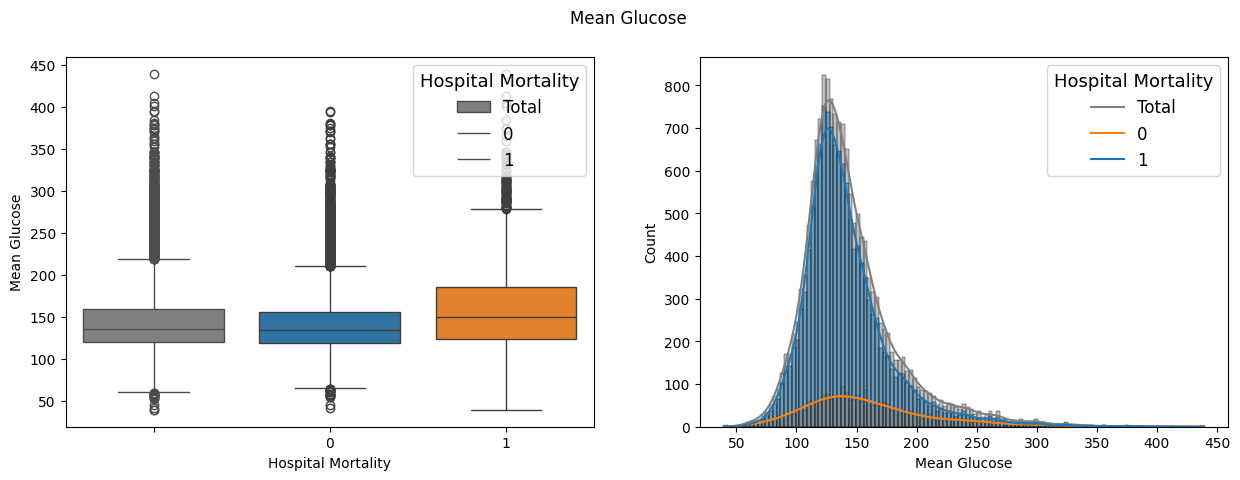

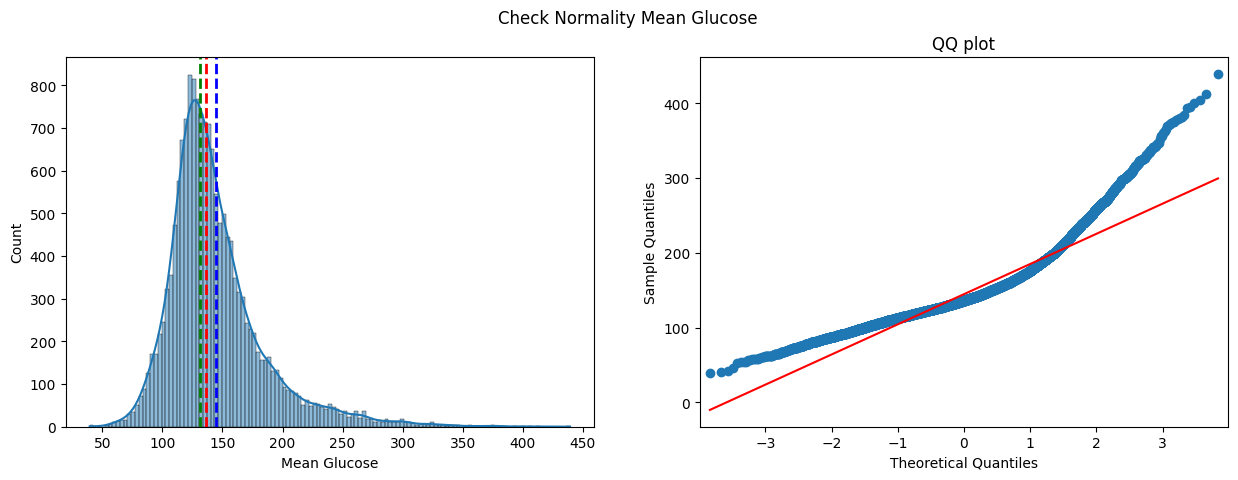

In [53]:
ph = df['Max pH'], df['Min pH'], df['Mean pH']
for i in glucose:
    draw_box_hist_group(i)
    draw_QQ_hist(i)

### Number of White Blood Cell

Based on the graphs and test, there are **no normal distribution** in the number of White Blood Cell.  
We also found that the mean of White Blood Cell test of patient which is 12.95 x10^9 L is **higher than normal person** (between 4.5 to 11)

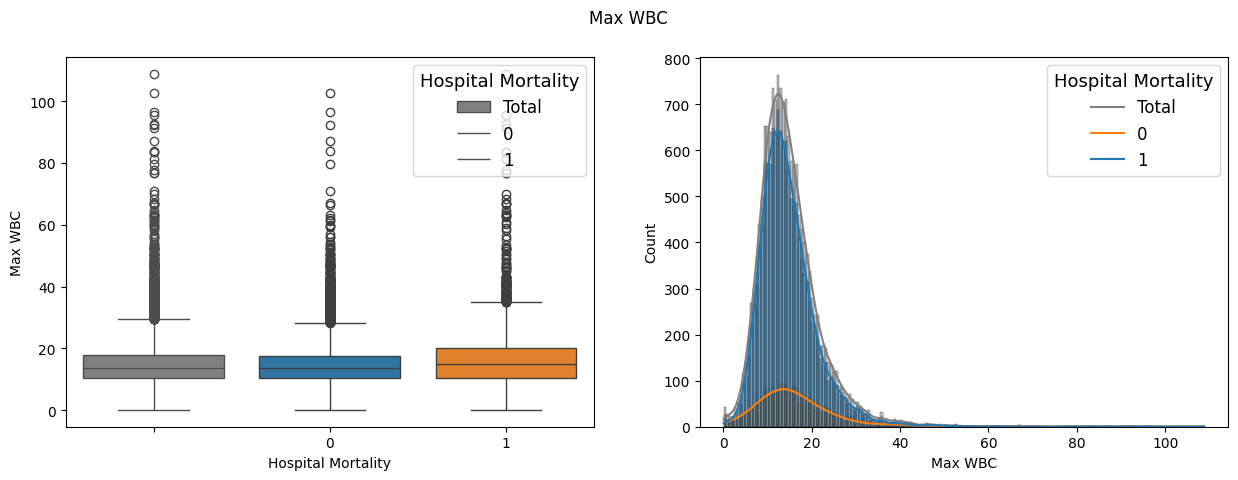

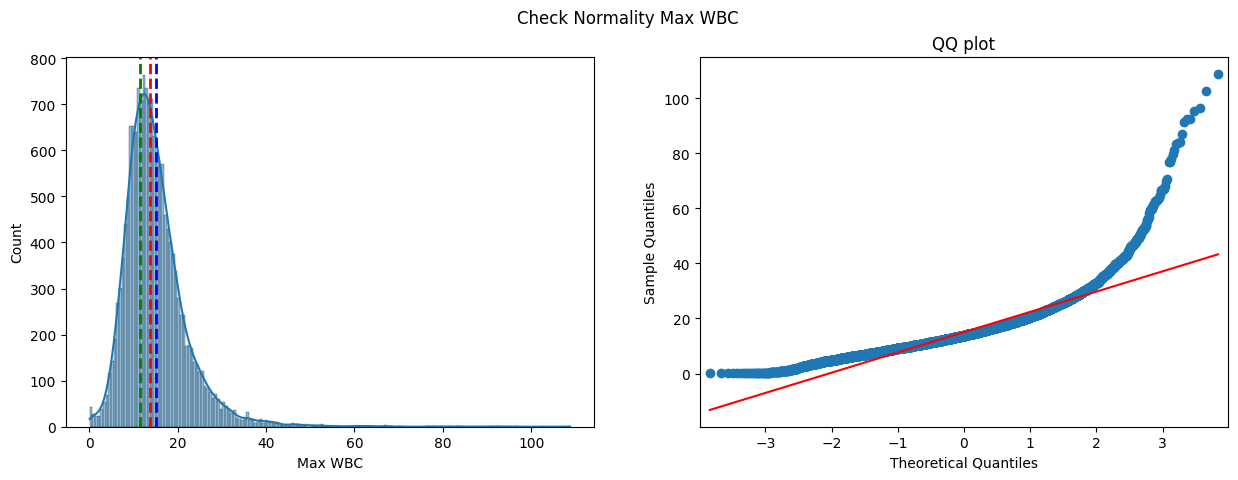

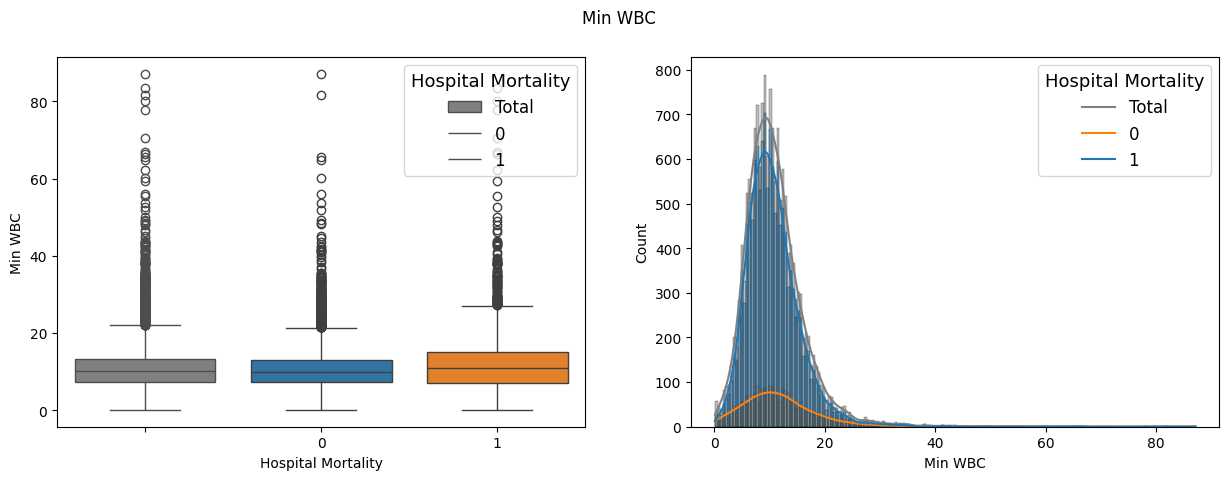

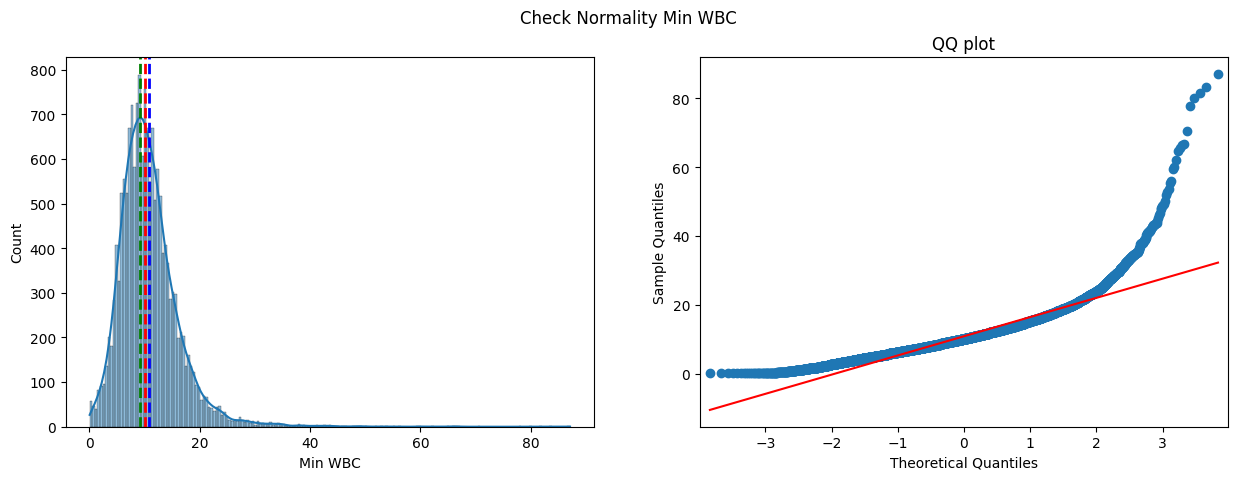

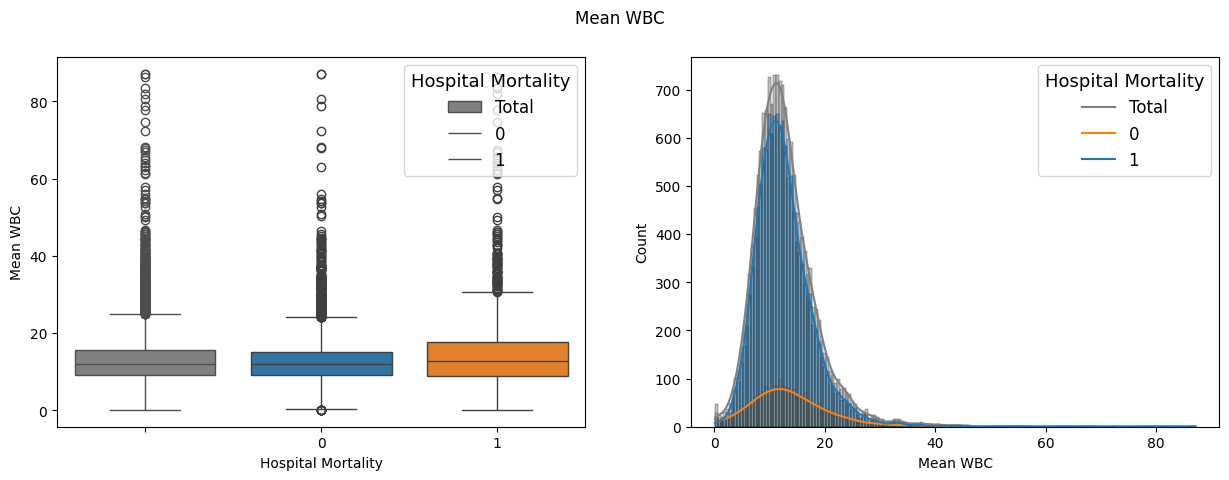

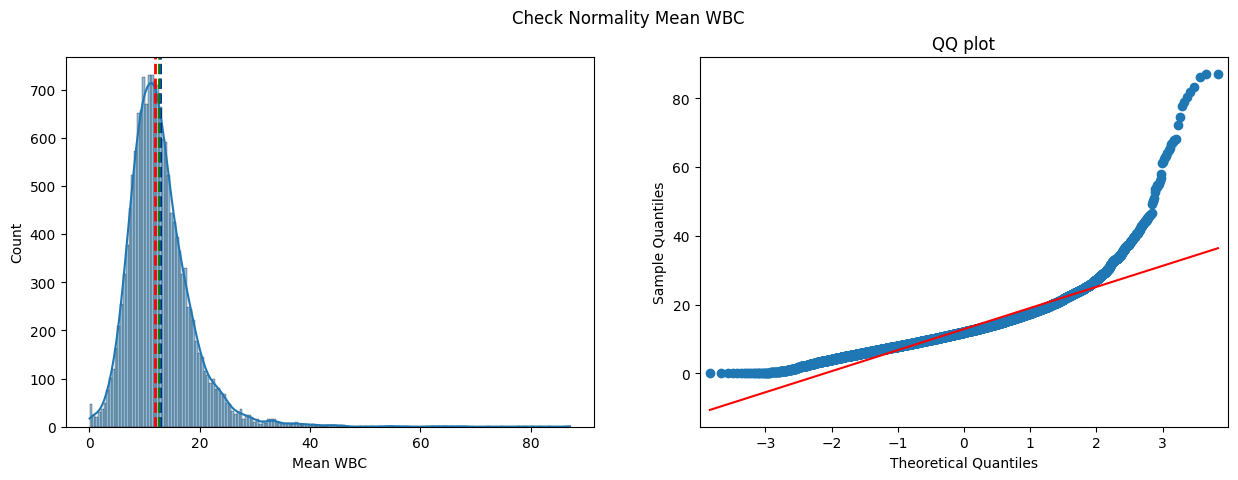

In [54]:
wbc = df['Max WBC'], df['Min WBC'], df['Mean WBC']
for i in wbc:
    draw_box_hist_group(i)
    draw_QQ_hist(i)

### Number of Blood Urea Nitrogen

Based on the graphs and test, there are **no normal distribution** in the Blood Urea Nitrogen result.  
We also found that the mean of BUN test of patient which is 22.71 mg/dL is **higher than normal person** (between 5 to 20 mg/dL)

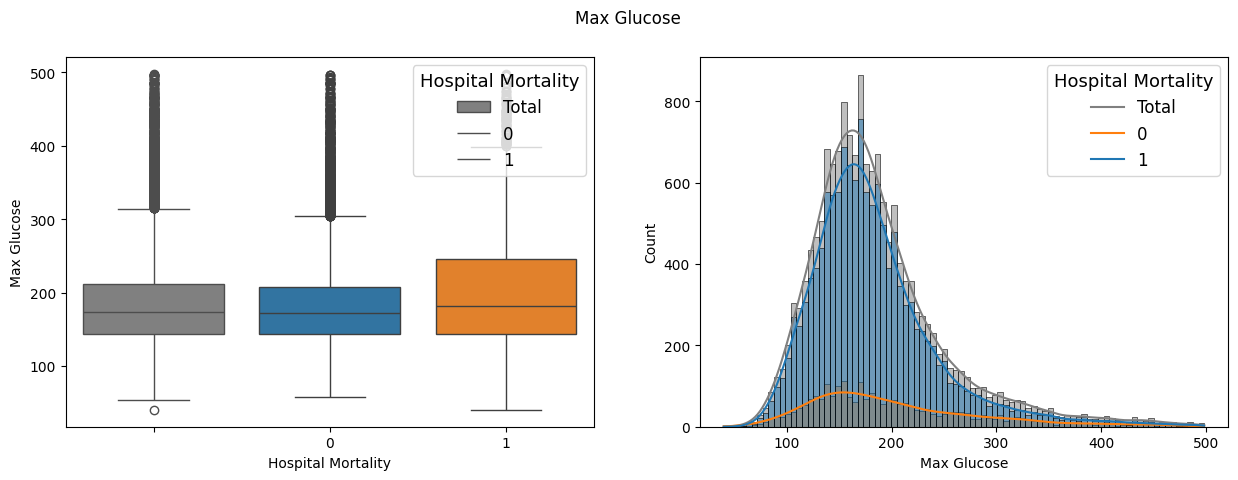

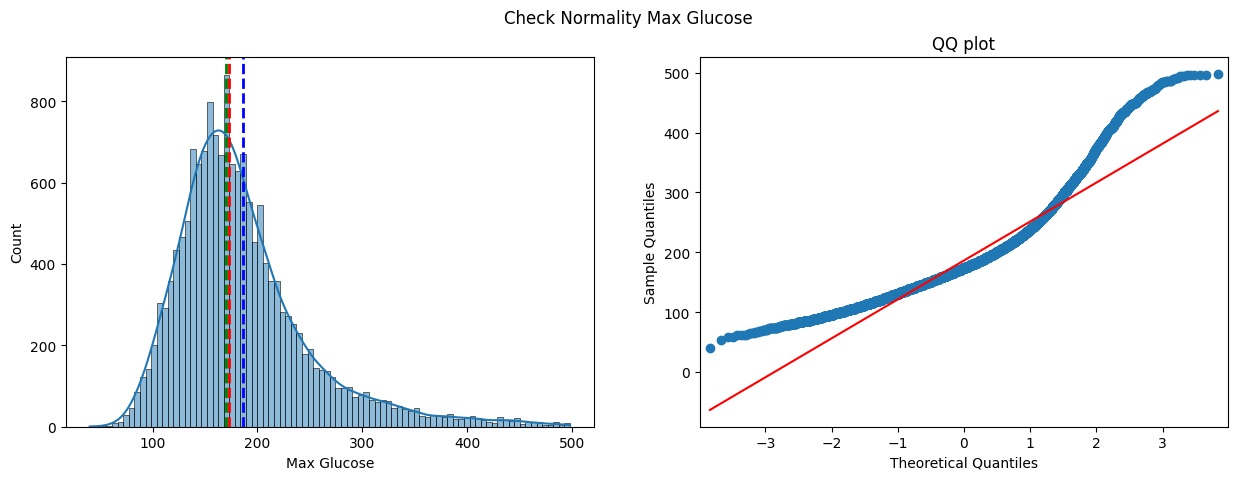

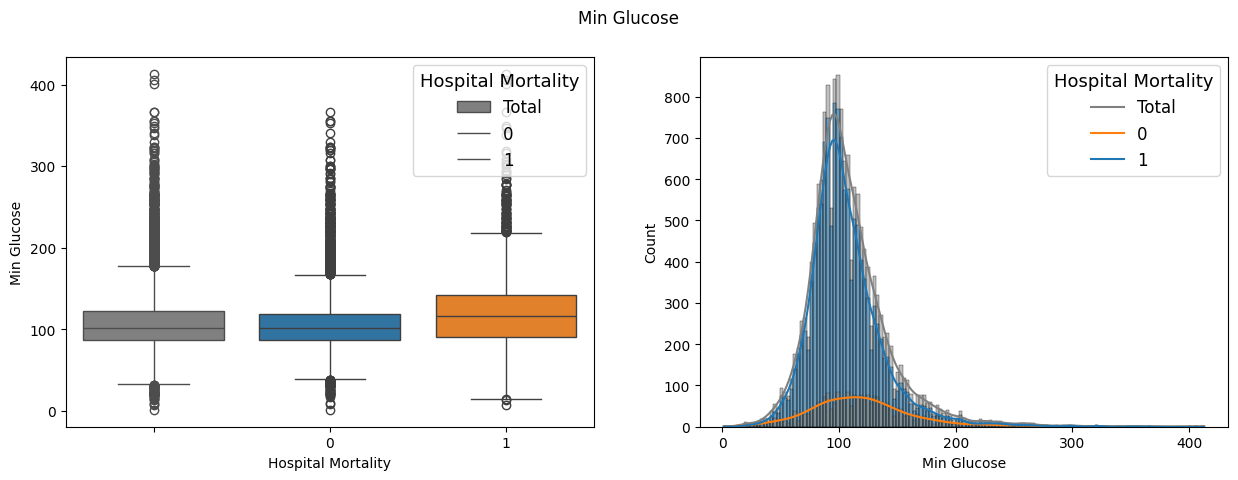

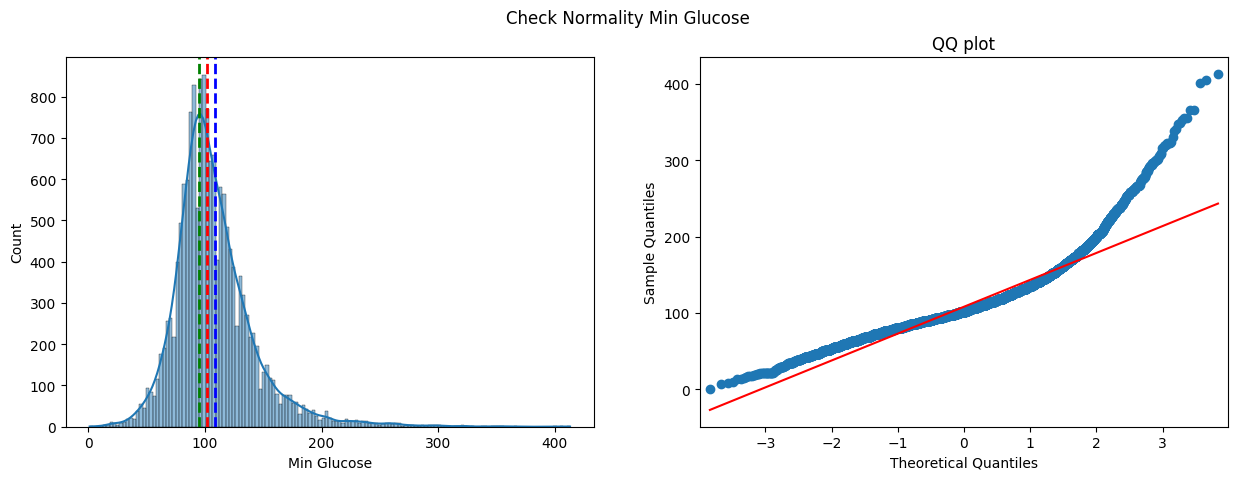

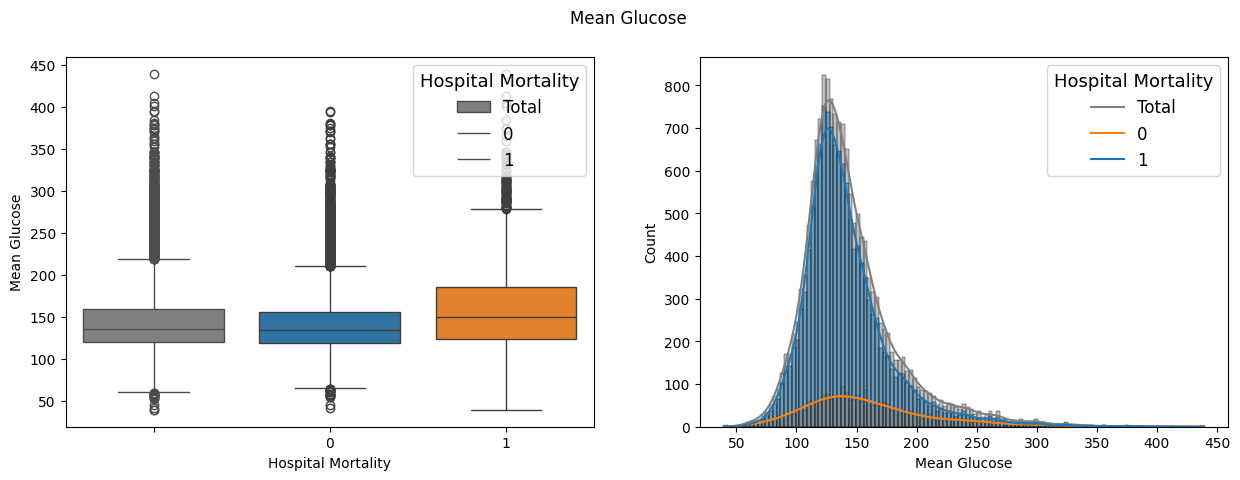

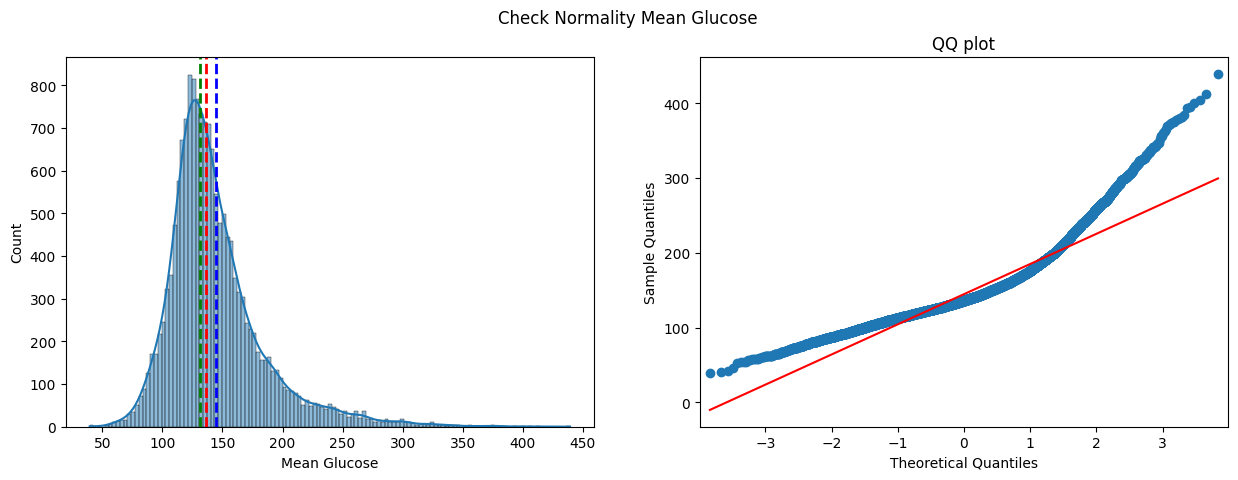

In [87]:
bun = df['Max BUN'], df['Min BUN'], df['Mean BUN']
for i in glucose:
    draw_box_hist_group(i)
    draw_QQ_hist(i)

### Creatinine

Based on the graphs and test, there are **no normal distribution** in the Creatine result.  
Although there are no specific Creatinine of normal range but we can see the histogram has the right skewed, we can assume that patient tend to have higher Creatinine level when they need to take ICU admission

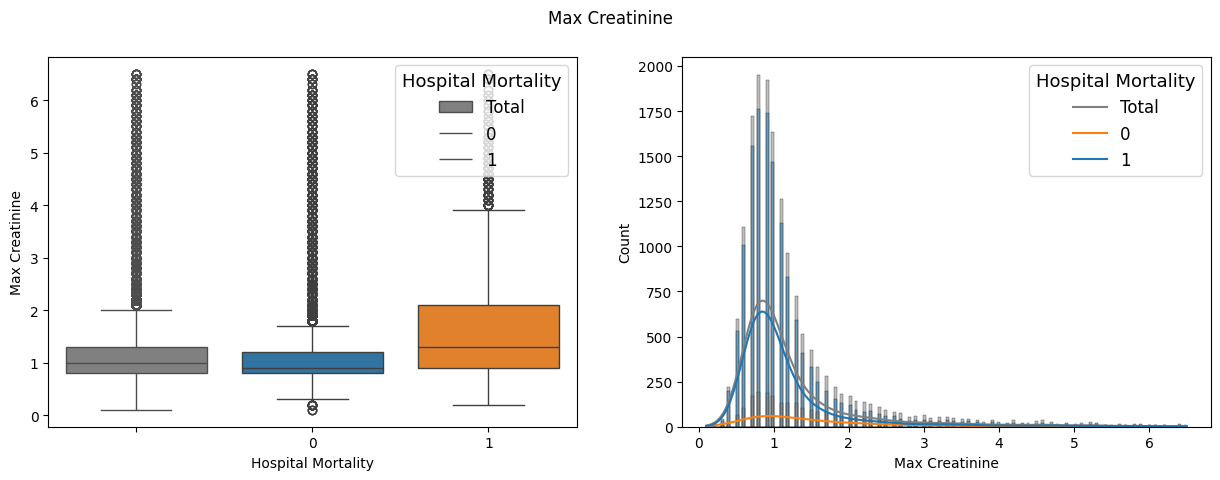

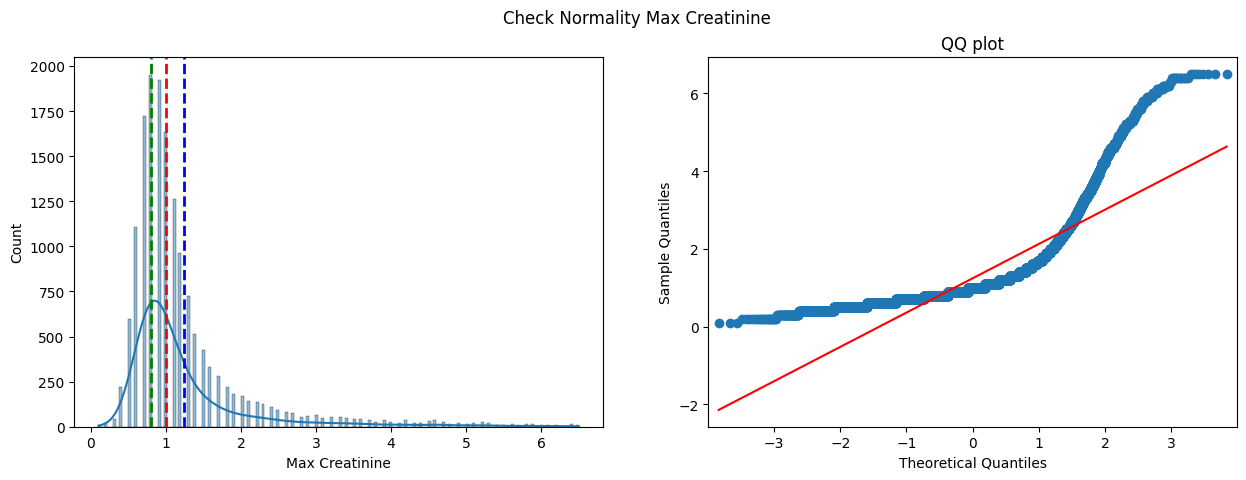

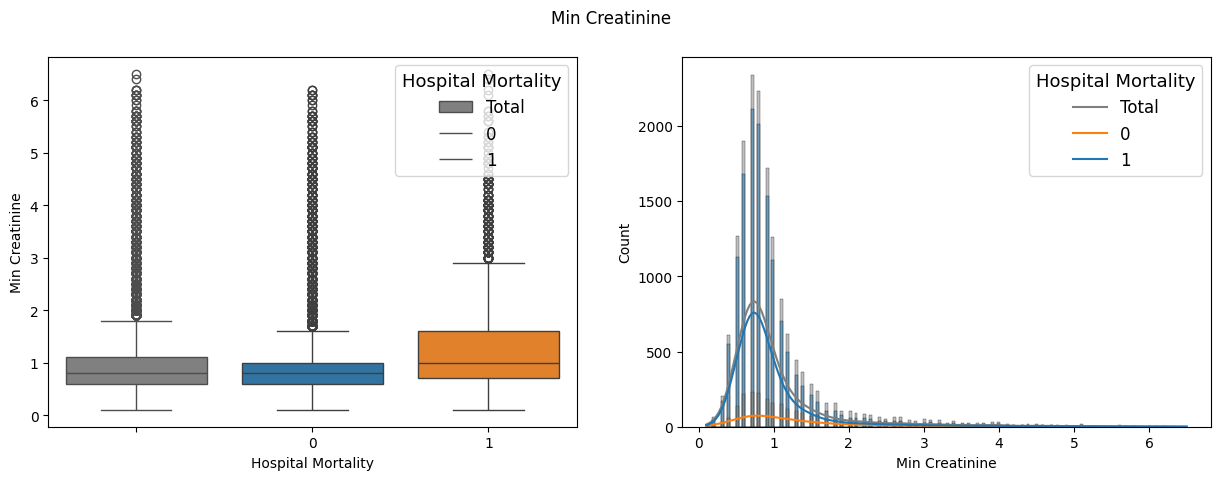

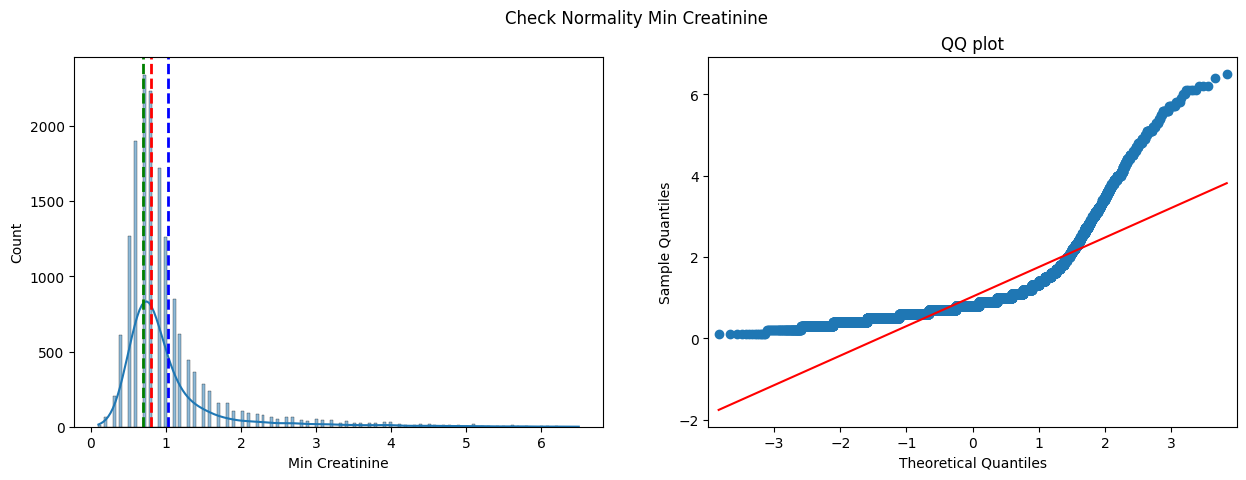

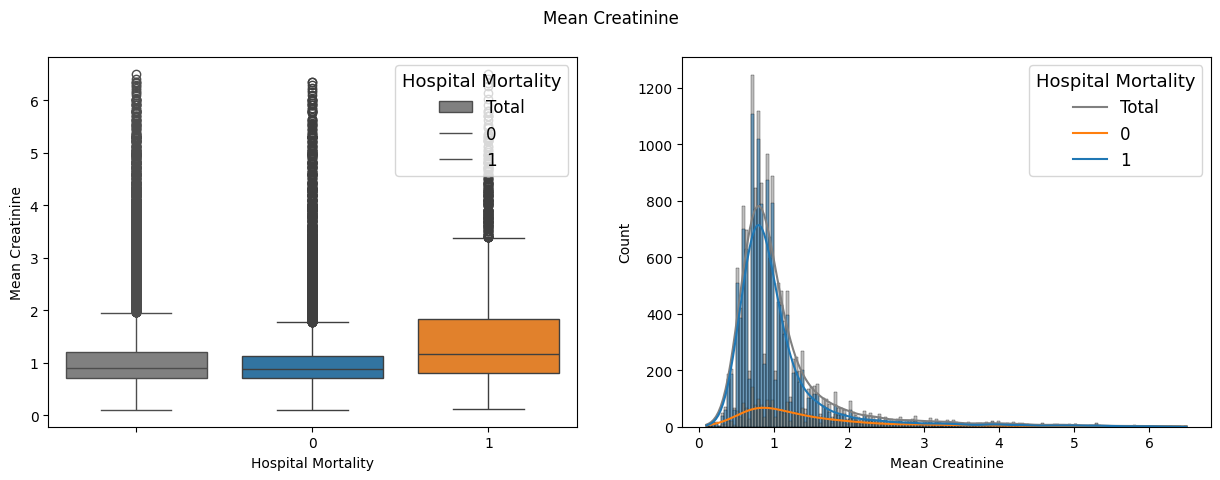

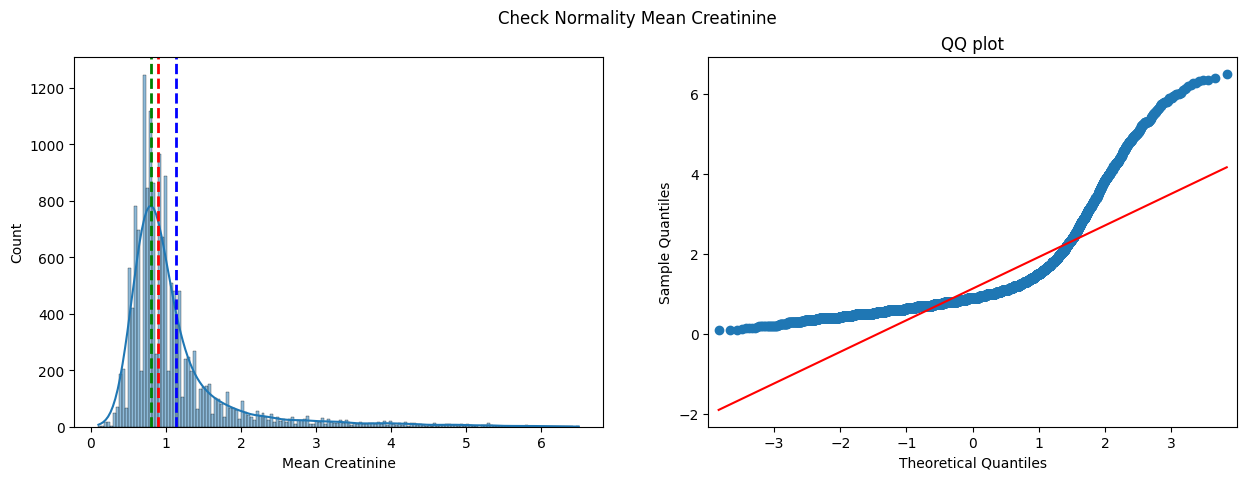

In [84]:
creatinine = df['Max Creatinine'], df['Min Creatinine'], df['Mean Creatinine']
for i in creatinine:
    draw_box_hist_group(i)
    draw_QQ_hist(i)

### Hemoglobin

Although the Ktest return no distribution in the Hemoglobin, but look at the histogram and QQ plot, we can see that there are normal distribution.

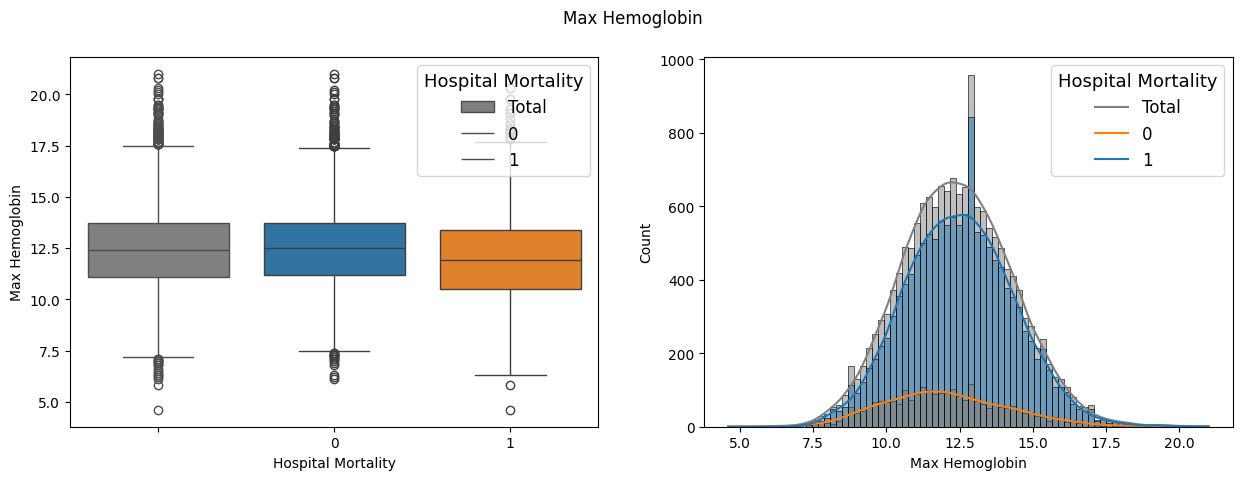

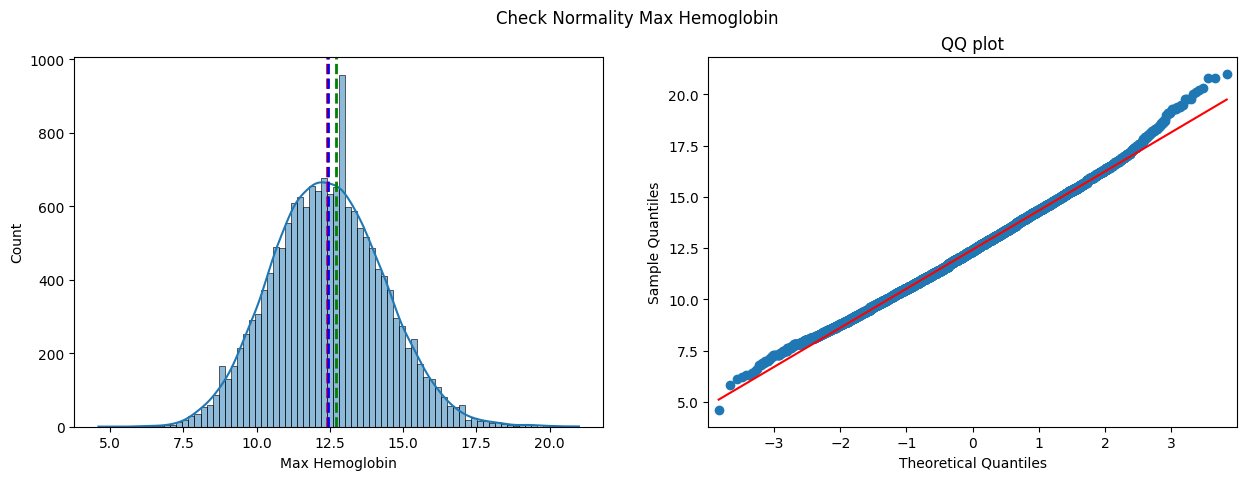

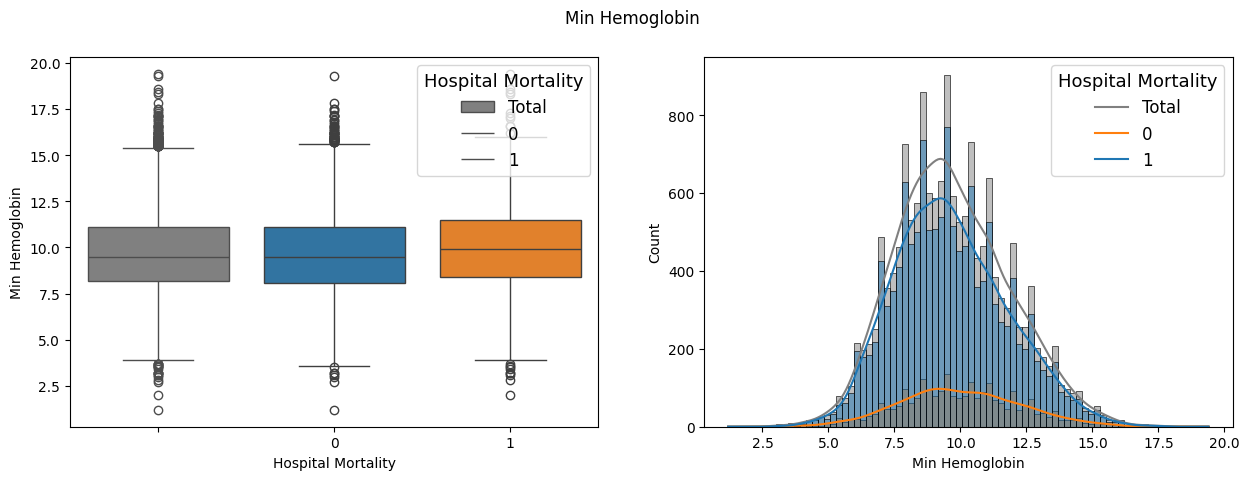

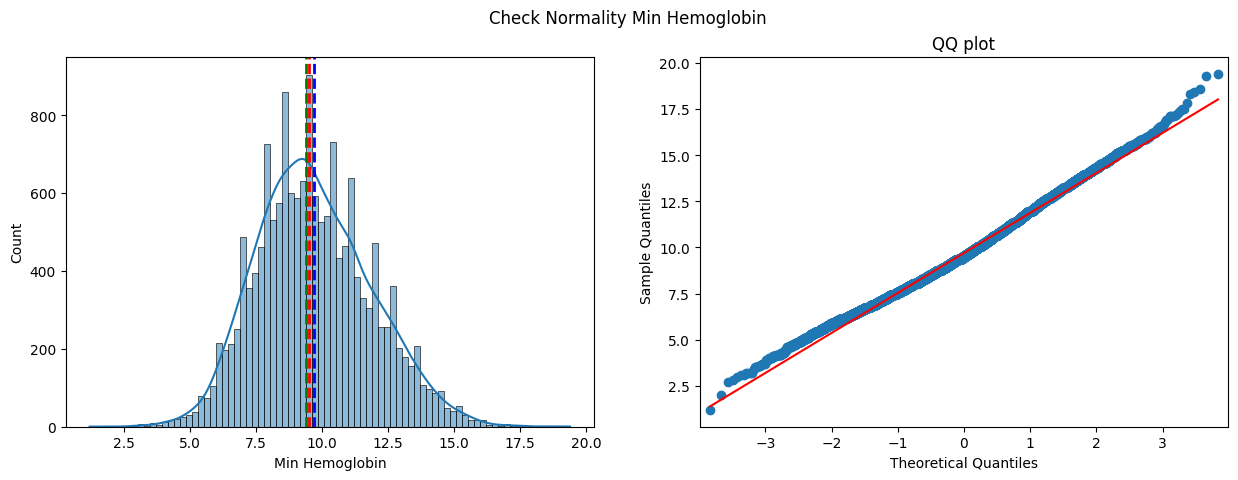

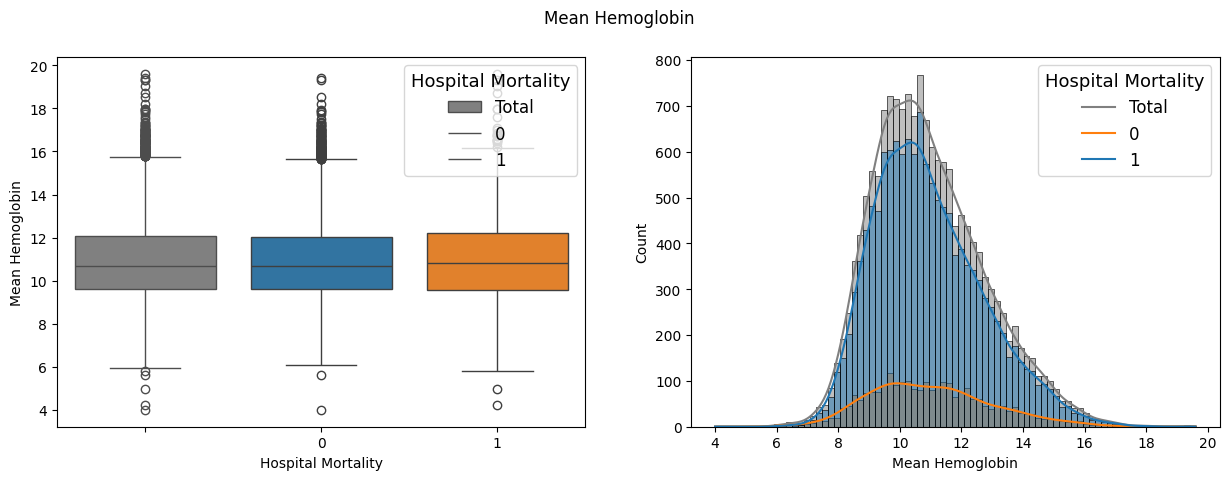

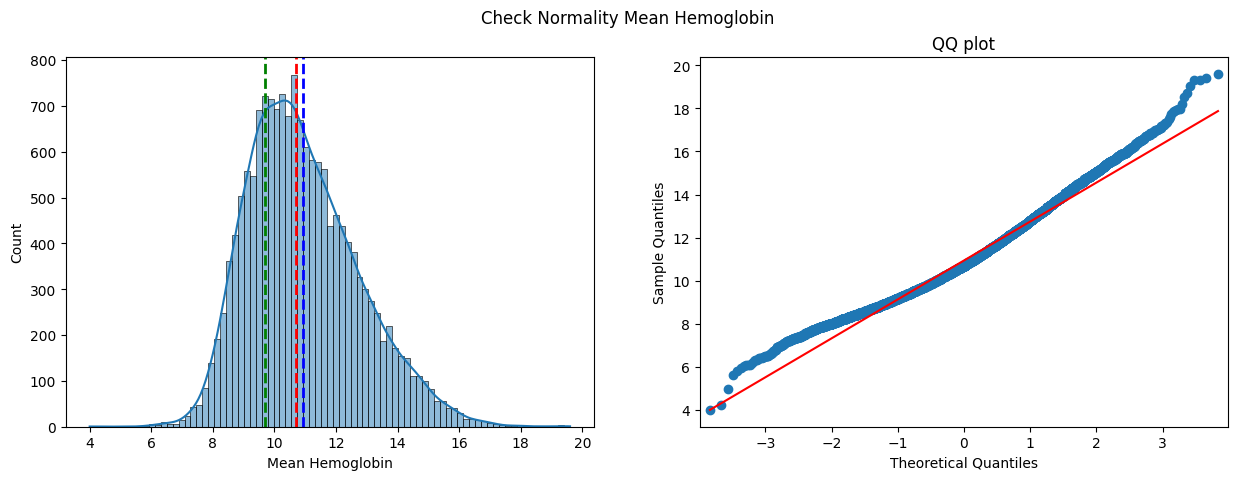

In [85]:
hemoglobin = df['Max Hemoglobin'], df['Min Hemoglobin'], df['Mean Hemoglobin']
for i in hemoglobin:
    draw_box_hist_group(i)
    draw_QQ_hist(i)

## Conclusion Univariate
People with ICU admission tend to have:
- Lower pH
- Higher White Blood Cell
- Higher Blood Ucrea Nitrogen
- Higher Creatinine
- Higher Hemoglobin  
Than normal person


## Pair wise data distributions

Create matrix of scatter plots

In [9]:
# Scatter plot matrix of the data
sns.pairplot(df[continous_var], hue="Hospital Mortality")

KeyboardInterrupt: 

## Standardize data


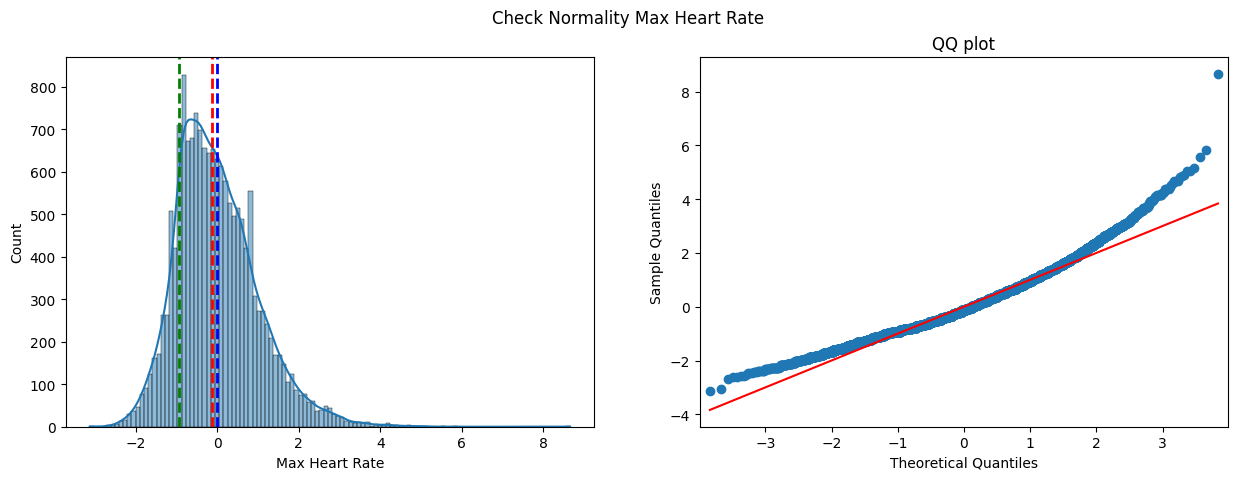

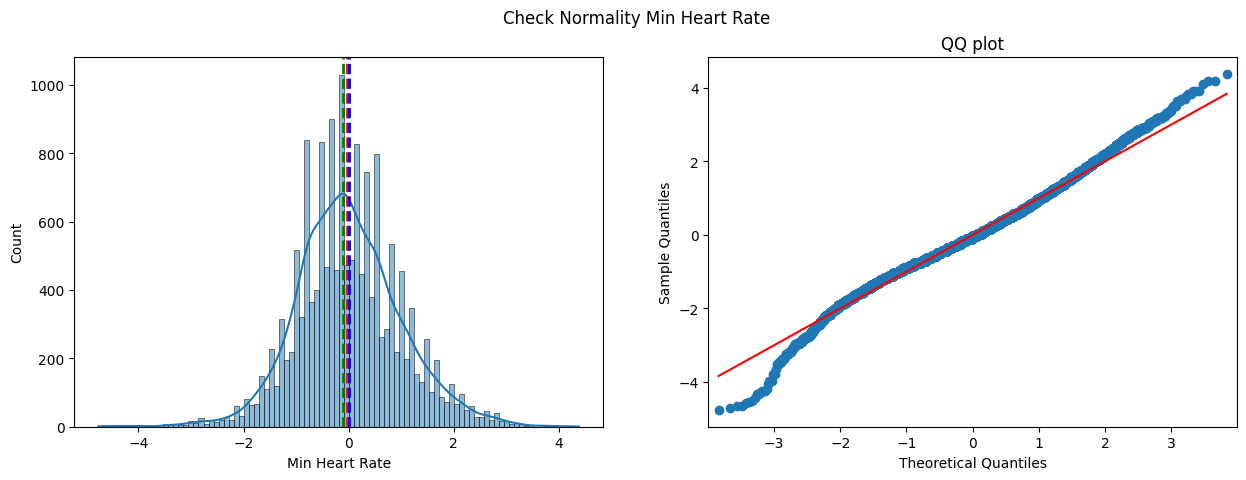

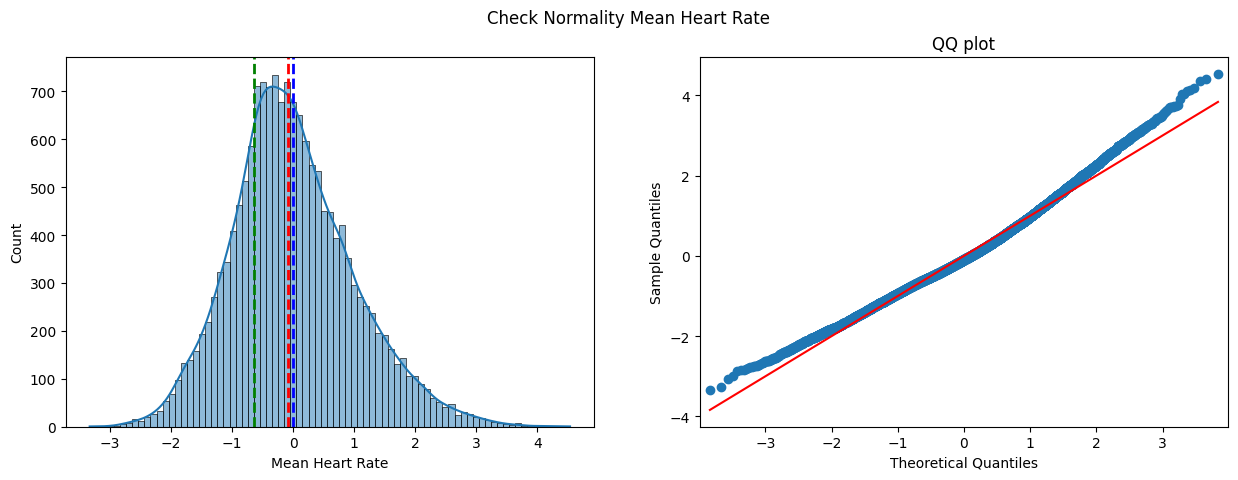

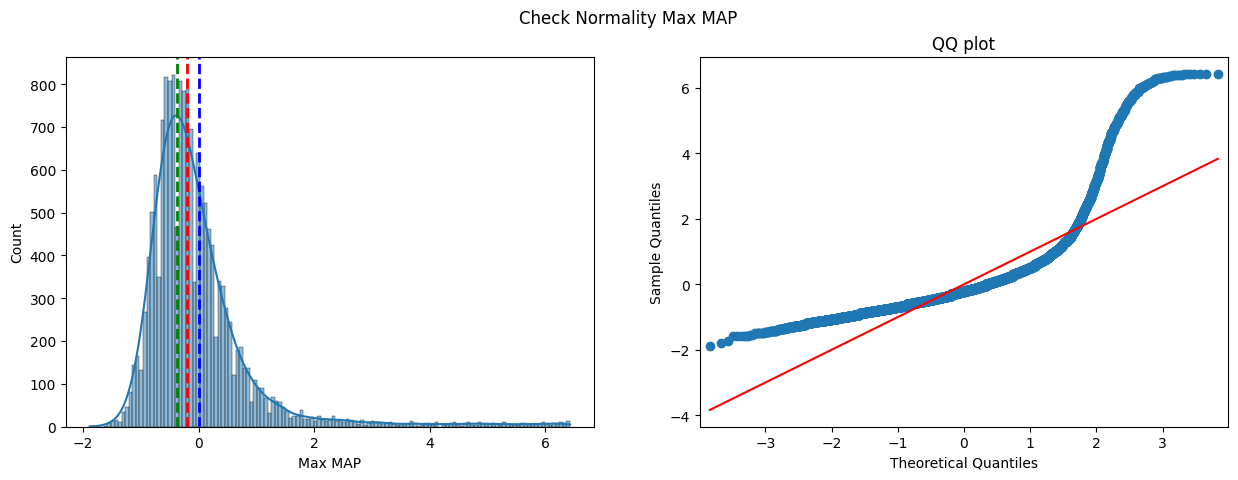

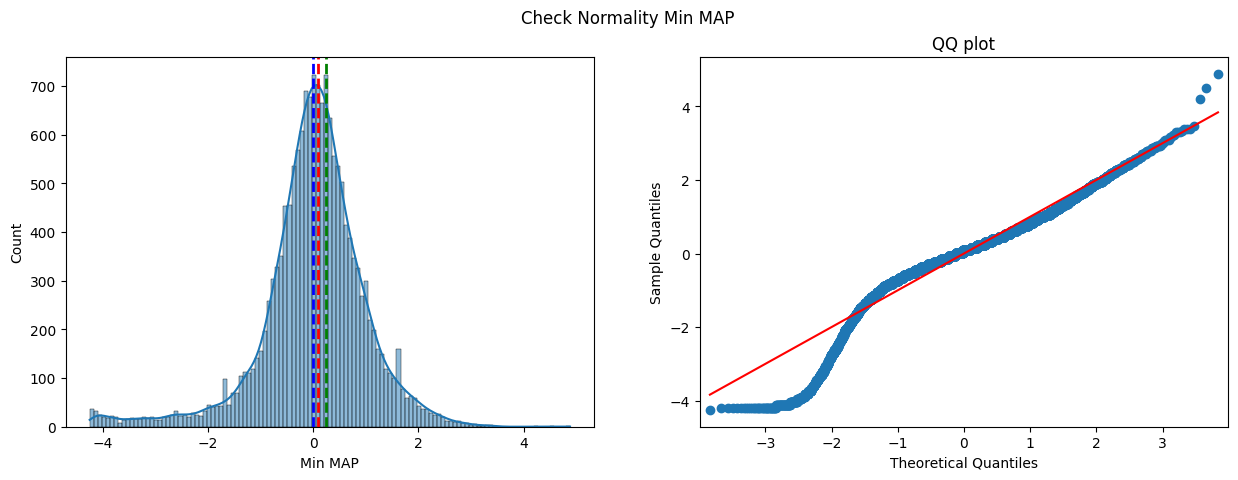

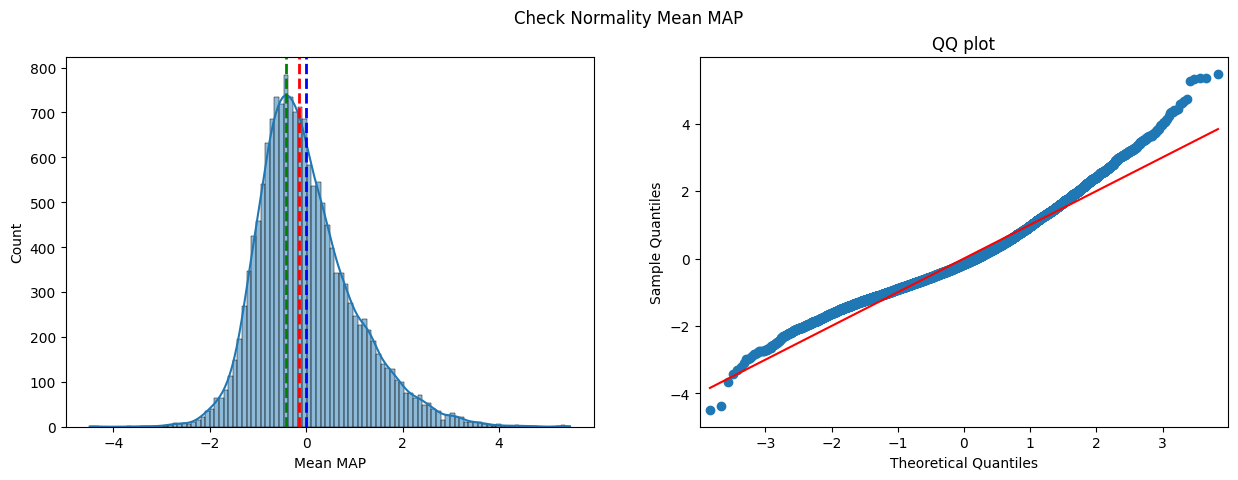

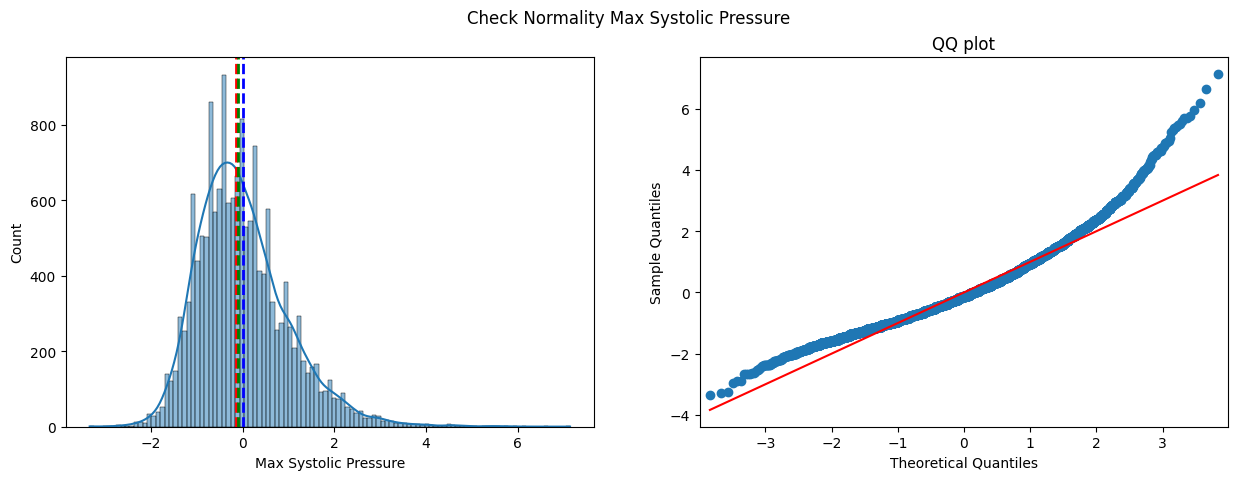

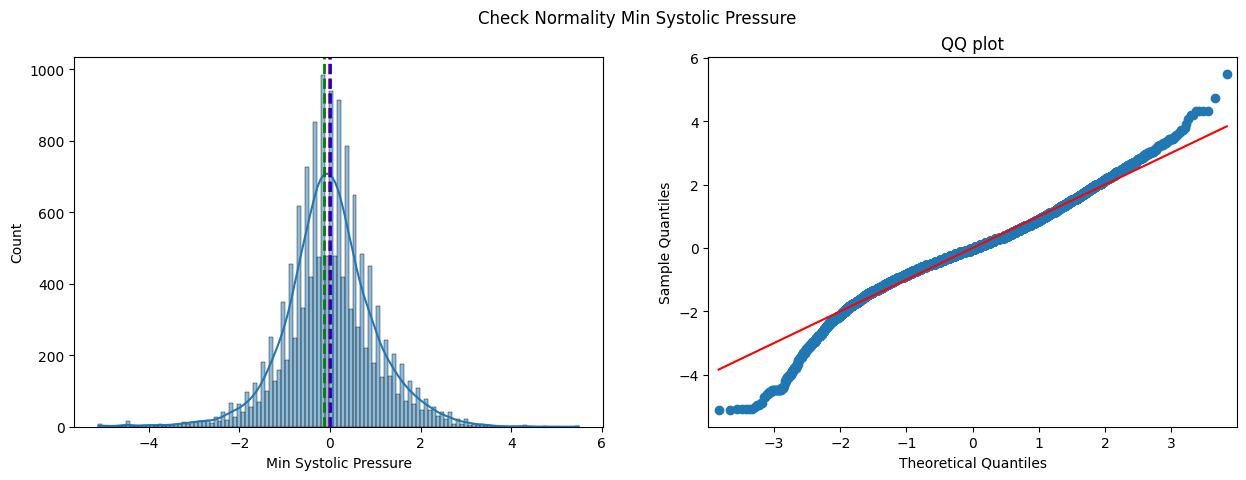

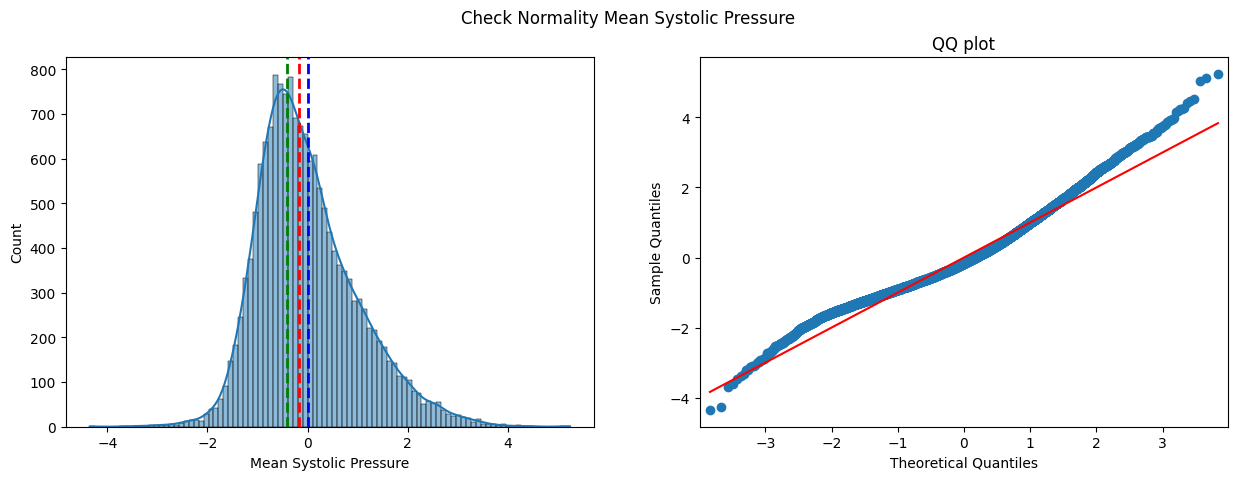

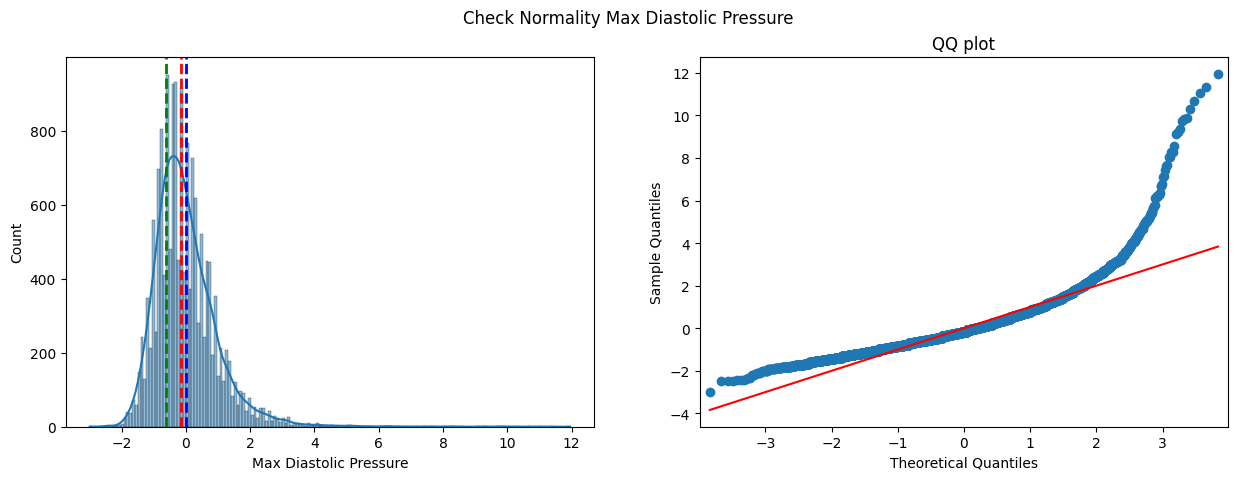

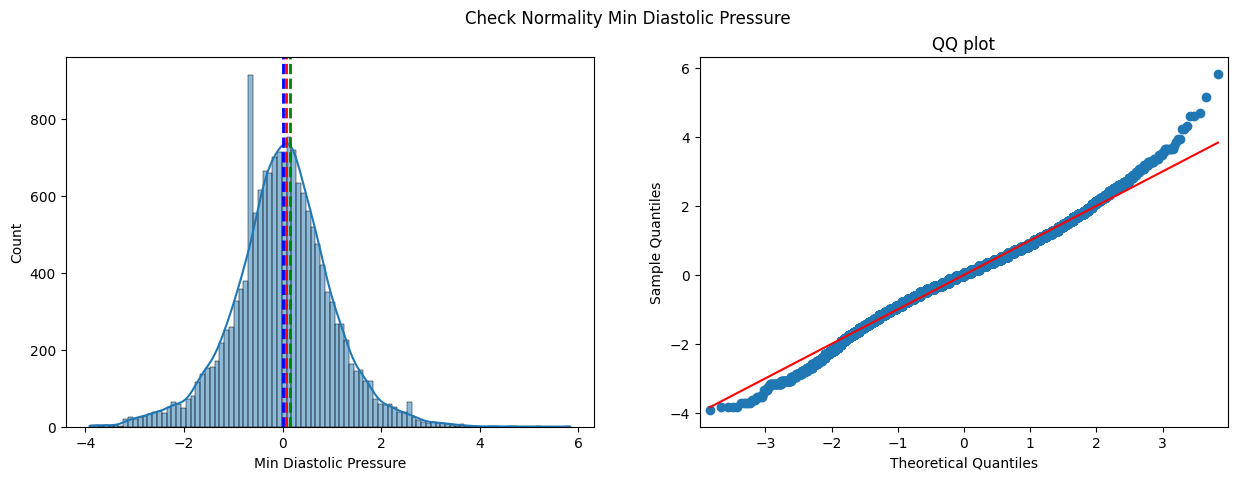

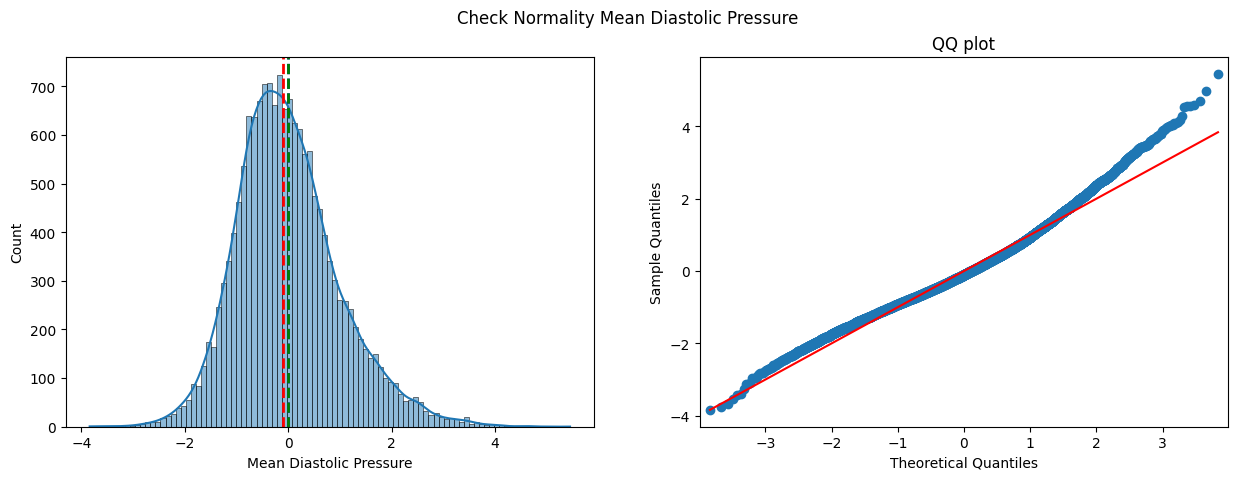

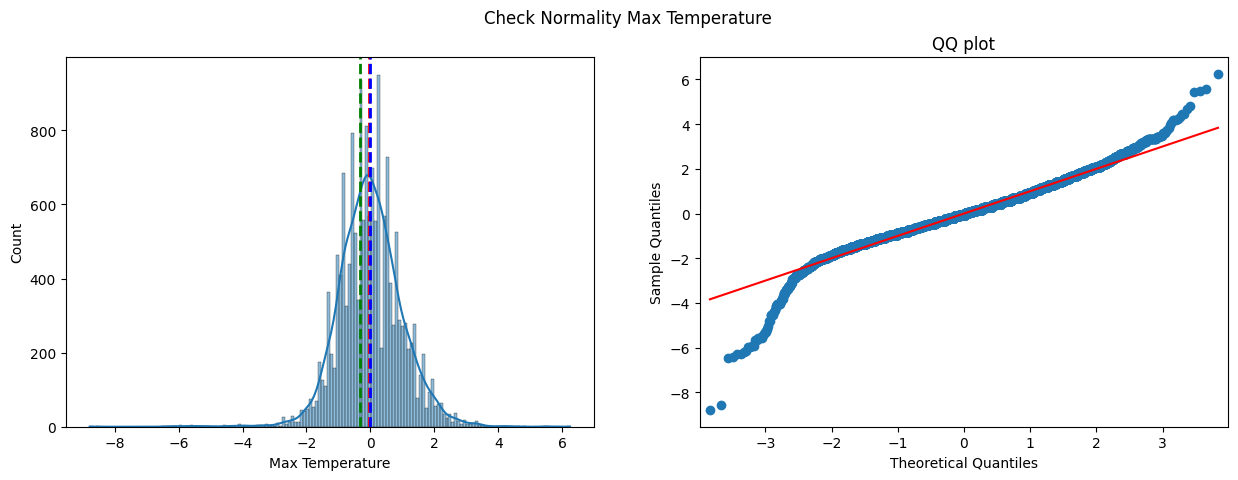

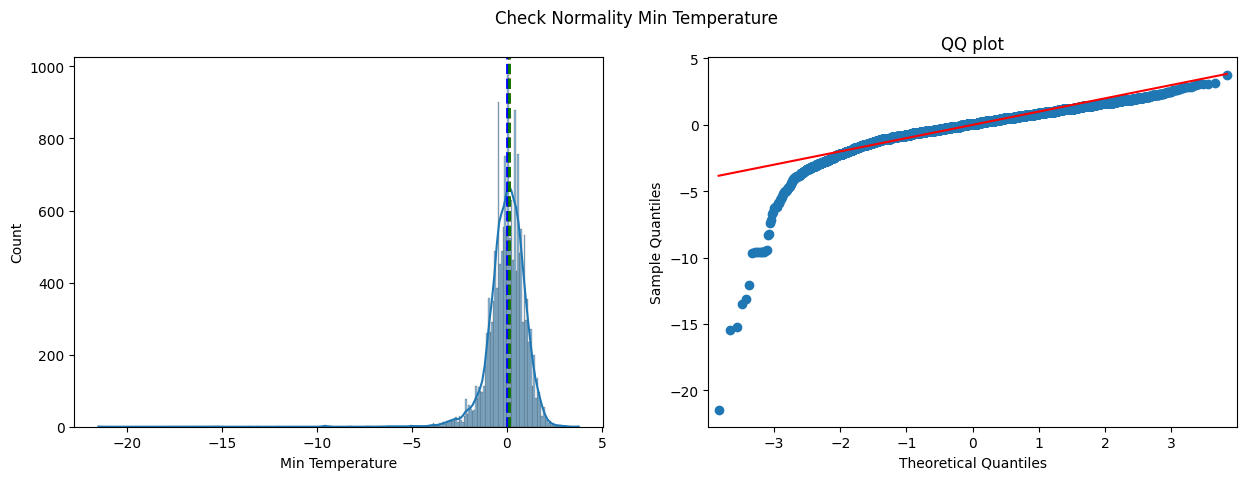

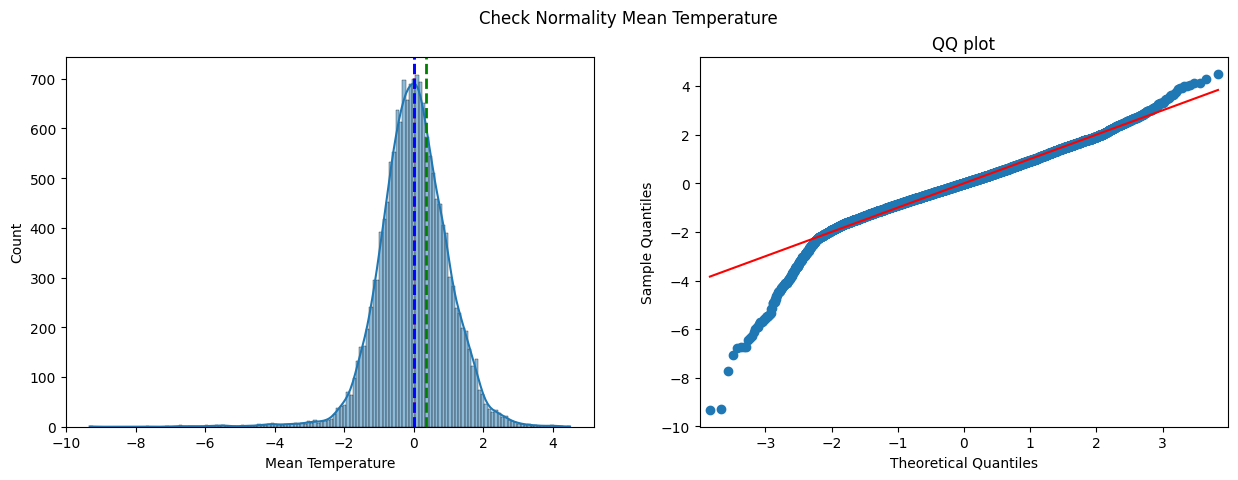

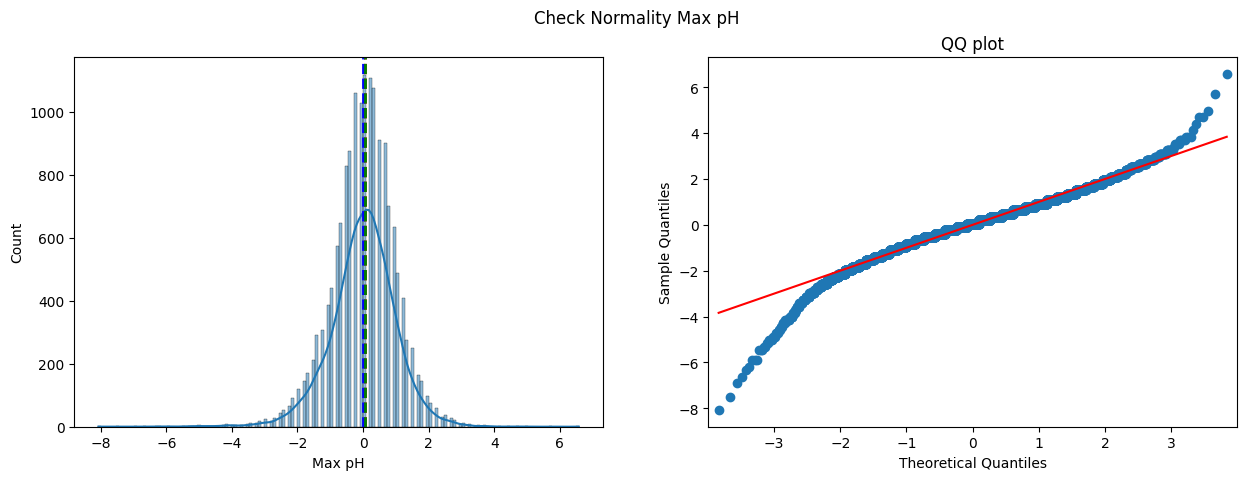

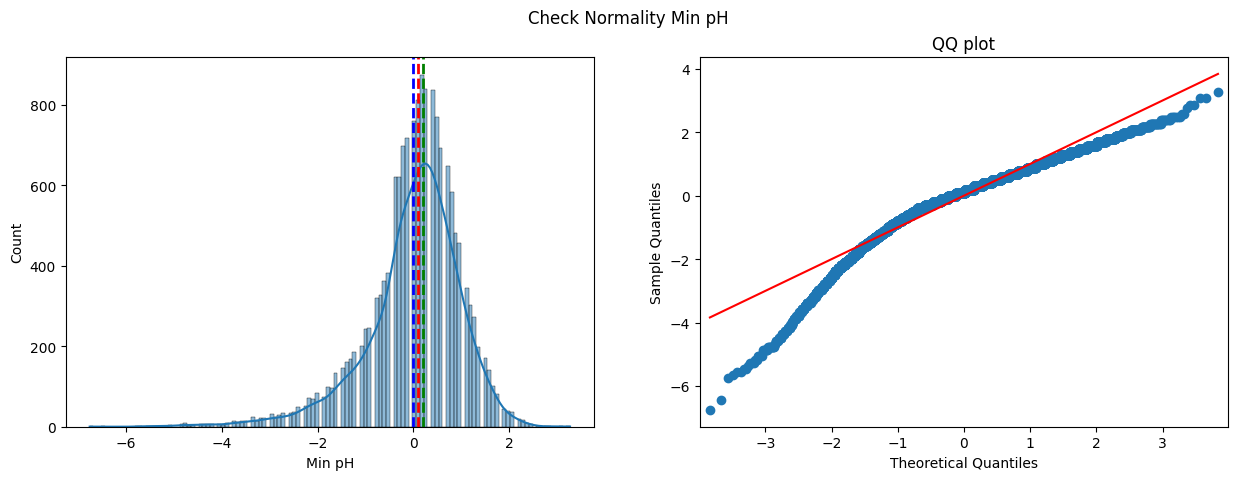

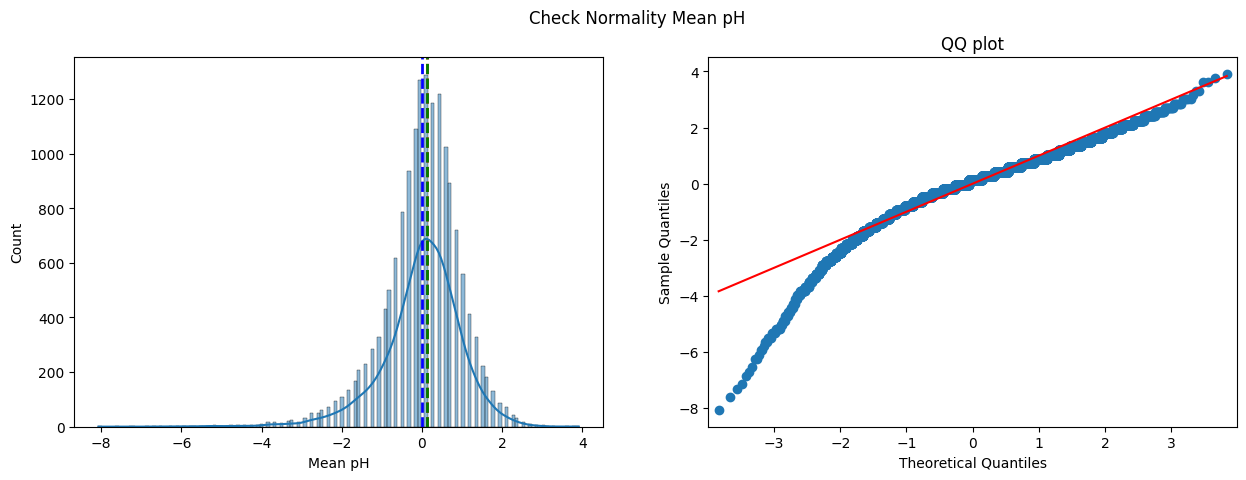

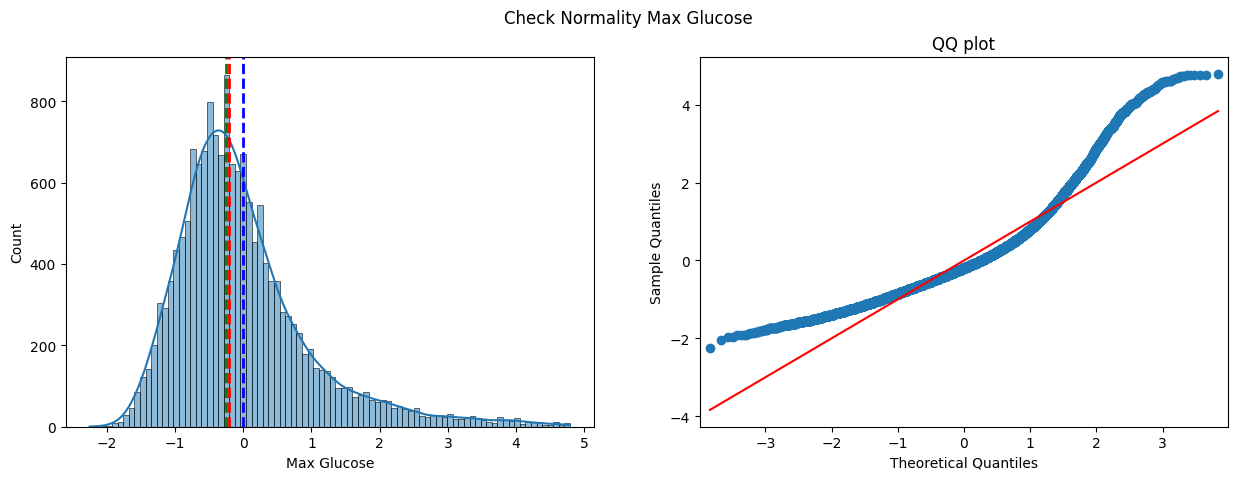

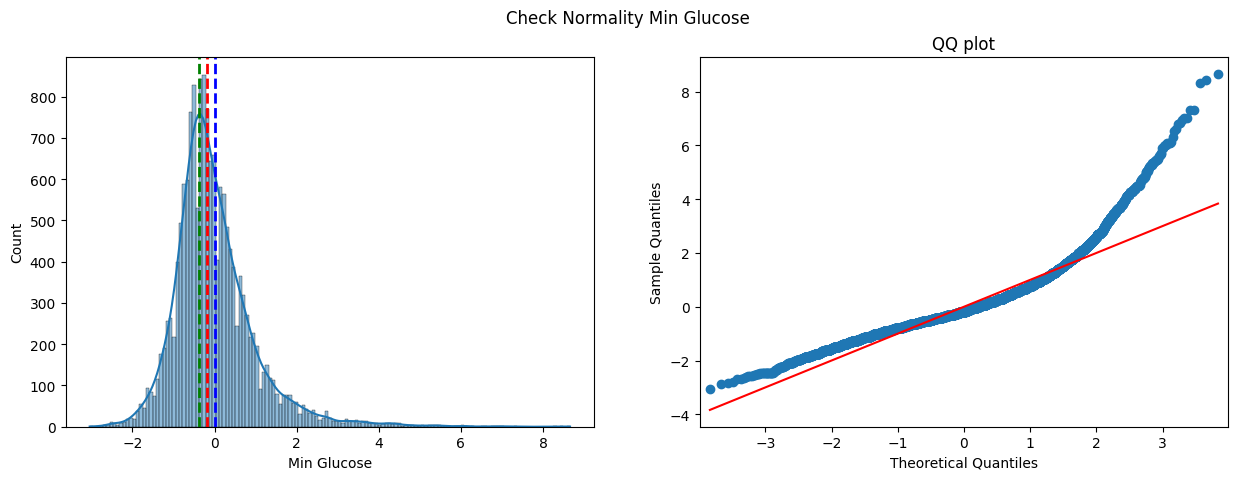

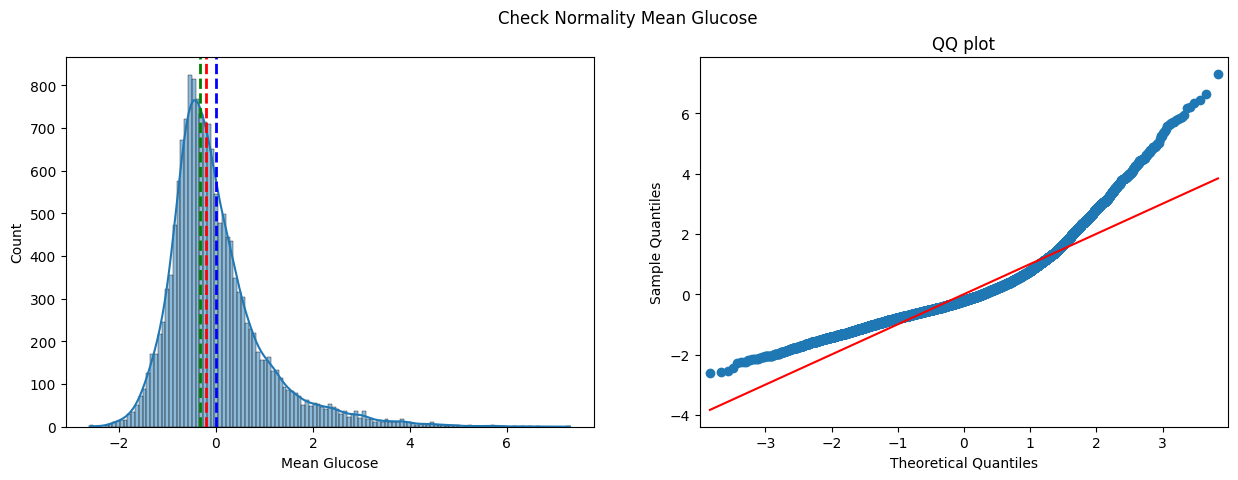

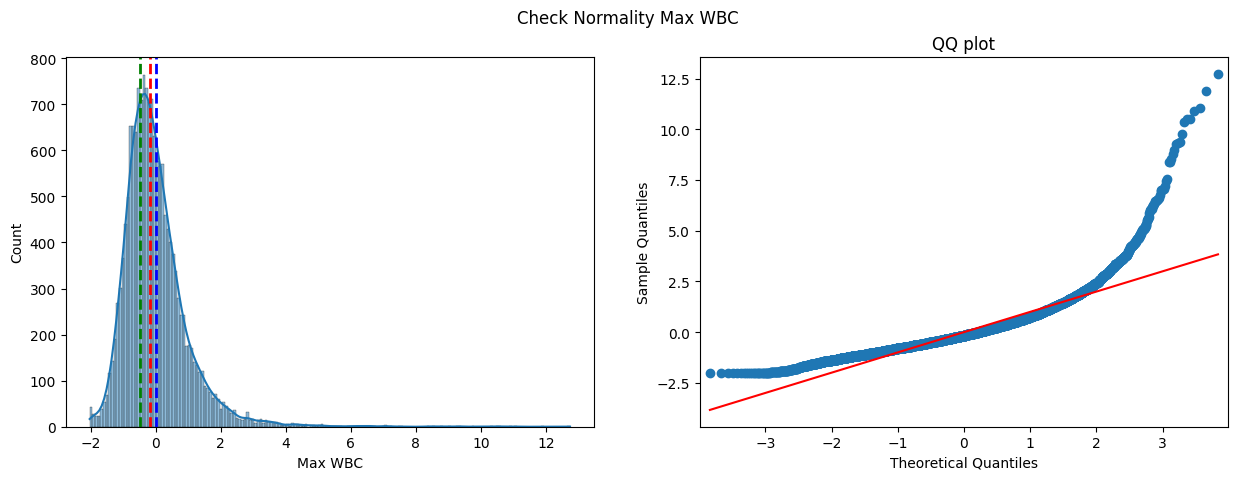

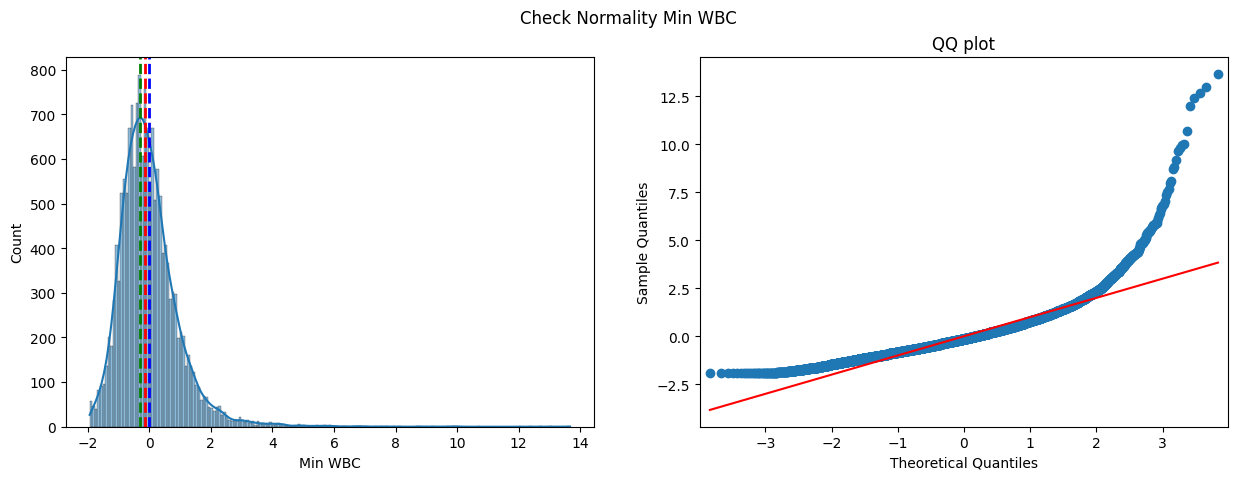

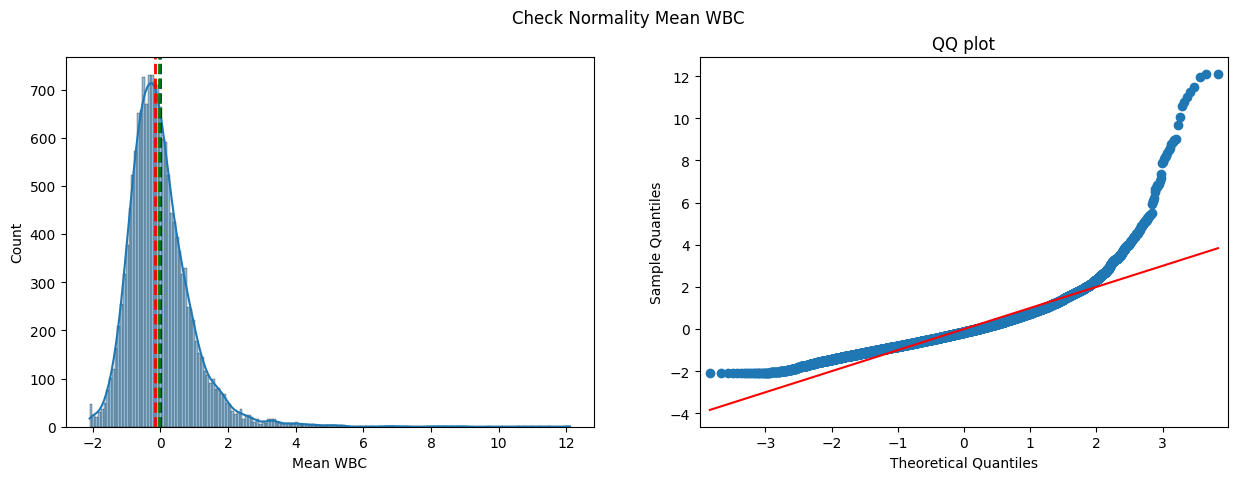

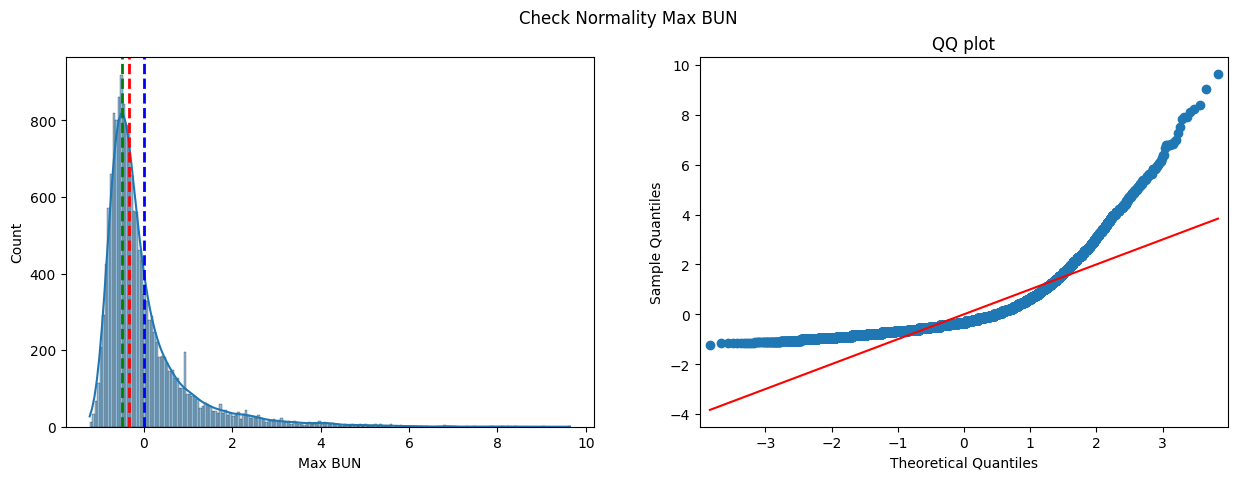

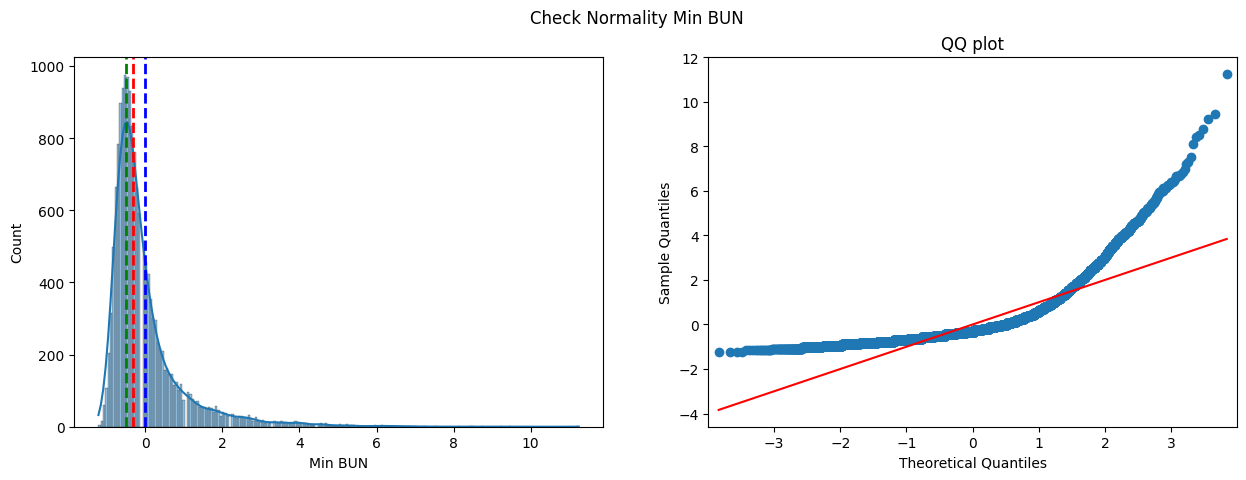

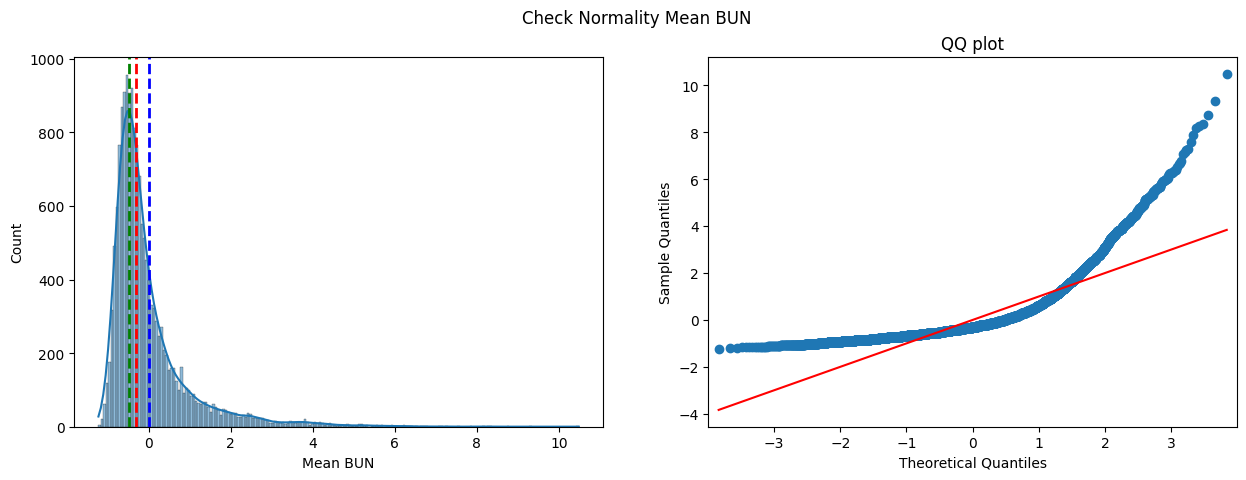

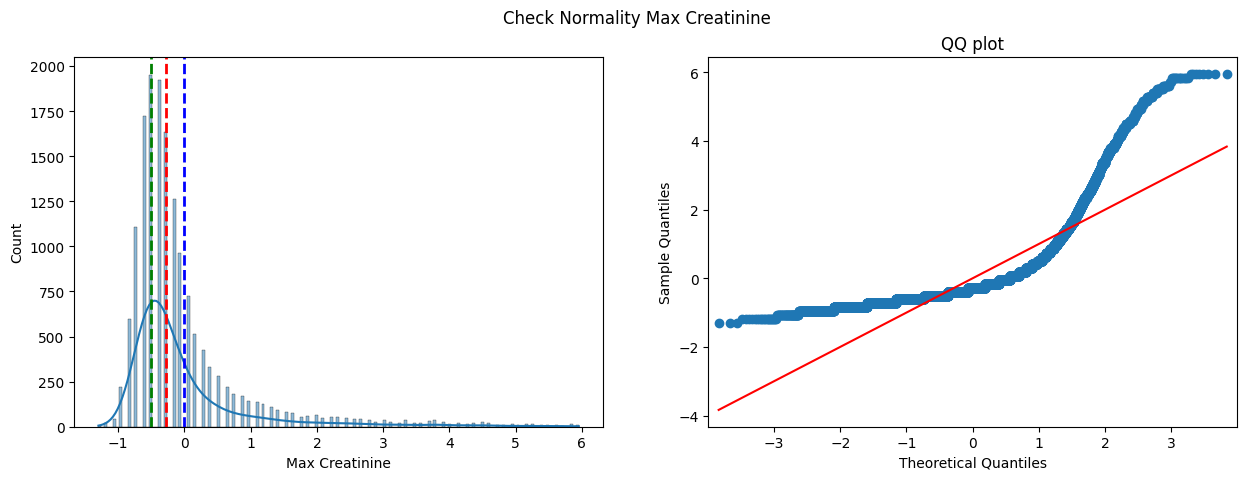

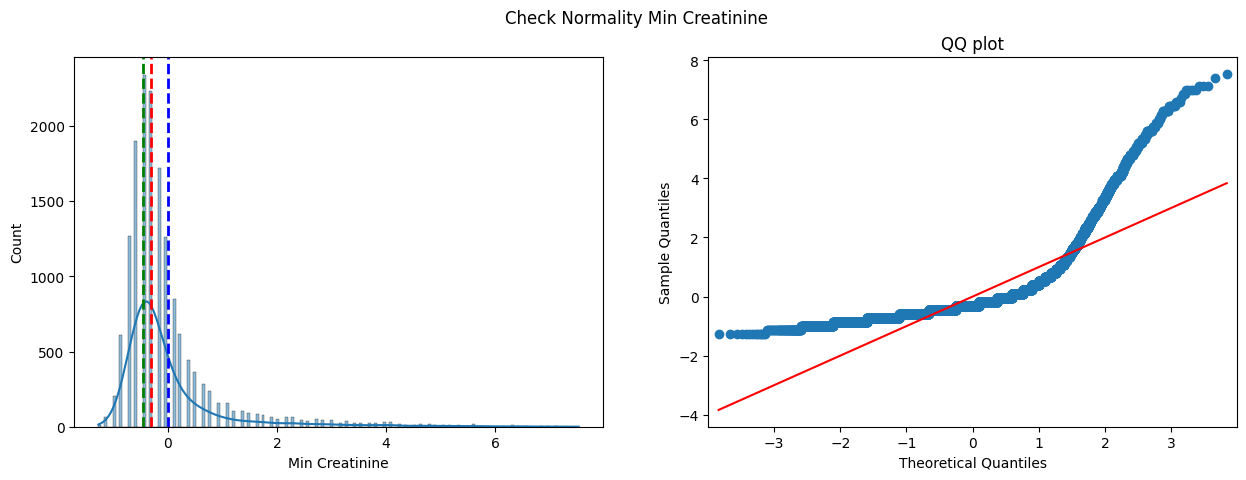

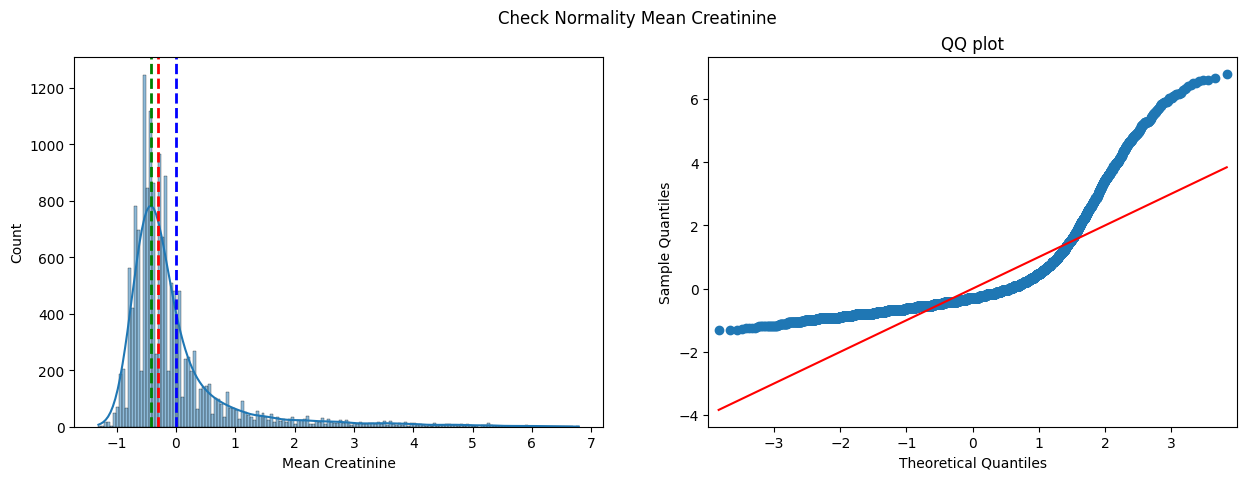

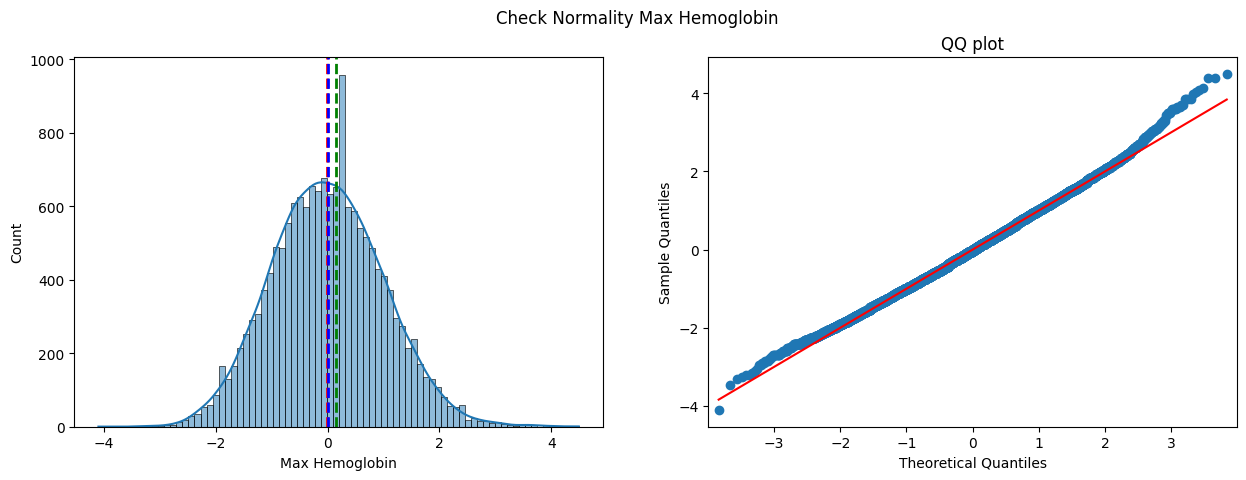

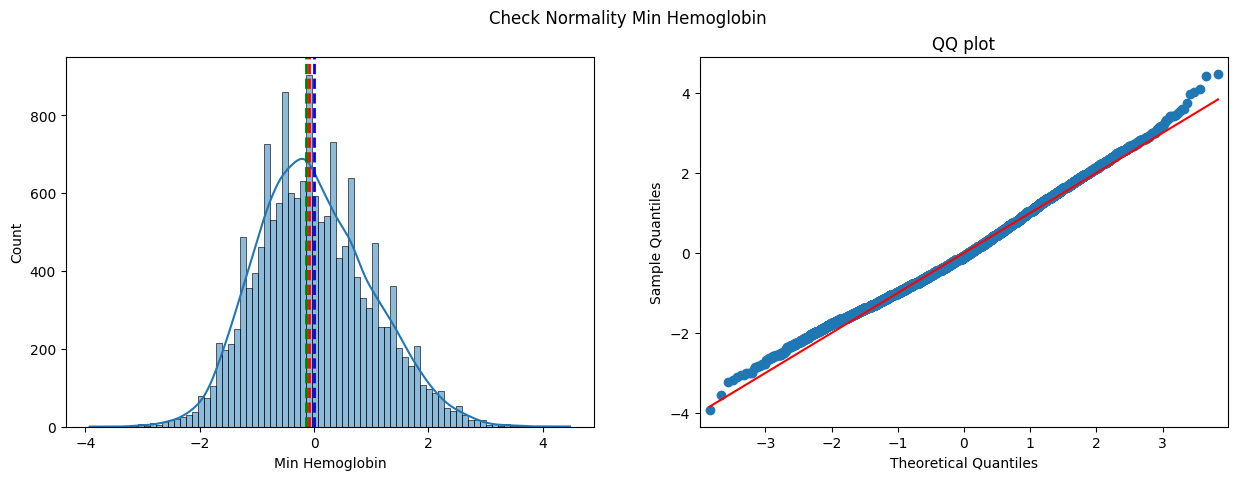

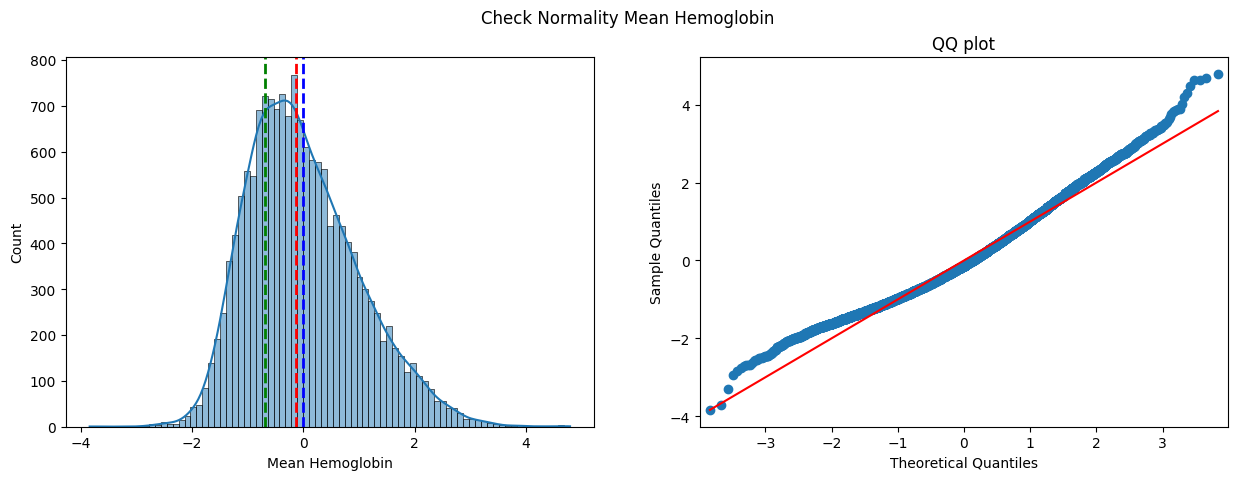

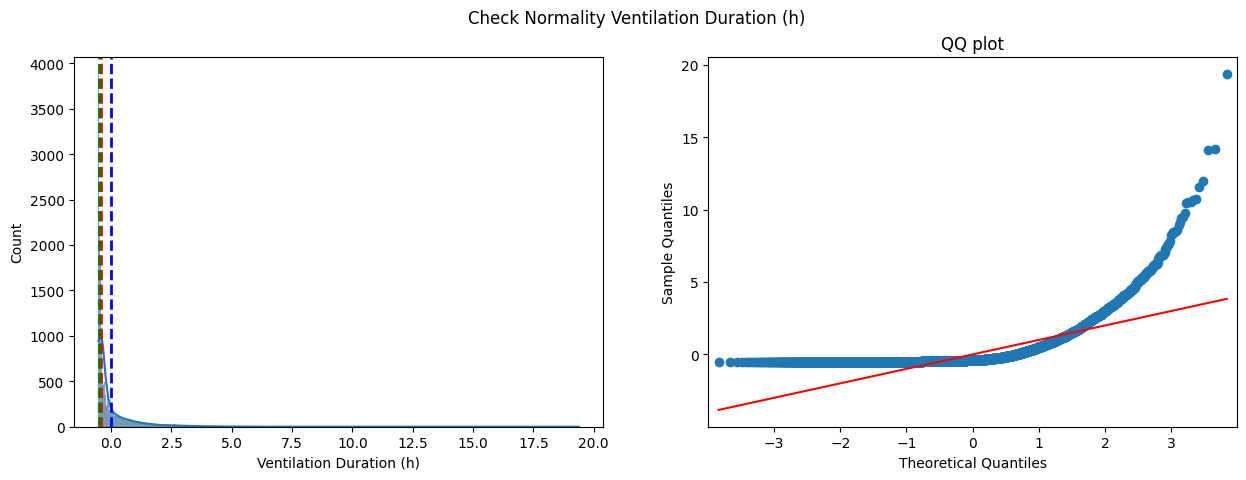

In [86]:
import pandas as pd
import scipy
from scipy import stats

# List of continuous variables 
continous_var = ["Max Heart Rate", "Min Heart Rate", "Mean Heart Rate", "Max MAP", "Min MAP", "Mean MAP", "Max Systolic Pressure", "Min Systolic Pressure", "Mean Systolic Pressure", "Max Diastolic Pressure", "Min Diastolic Pressure",
                 "Mean Diastolic Pressure", "Max Temperature", "Min Temperature", "Mean Temperature", "Max pH", "Min pH", "Mean pH", "Max Glucose", "Min Glucose", "Mean Glucose", "Max WBC", "Min WBC", "Mean WBC", "Max BUN", "Min BUN", "Mean BUN", "Max Creatinine", "Min Creatinine", "Mean Creatinine", "Max Hemoglobin", "Min Hemoglobin", "Mean Hemoglobin", "Ventilation Duration (h)"]


def standardize(data):
  for i in continous_var:
    # Log transformation
    # data[i] = np.log(data[i])
    # z-score standardization
    data[i] = stats.zscore(data[i])

    # Check the normality of the data
    draw_QQ_hist(df[i])

standardize(df)

## Statistical Tests

## Conclusion
People who non-survive has the higher:
  - ...
  - Min, Max, Mean Glucose
  - Min, Max, Mean White Blood Cell
  - Min, Max, Mean Blood urea nitrogen
  - Min, Mean Hemoglobin
And lower:
  - ...
  - Max Hemoglobin  
Than survive people.

Note, the survive people also has lower Creatinine than others. 

Create the table of t-test between the continous variables

In [18]:
# Extract data to csv
df.to_csv('cleaned_data.csv', index=False)

# DRAFT (DELETED)

In [17]:
### Create the t-test between lab results
# Max Lactate
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
t_stat, p_value = ttest_ind(df['Hospital Mortality'], df['Uncomplicated Diabetes'])

print(f'T-statistic: {t_stat}, P-value: {p_value:.3f}')

# Wilcoxon signed rank test
statistic, p_value = wilcoxon(df['Hospital Mortality'], df['Uncomplicated Diabetes'])

print(f'Statistic: {statistic}, P-value: {p_value:.3f}')

# Create a contingency table
contingency_table = pd.crosstab(df['Hospital Mortality'], df['Uncomplicated Diabetes'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2:.3f}, P-value: {p_value:.3f}')

# With hospital mortality = 1
# Filter the data
hospital_mortality_1 = df[df['Hospital Mortality'] == 0]
print(hospital_mortality_1.shape)

print(ttest_ind(df['Hospital Mortality'], df['Uncomplicated Diabetes']))
print(ttest_ind(df['Max Glucose'], df['Hospital Mortality']))
print(ttest_ind(hospital_mortality_1['Hospital Mortality'], hospital_mortality_1['Uncomplicated Diabetes']))
print(wilcoxon(df['Hospital Mortality'], df['Uncomplicated Diabetes']))
print(wilcoxon(df['Hospital Mortality'], df['Max Glucose']))

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(df['Hospital Mortality'], df['Uncomplicated Diabetes'])

print(f'Statistic: {statistic}, P-value: {p_value:.3f}')





T-statistic: -11.826111960900903, P-value: 0.000
Statistic: 5251752.0, P-value: 0.000
Chi-square statistic: 4.743, P-value: 0.029
(13867, 67)
TtestResult(statistic=-11.826111960900903, pvalue=3.324782049068331e-32, df=32912.0)
TtestResult(statistic=310.40956647732867, pvalue=0.0, df=32912.0)
TtestResult(statistic=-60.82941705433707, pvalue=0.0, df=27732.0)
WilcoxonResult(statistic=5251752.0, pvalue=1.6505331438709537e-31)
WilcoxonResult(statistic=0.0, pvalue=0.0)
Statistic: 128611455.0, P-value: 0.000


In [7]:
from scipy.stats import ttest_ind

survived = df[df['Hospital Mortality'] == 0]
non_survived = df[df['Hospital Mortality'] == 1]

mean_glucose_survived = survived['Max Glucose'].mean()
mean_glucose_non_survived = non_survived['Max Glucose'].mean()
print(mean_glucose_survived, mean_glucose_non_survived)
print(survived['Max Glucose'])
# Calculate t-test of two independent samples
print(ttest_ind(survived['Max Glucose'], non_survived['Max Glucose']))




185.1401251342982 211.5675041876047
0        299.0
3        239.0
4        159.0
5        215.0
6        108.0
         ...  
18877    160.0
18878    196.0
18880    134.0
18881    117.0
18882    131.0
Name: Max Glucose, Length: 15866, dtype: float64
TtestResult(statistic=nan, pvalue=nan, df=nan)


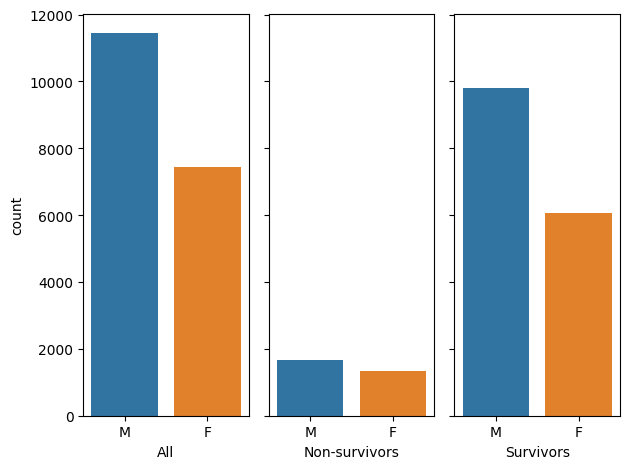

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, sharey=True)

sns.countplot(data = df, x = 'Gender', hue = 'Gender', ax=ax[0])
ax[0].set_xlabel('All')
sns.countplot(data = df[df['Hospital Mortality'] == 1], x = 'Gender', hue = 'Gender', ax=ax[1])
ax[1].set_xlabel('Non-survivors')
sns.countplot(data = df[df['Hospital Mortality'] == 0], x = 'Gender', hue = 'Gender', ax=ax[2])
ax[2].set_xlabel('Survivors')

plt.tight_layout()

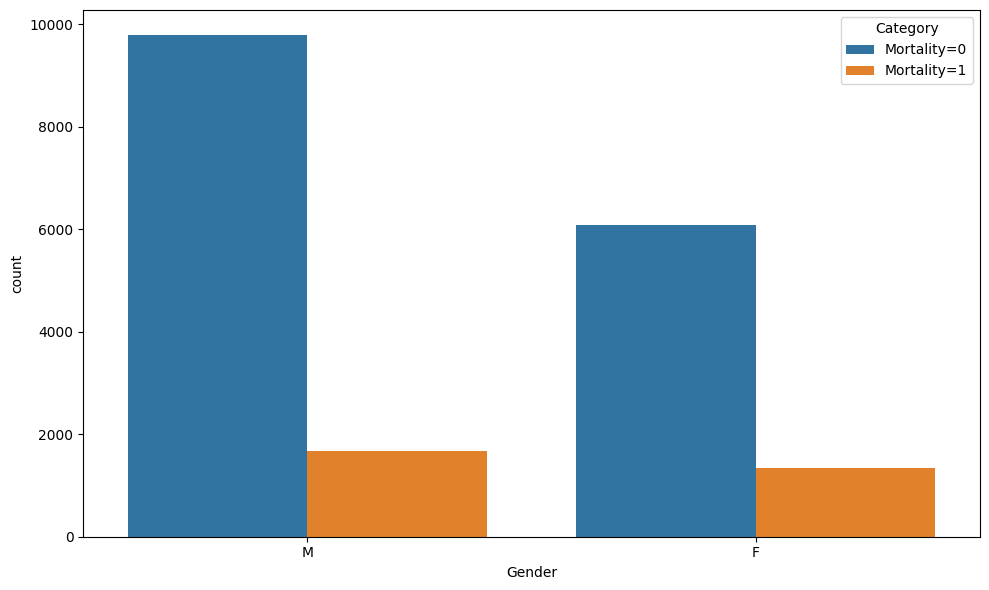

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to distinguish between the different categories
df['Category'] = 'All'
df.loc[df['Hospital Mortality'] == 1, 'Category'] = 'Mortality=1'
df.loc[df['Hospital Mortality'] == 0, 'Category'] = 'Mortality=0'

# Plot the data
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Gender', hue = 'Category')

plt.tight_layout()

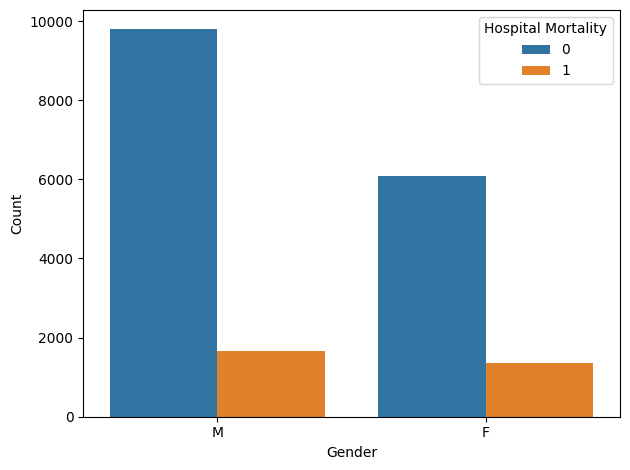

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (rest of your code to prepare the data in 'df' dataframe)

fig, ax = plt.subplots()

sns.countplot(x = 'Gender', hue = 'Hospital Mortality', data=df, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title="Hospital Mortality")
plt.tight_layout()

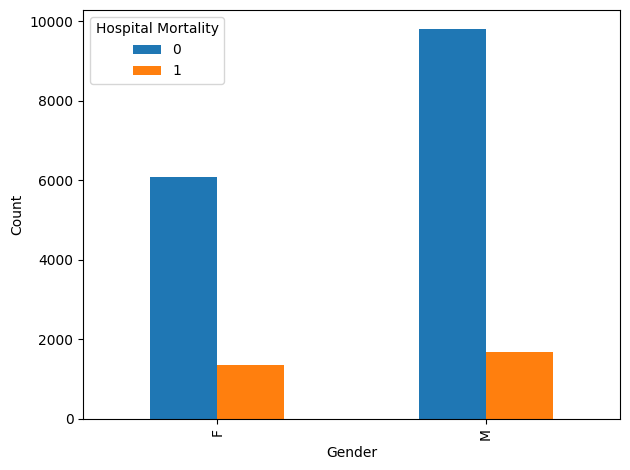

In [15]:
import matplotlib.pyplot as plt

# ... (rest of your code to prepare the data in 'df' dataframe)

fig, ax = plt.subplots()

# calculate total count for each gender
df_grouped = df.groupby(['Gender', 'Hospital Mortality']).size().unstack()

# create the group bar chart
df_grouped.plot(kind='bar', stacked=False, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.legend(title="Hospital Mortality")
plt.tight_layout()

C:\Users\RazerBook\AppData\Local\Temp\ipykernel_5076\3938939098.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, sharey=True)


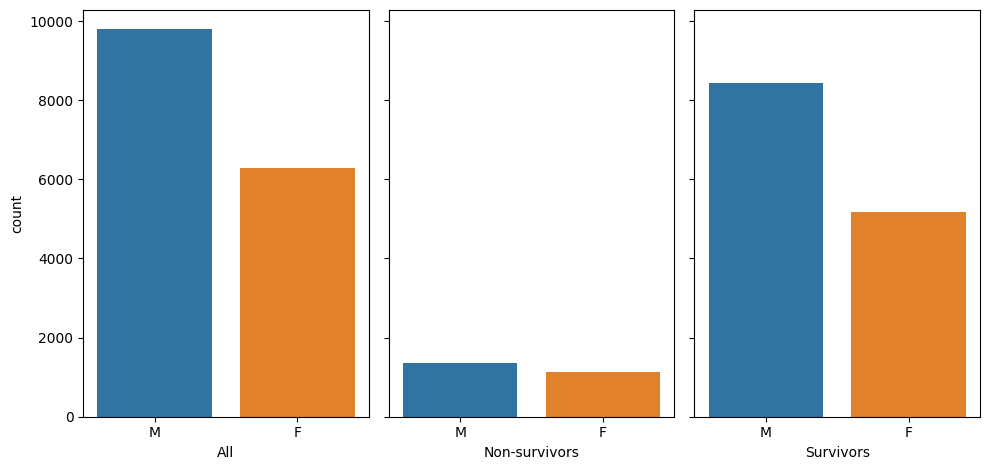

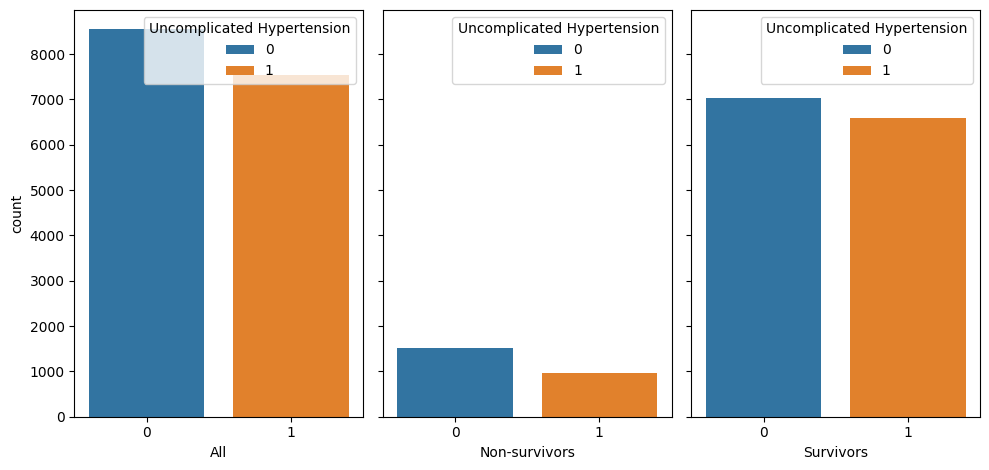

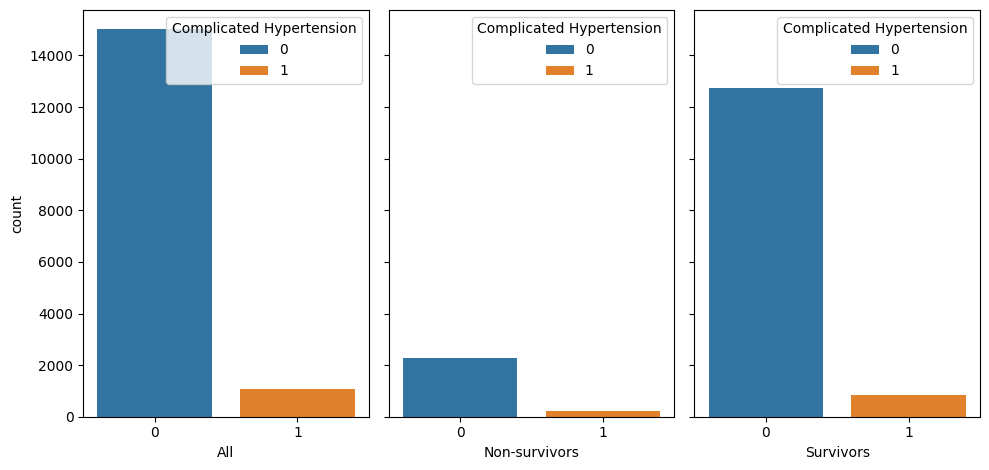

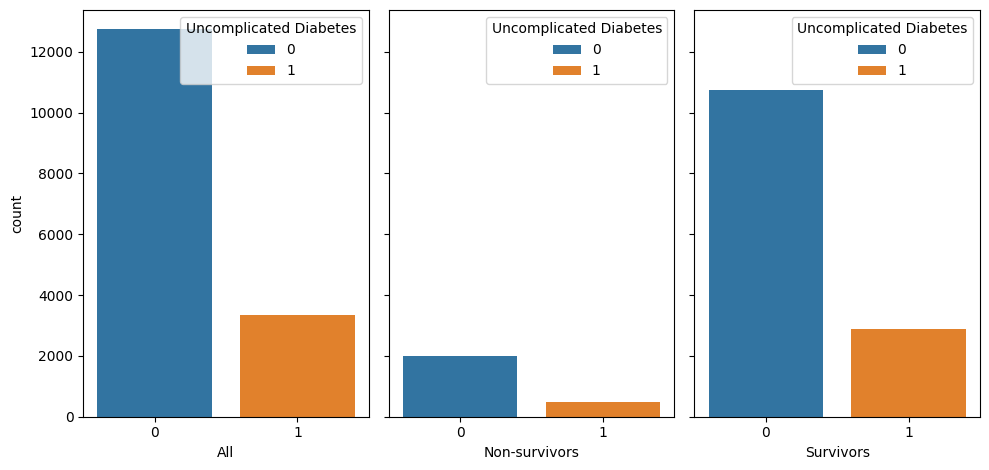

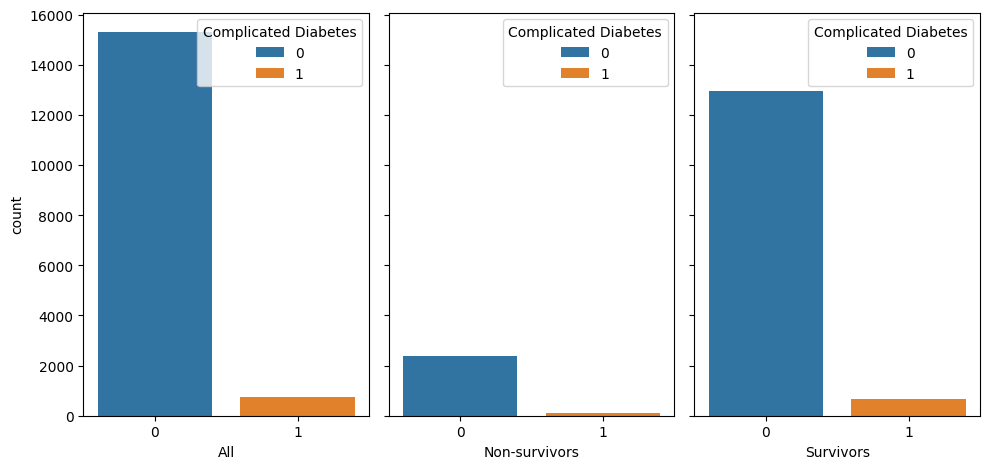

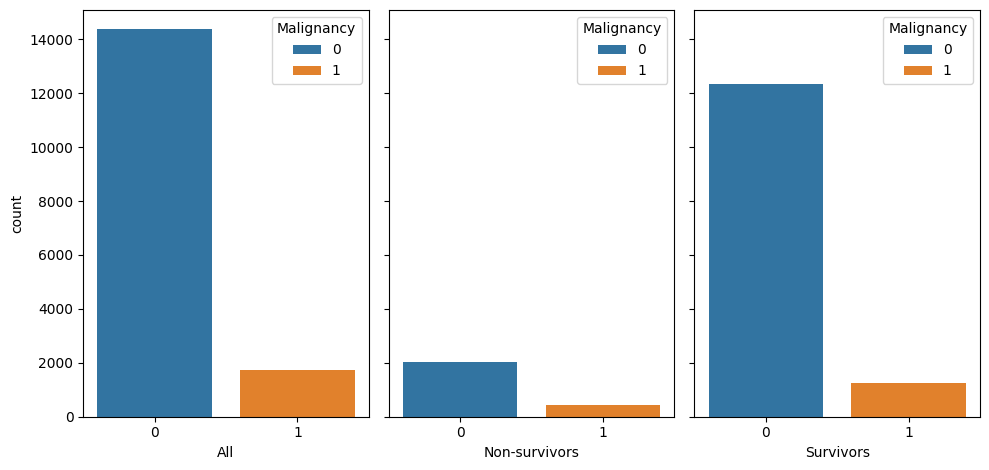

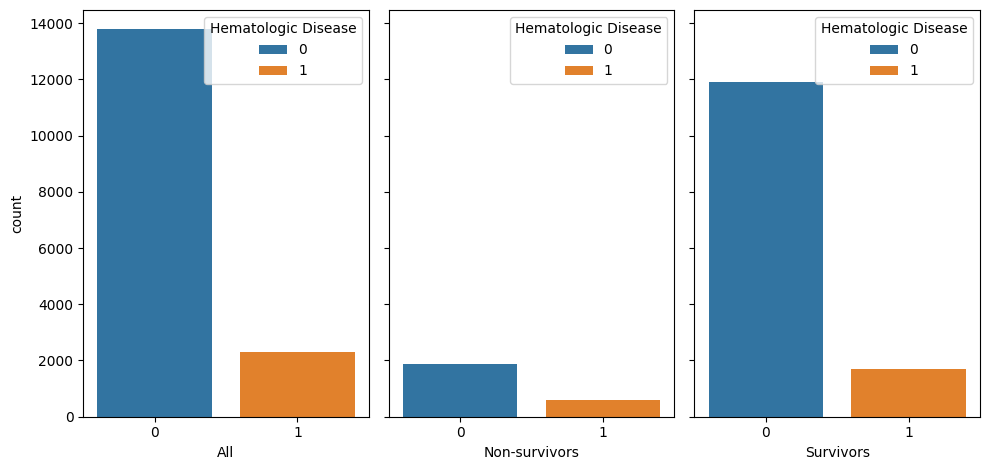

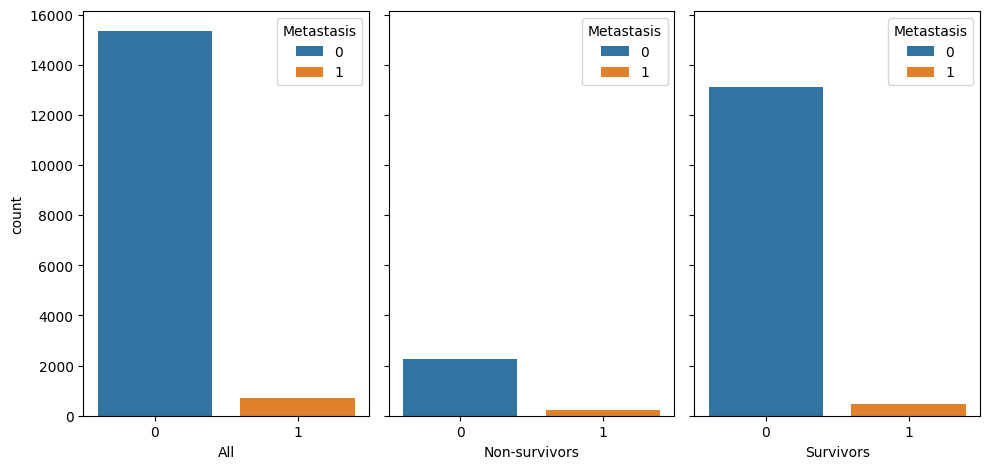

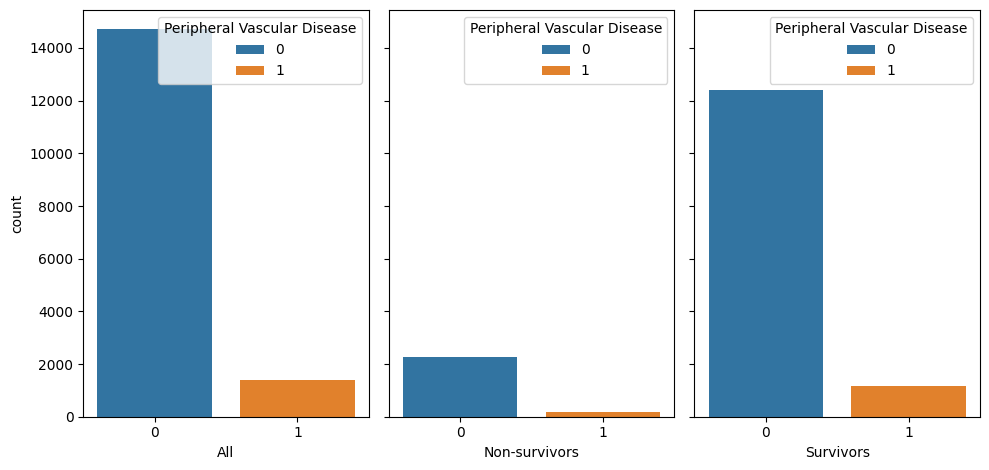

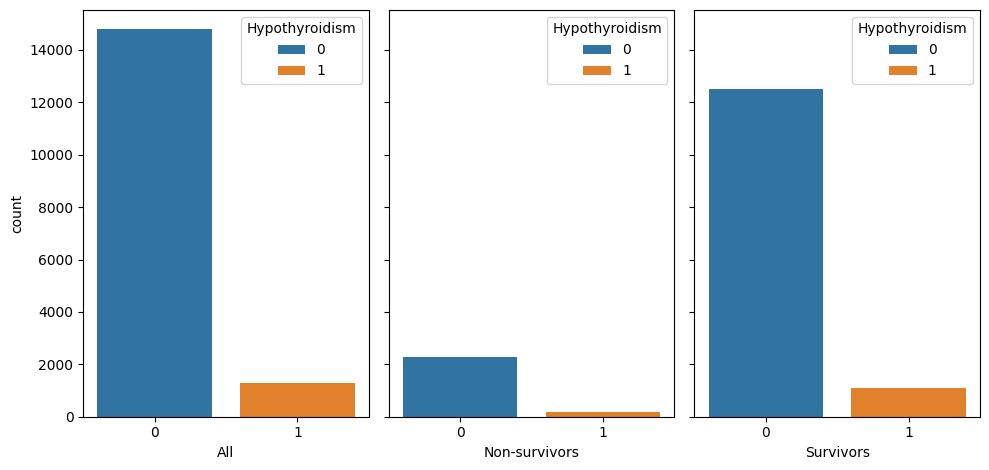

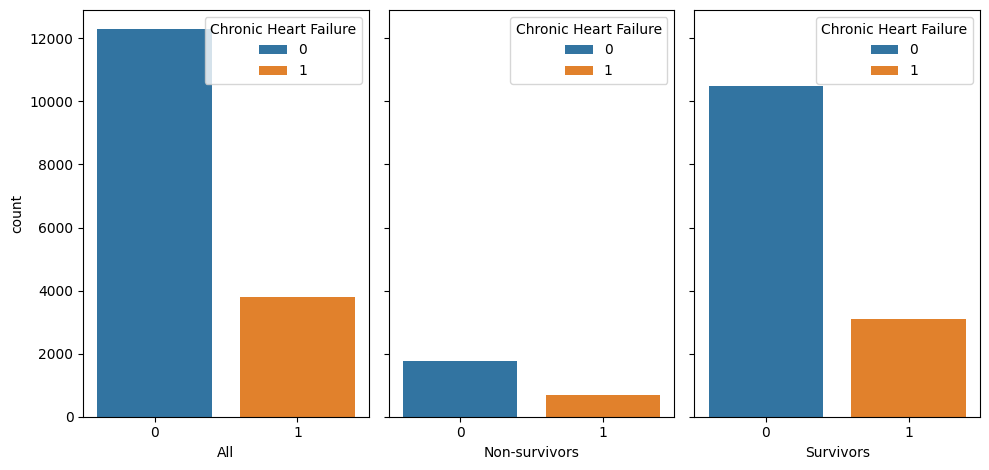

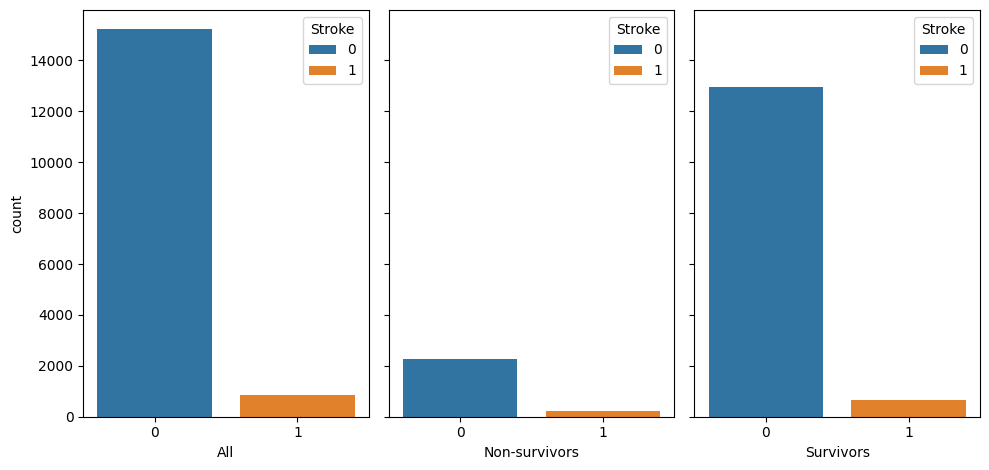

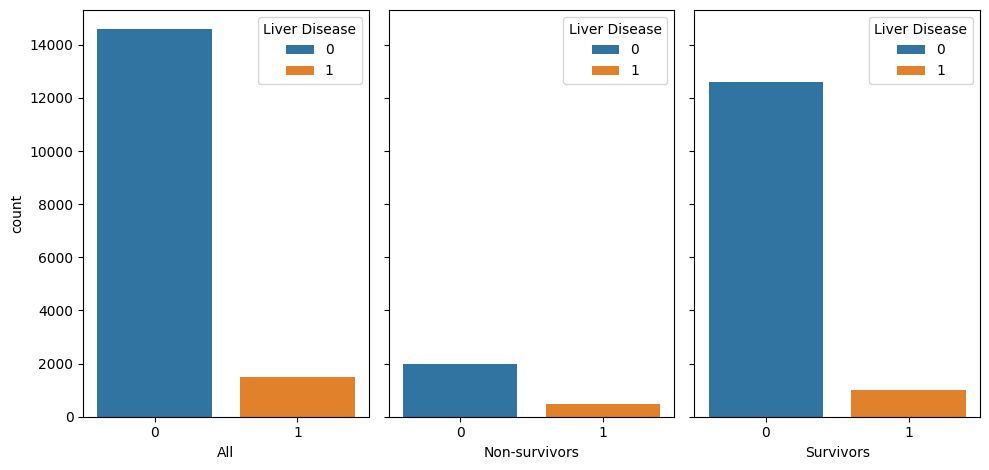

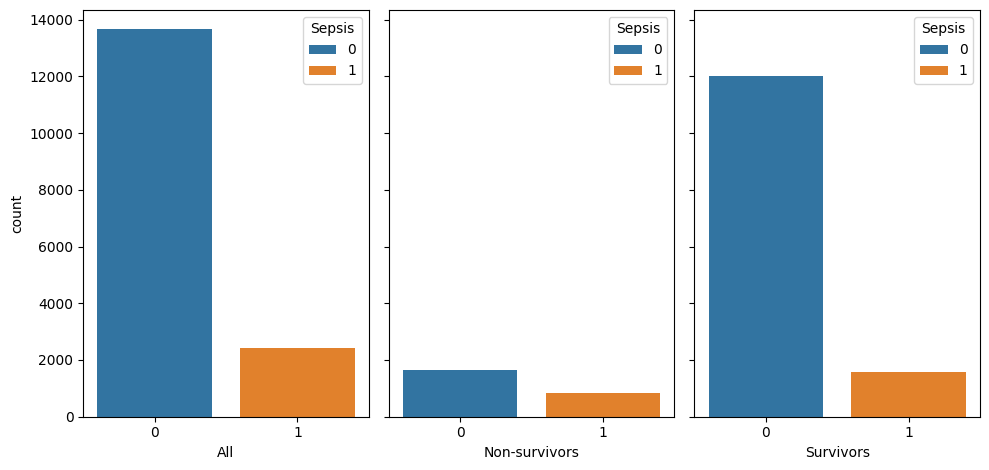

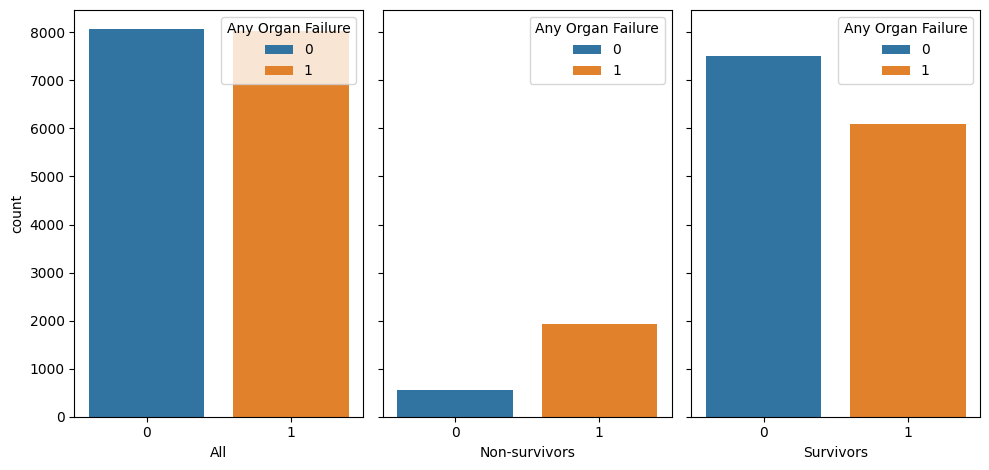

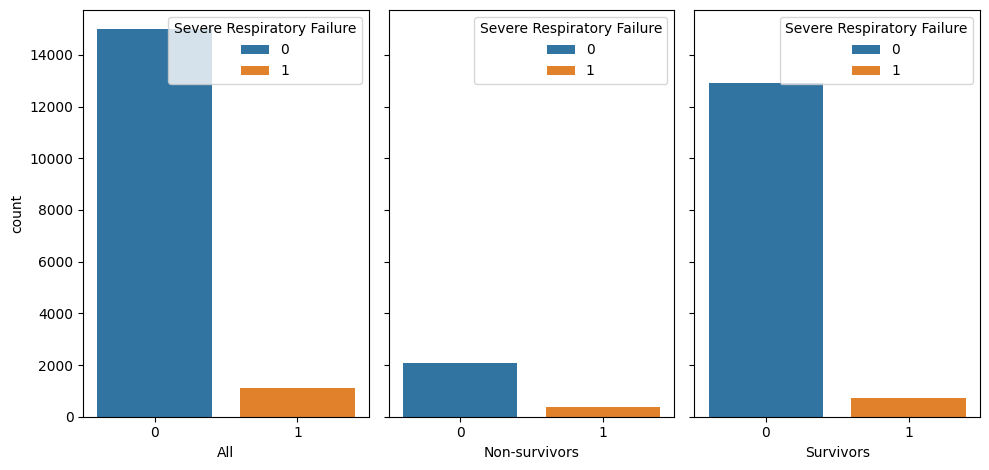

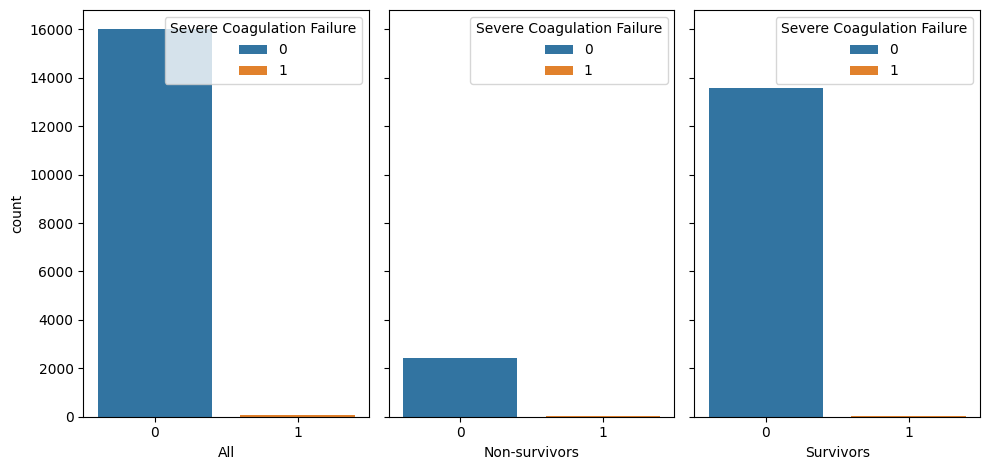

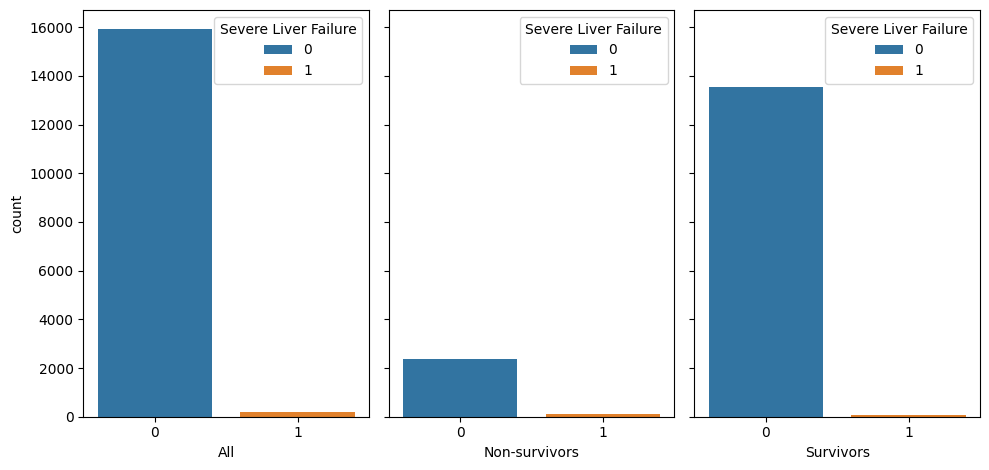

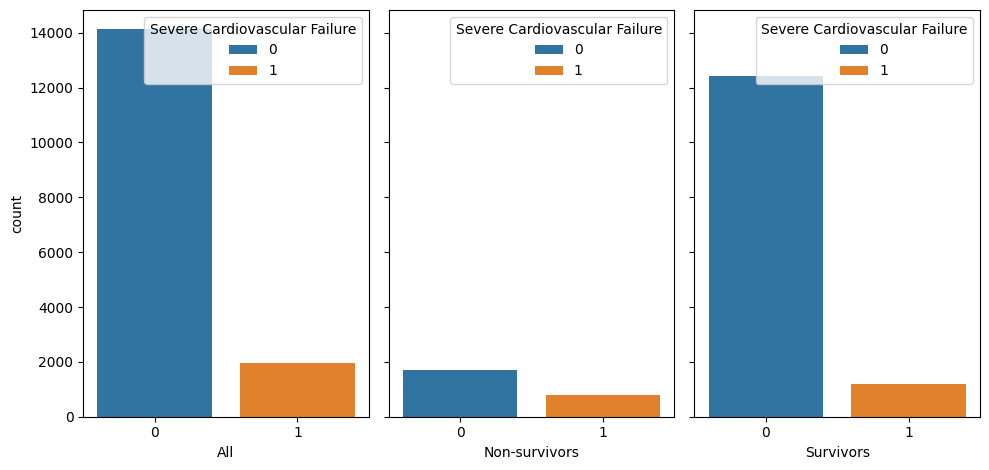

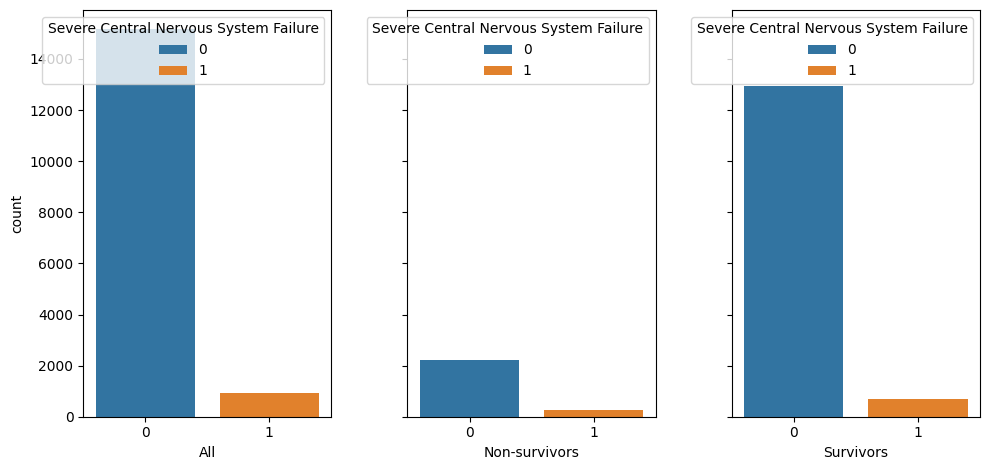

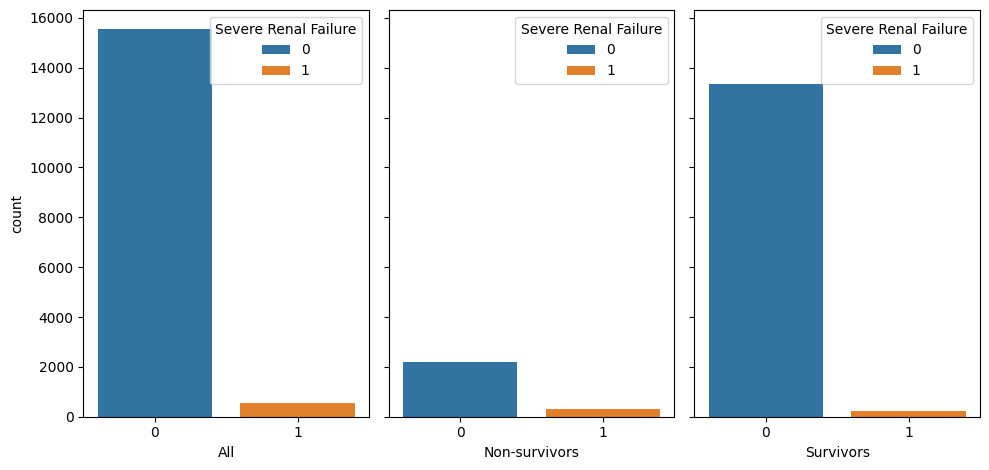

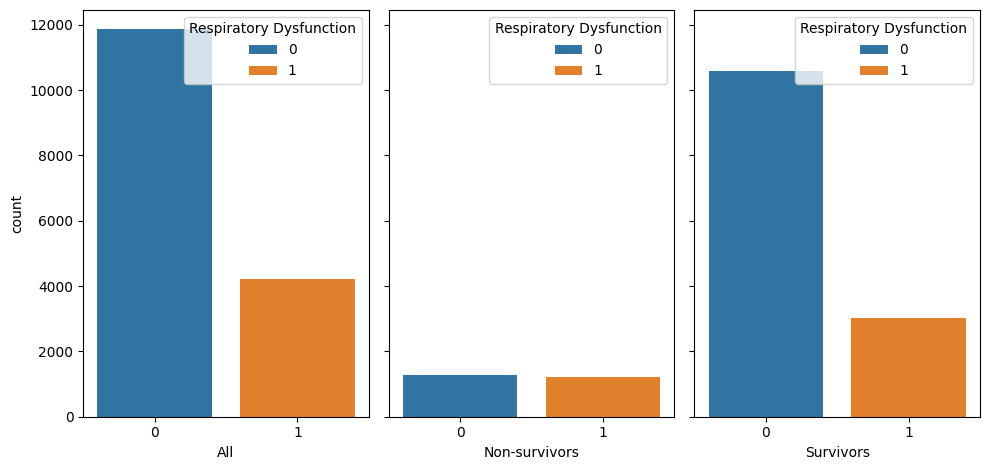

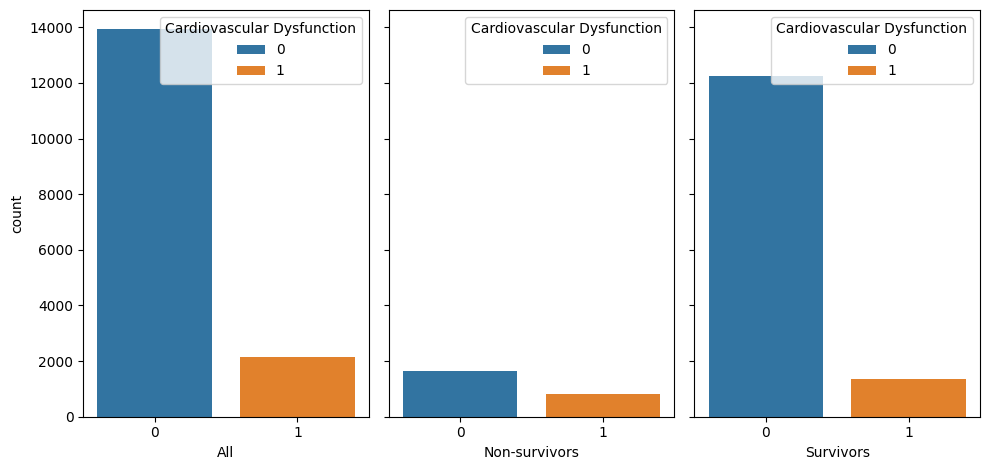

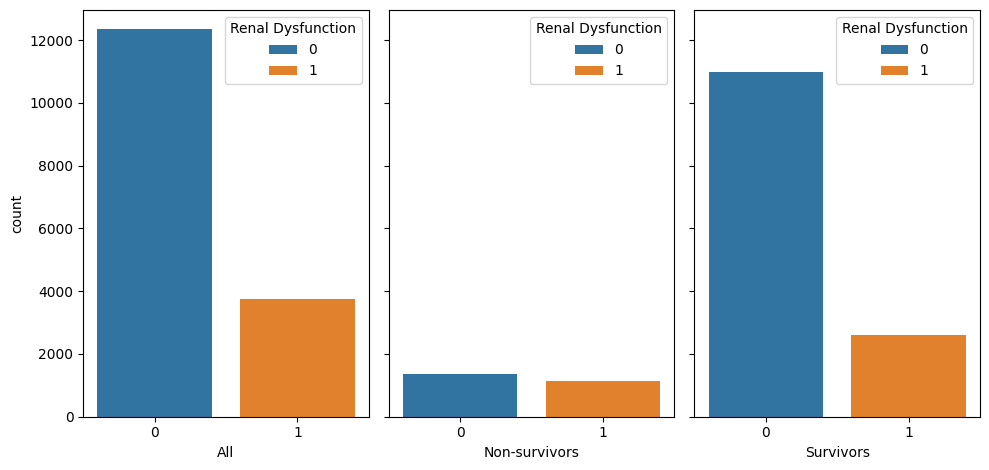

In [76]:
import matplotlib.pyplot as plt
cat_variables = ['Gender','Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
                 'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
                 'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
                 'Chronic Heart Failure', 'Stroke', 'Liver Disease','Sepsis', 'Any Organ Failure',
                 'Severe Respiratory Failure',
                 'Severe Coagulation Failure', 'Severe Liver Failure',
                 'Severe Cardiovascular Failure','Severe Central Nervous System Failure', 'Severe Renal Failure',
                 'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
                 'Renal Dysfunction']

for category in cat_variables:

    fig, ax = plt.subplots(1, 3, sharey=True)
    #set the figure size
    fig.set_figwidth(10)

    sns.countplot(data = df, x = category, hue = category, ax=ax[0])
    ax[0].set_xlabel('All')
    sns.countplot(data = df[df['Hospital Mortality'] == 1], x = category, hue = category, ax=ax[1])
    ax[1].set_xlabel('Non-survivors')
    sns.countplot(data = df[df['Hospital Mortality'] == 0], x = category, hue = category, ax=ax[2])
    ax[2].set_xlabel('Survivors')

    plt.tight_layout()